In [39]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

os.chdir('/data/arpit.goel/33_GrocerySales/')

train=pd.read_pickle('02.ParsedData/train_2016.pkl')
test=pd.read_pickle('02.ParsedData/test.pkl')


In [7]:
returns=train[train.unit_sales<0]

In [16]:
dtypes = {'id':'uint32', 'item_nbr':'int32', 'store_nbr':'int8', 'unit_sales':'float32'}
train = pd.read_csv('01.RawData/train.csv', usecols=[1,2,3,4], dtype=dtypes, parse_dates=['date'],
                    skiprows=range(1, 86672217) #Skip dates before 2016-08-01data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJgAAAEzCAYAAAB9t7k6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQJFl95/l197iPjLzrrupqGhw1IBhaDKwaTGiRdkaXjUwa2ciQ1gZ2dv9AY7ZCWpNJ2jFDg3Y1stXYgEag0YEYaUwSGjFc4hJHAw0NNN1N0/RV3d51V+V9xX36tX+4v+cekRGZGf5eVHpl/j5mGNlRkZ4eER7P3/u+7+/7U1zXBUEQBEEQBEEQBEEQBEFERT3sEyAIgiAIgiAIgiAIgiDubkhgIgiCIAiCIAiCIAiCIIQggYkgCIIgCIIgCIIgCIIQggQmgiAIgiAIgiAIgiAIQggSmAiCIAiCIAiCIAiCIAghSGAiCIIgCIIgCIIgCIIghEgc9glMis3NunvY53BcmJnJoVxuHfZpEIQwdC0TRwm6nom7EbpuiaMCXcvEUYKuZ2KQhYWiMuxxcjARwiQS2mGfAkFIga5l4ihB1zNxN0LXLXFUoGuZOErQ9UwcFBKYCIIgCIIgCIIgCIIgCCFIYCIIgiAIgiAIgiAIgiCEIIGJIAiCIAiCIAiCIAiCEIIEJoIgCIIgCIIgCIIgCEIIEpgIgiAIgiAIgiAIgiAIIUhgIgiCIAiCIAiCIAiCIIQggYkgCIIgCIIgCIIgCIIQggQmgiAIgiAIgiAIgiAIQggSmAiCIAiCIAjiGPGxh6/iP/7dU4d9GgRBEMQRI3HYJ0AQBEEQBEEQxJ3jhZs7uL5ah2U7SGi030wQBEHIge4oBEEQBEEQBHGMMC0HANDqWod8JgRBEMRRggQmgiAIgiAIgjhG9HyBqU0CE0EQBCEREpgIgiAIgiAI4hhhksBEEARBTAASmAiCIAiCIAjiGMEFpg4JTARBEIQ8SGAiCIIgCIIgiGMEZTARBEEQk+BAXeR0XX81gH8A8H7DMD4YevyfAfiCYRiK/9+/BODdABwAf24Yxod1XU8C+CsAFwDYAN5pGMY1XddfC+BPALgAnjEM413+MX4DwC/4j7/XMIzP67peAvARACUADQBvNwxjR/jVEwRBEARBEMQxgwQmgiAIYhLs62DSdT0P4AMAvjLweAbAbwNYDT3vPQB+DMBbAfyaruuzAN4OoGIYxpsB/B6A3/cP8YcAftUwjAcBlHRd/wld1y8C+EUAbwbw0wDep+u6Bk+0etg/xicA/KbIiyYIgiAIgiCI44hlO3BcFwDQ7tqHfDYEQRDEUeIgJXJdAD8JYGXg8f8bwB8D6Pn//UYATxiGUTUMow3gWwAeBPA2AJ/0n/MQgAd1XU8BuGgYxhP+45+BJ0z9KIB/NAyjZxjGJoCbAO4fOAZ7LkEQBEEQ+/D4C+t45OnBWzhBEMcV5l4CKOSbIAiCkMu+ApNhGJYvGHF0XX8FgNcahvE/Qg+fBLAZ+u8NAKfCjxuG4cArfTsJoLzXc/d4nD1GEARBEMQ+fOZbN/DRr1057NMgCCImkMBEEARBTIoDZTAN4f0A/s99nqOM8biM5/YxM5NDIqEd5KmEBBYWiod9CgQhBbqWiaPEwkIRLryclbm5AlT1QLdQgjhUaByeLG6iFfysKPR+TxB6b4mjBF3PxEEYW2DSdf0MgFcC+Ftd1wHglK7rXwfwO/CcRowzAL4Dr7TuJICn/cBvBV5u09zAc1f8/+kjHj8JoBp6bE/K5dZ+TyEksbBQxOZm/bBPgyCEoWuZOEqw67ln2nBd4PZyGblM8rBPiyD2hMbhybO+E8yRd6pter8nBF3LxFGCrmdikFGC40EymPowDGPZMIyXGYbxJsMw3gRg1TCMHwHwGIA36Lo+ret6AV7+0iMAvgSvKxwA/AyArxmGYQJ4Udf1N/uP/xyALwD4KoCf0nU9pev6aXhi0qWBY/y8/1yCIAiCIPbB9cN8mx0qhSEIAuiZQbB3i8YF4hjQ6Vn42y+/hHK9e9inQhBHnn0dTLquPwDgPwG4B4Cp6/q/BPBzhmHshJ9nGEZb1/XfAvBFeDlL7zUMo6rr+t8D+HFd178JLzD8Hf6vvBvAn+m6rgJ4zDCMh/y/9yEA3/CP8S7DMBxd1/8IwN/ouv4IgAqAXxZ83QRBEARxLLAdT2CihSRBEABg2pTBRBwvnr6yja88uYS5qQz++RvPH/bpEMSRZl+ByTCMJwG8dY9/vyf088cAfGzg320A7xzye5cAvGXI4x8A8IGBxxoAfna/cyUIgiAIoh9fX0KrYx7uiRAEEQtMkwQm4nhRbXjOpbB7jyCIyTB2iRxBEARBEHcPDnMw0UKSIAiQg4k4flSaPQBAlwQmgpg4JDARBEEQxBGGCUyUwUQQBACYViAwtbq04CaOPtWGJzD1Qu49giAmAwlMBEEQBHGEsV3KYCIIIqBnBaKSZTswLRKZiKNNtemVyJGDiSAmDwlMBEEQBHGECUrkKIOJIIh+BxNALibi6FOlEjmCuGOQwEQQBEEQRxiHusgRBBGCCUzplAaAcpiIo09QIkcCE0FMGhKYCIIgCOIIQwITQRBhmMBUyqcAkMBEHG0s20Gj7Tl4ycFEEJOHBCaCIAiCOKI4rgvX/5m6yBEEAQQC05QvMNHYQBxlan55HAD0LAr5JohJQwITQRAEQRxRmHsJAJodymAiCCJYZHMHE7kbiSNMpREITORgIojJQwITQRAEQRxRXDcQmKhEjiAIALAGHExUIiefq8tV/O+/92VslFuHfSrHHtZBDgC6PRKYCGLSkMBEEARBEEcU2yGBiSCIfnqWt8gu5UhgmhQv3CxjfaeFqyu1wz6VY0+1QSVyMlndbmJlq3nYp0HEGBKYCIIgCOKI4oTm0pSzQhAEEMpgKlAG06TgodLkmDl0qk0qkZPJ+z/6ND74iWcP+zSIGEMCE0EQBEHcIbarnb6ytUnjhP6WaTkwLZpcE8Rxx7T7M5hIYJIPy7zrkMB06FQbXolcPpNAz7Tv6D34qLFT62Cr2ukrOySIQUhgIgiCIGLD8mbjyIogN9Zq+I0/+TY+++0bd+xvhkO+ASqTIwgCME0mMKUBUIncJGi2vfe006P39rBhDqaF6SxcF7BsKpOLyjW/5LPTJaGOGA0JTARBEEQsWNps4D0ffhxf/d7yYZ/KRLixVgcAfO47N1Fp3JndP3tAYGqSwEQQxx7mYJrKJwEA7e7RFPUPk4bvYKKSrMOn0ughoSmYKXqCatckgSkq11Y9gckFXdvEaEhgIgiCIGLB8mYTLoCtSuewT2UisNfVMx18+pvX78jfHNxhpFIYgiB6/sKwRF3kJkaTMphiQ7XZRSmfQialAQiuf2J8ri1X+c9U/kmMggQmgrhLaHVM7NSO5sKbIADw6zvOJQWu6+JDn7mELz9xe+zf3ay0AQDThRS+8fQqVrcn34Vl0MHU8nfVCYI4vpi2A01VkExoSCVUEp4nABOYOiRmHCqu66La6GEqn0Yq6QlM5LyJhm07uLFe5/9NAhMxChKYCOIu4S8++wL+/V8+sStThSCOCttcYIrvpKXdtfHo82t49Pm1sX93s9JGQlPxSz+uw3FdfPzr1yZwhv04gw4mKpEjiGOPaTlIJrwlQDaTQJvGBam4rsvLkTtUfnioNDsWbMfFdCGFdJI5mKhELgo31+p9712cNwOJw4UEJoK4C7BsB5du7qDRNmO9+CYIEbarvsAU491Flp1Ub/X2eeZutqodLExn8PpXzOO+MyV876VNXA3ZzScBE6Rz6QQAymAiCKJfYMqlE+RgkkynZ3P3KLllDhfWQa6UTyGV9K55+kyiYdwqAwDPsqLsNmIUJDARxF3ArfUG3zWgGyNxVNmueRPBOO+KBQLTeKVmrY6FRtvEfCkLRVHwk2+6AAB49tq29HMMwxY5hZwX5ksLSYIgTMtBijmY0gm0uxZ1hJJIox3cH2hT8HCp+B3kSoV0yMFEn0kUjJs7AID775kBEO+5GnG4kMBEEHcBl5cq/GcSmIijys5dUCJXrnsCU89yxgpv3ap6+UsL0xkAwMVTRQDA7Y2G5DPshzmYillfYKIMJoI49vQsB4mEt9jOphOwHRemRWVDsmh2wgITLcIPk1rDF5jyKcpgEuSlW2WkUxruPV0CEO+5GnG4kMBEEHcBL90OCUw0oBNHkHbX4u6aOGdWMAcTMF6Z3KbfQW6+lAUATOVTKOaSWNqcsMDkuxIKXGCixQ5BHHcGHUwAdZKTSdjBJCpmfOPpFXz0q1dET+nYUmn6JXKhDCYSmMan1bGwtNHAxZNFZNPe+0gCEzEKEpgIIua4rovLS0FOC90YiaNIuENinHd8K41AVKq3D+4GYh3kFqY9gUlRFJxdKGCz0pnows7xTQnFnNeOnAQmgiAGM5gAKp+VSbMdvJeim4JfeXIJX3j8FjV4iUjVv2dPF9I8g4lCvsfn+loNrgu87EwJmZQ3ZnRozCBGkDjIk3RdfzWAfwDwfsMwPqjr+jkAfwkgCcAE8MuGYazpuv5LAN4NwAHw54ZhfFjX9SSAvwJwAYAN4J2GYVzTdf21AP4EgAvgGcMw3uX/rd8A8Av+4+81DOPzuq6XAHwEQAlAA8DbDcPYkfMWEES8WdtpUT0/ceTZ7hOY4nuNR3UwDZbIAcDZhQJeuFnG8lYT950pyTvJEGxRwh1MNCEkiGON47qwbAdJrV9gosBeeQzO2VzXhaIokY7F7jld0+ZuM+LgVJtBiVylHryXMnj++g6urVTxMw9elHK8OHPNb0hy76kpZFOeg6kd47kacbjs62DSdT0P4AMAvhJ6+P+FJyD9CIBPAvh1/3nvAfBjAN4K4Nd0XZ8F8HYAFcMw3gzg9wD8vn+MPwTwq4ZhPAigpOv6T+i6fhHALwJ4M4CfBvA+Xdc1eKLVw/4xPgHgN8VeNkHcPTD30un5PAAKJySOJizgG0Cs80DCAlOtOY6DyRPQmIMJAM4uet/ppQnmMLESuURCRTql9WWDEARx/LD8sTWZZCVy3mKx1aWxQRZsnFVVBbbjwrKjuY8s2+ENJWjuFw3WRW4qn0IqJTfk+/PfuYlPPnL9WGQbXlupAQDuPT0VOJhi7DYnDpeDlMh1AfwkgJXQY78C4OP+z5sA5gC8EcAThmFUDcNoA/gWgAcBvA2eCAUADwF4UNf1FICLhmE84T/+GXjC1I8C+EfDMHqGYWwCuAng/oFjsOcSxLHgsp+/9OqLswDi7e4giKiwErmi3+0srhOXSj1cIjdOBlMbhWyybwf63GIBAHB7gjlMrIucqvjtyKlEjjhCUPez8ekxgUkbzGCiuYUsmINpvuQ5VqM6Zqqhkuw4xyM8d20b/+Gvn4zl/aXa7KGQTSKhqaEMJjkbWMzFfBzm5VvVDgrZJEqFNDKUwUTsw75eS8MwLACWruvhx5oA4LuL/i2A3wVwEp7YxNgAcCr8uGEYjq7rrv9Yechzt/c7RuixPZmZyfEOGcTkWVgoHvYpHFmurdaRzybxWn0RX3riNpLpBL3fE4Te28Oh6S9u7jlVwrNXt5ArZLAwlz/ks+rHdV1Um11o/q607SoHul4cx8V2rYMLp6b6nj81nYOqAOvl9sSuu6kpb4EzVcygVEhjsxL9bz367Cr0CzOYncrs/2SCEOAg1+jVpQr+r//8CN79i/8Eb33g3B04q6OB6pfrFgtpLCwUcWLBE7q1JM0tZMEMSwszOWyU28gXMliYzY19nO1W4IzJFTKx/Xye+9pVXFmuomE6uHAuXudYa/YwP53FwkIRDV9YUhOqlPey4Wdt5Yvx/WxkYdoOchlvjEhkvI1AVznYHIg4fkQu5vXFpb8G8FXDML6i6/rbB54yqth42OMynttHudw6yNMICSwsFLG5WT/s0ziSVBpdrG438YMvm4Pp29e3yy16vydEXK5lx3HxRx9/Bq+9bx4/+k/OHPbp3BGWN+pQFGCu6IVRr6zVoDnxKpOrt3qwbBdnF/JY2mxifbtxoOulXO/CtBzM5FO7nn9iNofrK1VsbNQiZ3SMYmGhiB3/Xthu95DSFLTaJtY3alDH/Fs31+r4D3/1BP6XN5zDL77t5VLPkyDCHHQcfuixG7AdFy9e38arzk/fgTM7Gmz4Y4JjOdjcrMPyc9k2tg42nhH7s+03dVicyeJ5AMtrVSj2+G6PG7eDvfi1jToKyXj2ZlrZ8K6btY06Fv17eBzomTaaHQsXMglsbtbRbHhO6WqtI3ytO4634QQAa+t1pOXevmNHq2NhtpTB5madlxjKeB+Ju5tRAqPISPWXAC4bhvFe/79X4DmNGGf8x/jjfuC3AmAVXlndyOfu8Th7jCCOPCx/6RXnprm1lyypR59Ko4tnrm7j+5e3DvtU7hg7tQ6mC2nkMvEtkWMd5FhpW701PHfBsh3818+/AOOWtzhgHeTmp3c7f84uFNDu2n0h5zJhId+qqiCXScJFtM4vl5e8Ut1xgs0JYpI8f937fol26TpusHw73kUuw0rk4jfm3q002yY0VcFM0S+Ri3iNVu6SEjl2/4rbOQYB32kAQCrBSuTEz7PRMcGqc+P2uidBp2cj62cvJRMqVEWh9QgxkkgCk98trmcYxu+EHn4MwBt0XZ/Wdb0AL3/pEQBfgtcVDgB+BsDXDMMwAbyo6/qb/cd/DsAXAHwVwE/pup7Sdf00PDHp0sAxft5/LkEceVj+0svPlpCWHE5IxBeW33AcJi0AYDsOyvUe5koZZFLxFVJZwPfJ2RwSmjJSYLq8VMU3n1nFRx66DNd1ucAUDvhmnPXFqqXN5kTOmQtMisIXklFyMq6tegGfMj+XZ69t4w8+8r1YiolEvGl2TNxY86/JYzJOysK0+wWmIIOJvoeyaLRN5LNJZP0xN+o1Wq4HTSV6MbwnAl7p+I7fpCNuYi8XmAqeq4pt1PYkZDDVmneH+CcDy3Zg2Q7PXlIUBZmURvduYiT7lsjpuv4AgP8E4B4Apq7r/xLAIoCOrusP+0+7ZBjGr+i6/lsAvgjABfBewzCquq7/PYAf13X9m/ACw9/h/867AfyZrusqgMcMw3jI/3sfAvAN/xjv8nOb/gjA3+i6/giACoBfFn/pBBF/2ML0zHyBW3HjuPAm5NI8ZgJTtdGD47qYm4q5wORP9qeLaRRzqZFuntvrnmX89kYDl5eqewpM5/z8k6WNBl5337z0c2Zd5DwHk3fLb3YsjPuXri17i3mZ1+Rjl9bx4q0KljabuO9MSdpxiaPPCzfKgXsghmNFnGGLaxKYJkezY6GYC5o6dCIGqIe7lnateF7nra7F7wtxm7PUfRFoKucJTCm/xFDGedbDAtMRH4PY+xVuUpJJa7GcpxHx4CAh308CeOtBDmYYxscAfGzgMRvAO4c89xKAtwx5/AMAPjDwWAPAzx7kHAjiKMEG9XRKRbonz9pLxJuG7zA5Lm41Zq+fnUoH7W9juNhhk/2ZQhrFXBLrO+2hz7u1EXSF+8qTS3wht1AaUiK36AWZL0XsJPfZb9/AN59dxe+84w19kz+GHXYw+f/eGvO9rbd62PBFMpkTyu2q97nH8bMm4s2lGzv8Z7onjgdzMKUGBKZxxwViOI7rotkxcWoux+9nXTPaexsWmGS4biYBG8eB+JW2Mzd4Put9DglNhaYqUuZW1dbxcTAxAS0TFphSCVRD1ydBhIlnWhxBEAC8dsIJTYGmqtzZcdR3SojjVyLHJqixdzD5eRjMwdQ17aET1VvrDaQSKs4u5PG9lzZxdbkKRcHQ7mtzUxlk0xpub0QTmF66XcFGuY3vvbQ59N+Zg0lTFeT9fKtxS+SurdT4zzLHny3/c2/H8LOeJJ2eha3qcHGSOBjP39hB9i5olW3ZDt7z4cfwyW9cO+xT4ZjcweS9f+x9JAeTHNpdC64L5DNJ/t5KyWCK6XW+Eyrj68ZMBGt0vLlUIZvkj6WTmpTzrDeDEvmjvhnIxliWweT9TA4mYjQkMBFEjOmaNq8ZTyXJwXRc4ALTMbl5MwfT3FSG1/jHbScUCHaTp30HE7A76NuyHaxuN3F2sYC3PXAWtuNivdzGbDGDhLb7lqsoCs4uFLC204IZoQSi6U+gv3Npfei/94d8swym4dlRowgLTLImlF7ulvd+ylzYPvzU8kixLQ7s1Dr493/5BH7nvz4Oy47XYuxuYaPSxmalg1een/EWixLHyWbHjOwmHMb6TgtLm00ekh8HBjOYNFVFOqmRg0kS7P5dyIZK5KIKTH3iTTznAzuhBhVxm7OEPwtGKqlKEYRqIQfTUc+BY9dev4NJg+24vGkAQYQhgYkgYkzPtLmwlNBUJDQltpOM48xWpY3nrm9LOx7LYOodkxs3Cwj1HExiE/JJUml0kdBU5DMJFLNepkO93Z/DtLLVhO24OL9YwJvuP8nL0haGdJBjnF0swHWBla3W2OfUbHuLwks3dnigaRh7WMj3mAtJFvA9XUhJE/7KtS53V8kqkWt1TPz1lwx86pH4uEXC7NQ6+IO/ewob5TbaXZscIxG5dN0rj3vVxVmkU5rUxd1Hv3oFv/tX3x1bhB3F6rb3nY6TeMOEbCYwAV4nueN4PV5frWGjPP64uxdsTC5kk3xBHuV+1jVttLoW32SM69yP3b+B+J1jc4jAlE5qUvKsascogylwMGn8sWCudvzGDWJ/SGAiiBjTMx2ekwBA+m4tIYePff0q/vCjz/DdMlHYcUzL4Q6Uo0yQwRT/ErnpQgqKoox0MN1a99wP504UkU5pePMPngIwPOCbwYK+o5TJsWvFdYEnXtjtYmJByJoaZDA1xyiRc1wX11ZqODGTxdxURtoCYju06y2rRM64XYHrxrPUJywu5Vlb+Bhe43cDz/v5S6+6ZxaZlIauxAXO7Y0GLNtBXdJYvrLldYeMGvI8CdjGRVhgyqYTkbpL3s3YjoM/+Lun8NdfNKQeN5z7k+UZTON//izfZnEmG/kYd4I+B1PMzrHhi335AYFJhoMpfO+Paz6WLIZnMPmltXQfI4ZAAhNBxJhwiRwAb7eWBvPYUa57bgzZAhMgb8Lmum5scwK2ax1k0xpymURIYIrXYsdxXFQbPUwX0wDABabagGuIiUTnFz3R6Md+6CxOzeXw2j06xJ31nztuaY7juGh1LZyczUFRgMeGCEzMwaSoQM7PYGqPsZBc32mh3bVw7+kS0ikNlu1KKe3aCgXDyhKEXrzplSG1YrSYZ3zqm9exUW7jp3/4At70qpMAKNw8Co7j4sWbZcxNZbA4k0UmqUld1LKOj7IEoZVtT2CKl4OpP+QbAHLpBNpdG6579Dc0GNVGD92ePdT5KQIrW85nk8hmojuYWAnxCV9givP9mxG3DVAu9mUCYSSV1NDtOcLXeu0YhXx3/JD6PoEpHd+GLMThQwITQcQUTxBweIkcwMIJj/aN7G6ETWKaksoqmm354ZHfe2kL73rf16Xmi8hip9bhAdiyS+RMy+YTdRHqrR4c18V0gQlMfoncgIPp9kYdCoCzvitpvpTF7/0fb8LrX7Ew8thn5vP+74732bBF6+n5PH7gwgyuLtd4tzcGc8Bpqson2c3uwa/Tq8teedy9p6e42C3js9maQOehF2+VveN1rdgtlMv+IuxnfvieWLv04s7SZgPNjoX775mBoih800XG593qmNzdJ+uaZGWv7Rhdk+YQB1Muk4DjusdqfsGEEdnfQ577k0kKbZiwgO8TszkA8QvQZuzUuijlvfth3K6fZttELp2ApoYrAVQ4rss3X6JSa/ag+D/H7XXLZniJHN3HRLm5Vsd7Pvz4rnnbUYAEJoKIKZbtwnFdpJPB1zSTIoEpjrAJpawSg0boOLI+72srVT/npynleLJodSy0uzbmuMAkd9Ly6W/dwG//2aOot8R2qXkHuYI3kZ7K7c5gcl0Xt9YbWJzNIR2aiO1HNp3AfCmD2xuNsRahzdDu7BvvPwEAeHwg7JuHfCuhduRjXKcsf+ne01NBy20pAlMwoWpLcIs02iYX6FzEb8Lf7FhIJlQkE1oo+Jd2fseFfQ9Z2VA6pcF1ISVodrMit9THcVys7XgCU5zCcAOBKRijchHGhrudSQlMfFwOhXxHGTMrgyVyAudpOw4++Iln8ejza5GPMQzHcVGudzE/7TWxiJvY0GibfflLgLyGObVWDzNTaSnHijvs2ssOKZGL22d+N/Ho82tY2mzAuFk+7FORDglMxERpdy38l089hxeP4Jdn0vT8EMJBB9NxyeW5WwiXxk3CwSRr15JNVuOWT7NTD/KXABZmL2+ienujgZ7l9AWRRqHsv38zhf4SubCDabvWQatr8fK4cTi3WECjbe4quduLRmgh88ArFpHQ1F3d5FiQtqoqyKQ0qIoynsC0UkUyoeLcYiGYUEqYTG+HS+QkCC3Grf57jAzRSiatrsUX8Ty7ImbneDfAhGLmIMwk5V2Tm6FdZBnjz2a13VdOGpexd5SDCTheAlPZvyfIF5j83J9MAmmBDCZ2zz4xwxxM0c+zXO/iey9t4rER3UajUm16zt45Pz8xTmV8rj83yw8ITMyJK5Kb1O3Z6JkO5kvxzseSxfAMJtooEeW6v4EnK14jTpDAREyUxy6t47svbuDxIdkgxN6wAT09IDAB8b2ZPXN1G//uQ9/pq00/6nilD97PMibnjuv2CVWyJmxs5z9ui9qGL9AUQ5PATEqTNmmp+q+7ISj+scn+9IDA1AgJTDx/6cT4AhMrqbs9Rgkju04K2SRymQTuOzOFla0m7xIFhB1MChS/k9xBhdCuaWNpo4kLJ4pIaCp3Zcn4bLaqHZTyKWiqIiXv5gV/E+O0X24Yt0lvq2PxRXyWJuaRGWw7npa4i75ZlSswDbpFZeUwtbsWvvq9pchZaGzzKqkNEZgknaPruvj695ellCdPCuZgsmxHSq4cIzwua6qCVFKNFITM7tnzpQw0VeGfWxTYGDtY0i0Kb9BRzCCdjJeDqdOzYTvuRBxMVX+Oy5zXvRi97knABPxJOpieu7YtVYSvNXu4vFSRdjzZ2I6Dm+t1APK/l3GABCZionz7Oc+OO07XIsKDdXpJhUrkZE6mJ8GzV7exut3C7fUZCt6dAAAgAElEQVT45fxMirDAIOM6b3UCwQqQJyYygSRui9rBBSPABCZJr7vpve6m4A5Rpc4EJs85kU0noKlKX+kdu+7PRXQwAcDSxsFLGMM75UAwcbbs4AJiDiZN9dIiZqfS2K52+ON7sVPznndqzttBZxNK0RI523F4WUUmpUlxML14q4JUUsX9F2YAxEtIdV23T2Ci0oLoDI4XmaS8ss1wiZyMz2Z12yuPYyHNsq7Jf3zsJv7mSy/h2WvbkX7fGjK3yKW991OWg+ml2xX8ty8YeOi7t6UcbxKEXa0yv4thZynguewilcjVu1AATOVTfgfh6CIYG2NFS8UH2eEdYNNIpxKx2vxsDplbAMF1LzJm1H2ncamQQiqpCjvNv/DYLTx/fUfoGKNwXVd4fOQOplDpf1ZiyLdxq4z3ffRpPPzUsvCxGP/j4Sv4//72qbFc4XeSla0Wd9HJ/l7GARKYiImxXm7hynIVQLw6qNwtMOdKKrHbwSTL1fL9K1t9LWZFYbs6x2nhFLa2tiSUyA0KIbIFpjgtvIHAWdQvMCWkXEOO4/LJhaj4xx1Mfhc5RVFQyCX73Hq3NpjAVBz7+FE6ybH3Lu93h2MiUlg8CrrIef92Zj6PnuVg6wChkkzAKuSChRIgvpiv1HuwHRfzpSyy6YTwBLXa7GFlq4mXnynxc5UhWsmi07PhuC7/nFiZQVxKpu4m2E4vcxCmJYmeQH+JXFfC9cMcTPeeLgGQd01+//IWgOi73mzzariDSc5O+tKm99pllY1Pgkl1P2t2TCQTKp+vpSNmZ1YaXRTzKe4eFZn3tSfkYGIi3dxUJnZNaIbNLYDQPFrAEcbu+1O5lPDrbnctfPRrV/CpR65FPsZePPbCOn7l/V/H6nb0/M3O0BI5eRsl11a8UrEdiY7HpY0mHNflc7e4wcrjAKBOJXIEcXAefS4IE5Sx8D5usBtWOCxYajlApY0/+tgz+PS3bggfi8F2deLmkpkk4RuDDAcTE6y4W0TChK3bs/kEM04LbyAciBpuf+uVyIl2Xaq3Te4GE3Yw8ZDvNH+smE31Tdhvb9RRzCW5y2kcFqezSCVULI3RSa45sFPOBCY77GBiXeQU799YCdnyAcLe+QQ9I7cciS3s5ksZZFIJtARFT5a/9MoLM0H5WYzEGyYkDWYwHSchXhZsfGQZTPyaNMU/b9kZTCtbTSQ0FRf8ktm2hPvDVqXNxZuobiOewRQqv5cd8s3Gl7htaIQJb67JnLM02xZ3lQJsw2S847uui3Kjy+8lKUERg/39rmlLzUniJXJTXomcaTmwnXiE2Qdux0Tf4zJK5NjG1VQ+KSwwsTnkenkyncRevFkRbvDSHVoi52+USPjusM05WeOP67pYL7ekHlM2TFQDqESOIA6M67r49nNrSCc15DOJ2H7B4wyzTqYS4faq8kSHDf9mJtOayXZ14rSLNWmafQ4meQITr+2XEPLNysSAeC28gd3lBIC3AHfdYKc9KtXQzpXoTnql3kU6qfVZxIu5JDo9G6bloNkxsVnp4PxiAYqi7HGk4aiqgjMLeaxsNw+cB8IdRkxg8h0J4fbL4ZBvADgz7y12DzLZHBSweKin4PebdZCbK2WQTWvoCLZwZ00kXnl+Bpm03ABtx3Hx6HNrQmMaE555BtMEusgZt8p91/tRpd7qQVFCYp0kV53juNiudkKCldjxXNfF6nYLJ2ez/Psjw7H2/Stb/OeoxzOHOJiykkO+l30nZlxF1E7P6tsQkl0iF3bNpP2S73HGuHbXC5FmGxrphCrskmHIXMyGS+SCLqNxE5jkh3zX/PeQOZhERDt2n220zYmEPa/7nSxF7onsXsU+Y+9neRslt/wsIllmhFqzx88rri7KG6s1JBMqpnJJKpEjiINyeamKrWoHD+gLmMqnKIMpAtzBFNpllOlqYYs8mROrWvP4lciFJ2sybo5sgsG6qsmw7ldCtuMoYaOTZFAkAcLdSQRLsRrBTVtGidx0IdUnHk3lvd3lequHJ17cAOC5aKJydqEAy3b5hHA/mrxEznu/VP/cwjvI7EcmMJ1eGMPBxASmXQ4msfdyqxo4mLLpBFyIjWkvLVWRTmm4cLLIHUyynHqPv7COD332klD3JTYuTCqDqVzv4g/+7il84huTKbGIE422iXwmya9nWa66nXoHtuPinB+2Lxo8v1PromvaOD2f54KibIEpavQAawIQ7iKXlxjy7bouF7Dj5phlDHYVFbl+HMfFk8YmuqYNx3HR6lp8zAQ8EdR1A2HvIAw2lUj5ZXZRhfiwuFBvy1vM7tS6SCZUFLLJINsoJhuMPKNwl8Akfp6Bgykl7C4Lb1Iy141M1spMYIr+Xez2bGiq0jdmBBslgvlOpo01f87TlLQBGnaDxXH92TVtLG16DVRKhTR1kSOIg8LCvX/41SeR8x1MouUuxw2ewTSsi5yEhQmzNsvaRbdshw/kx0lgCu+OyNj9bXIHkzexlDFZCwstcXUwDYZ8A+LXZjXk3BIpkeuZNmotEzPFdN/jrPNdvWXim8+sQlGAH371qch/h+UwHbSTHM9g4g4mP4PJ2V0ix8Sn+VIGqaSKlc0DOJg6/SUGstwiTGBira0Bsd3VaqOL+VIGCU2VGjwKBDZ2kaBQNi6wIGUugklyWa1sNeG6EO7YVW108fdfvRybBeIw6i2T5y8B8jZdWMA3C9sXPR7LOzk1l0fWP0dR8abVsWDcqmAqJ+aIMi0HCoCEFojlMkvkKo1eMBeIaYkcc96w+47InOW569v4408+iw9/9lJfBzlGJoIrjglM7J6T9kWqqN3uwvdSqQ6megezUxkoiiJ1AxTwurKK5AaNcjClJGSZMsdJMZdCOqnCst3IpYFhcWFjR26ZXLtr8U66IgJTx7T73NtA6LoWHNeWN5s8ykBGGTGAvk26OFbQ3Fqvw3FdXDw11eeEP0qQwERIx7RsPPHiBmaKabzy/AzymSQc1431pDWODO0iJ7FEji3yZC1ywguwY5XBJLmLHBMNmINJJIiSEQ45lOlgeuryppCzA/Ber6IM1PYn2cRF7FyrkhxMPDNoOtv3OFvoGrfKuLZSw2vundslQo0Dc08ctJNcs20hoam8jJZnMA0pkWP/pioKTs3lsbLd6hOihtEYcJex8jPhDKaQwCRaLua6Ltpdm4s2vERO0nXO2giLvGYmLOR4tz8ViiJvnOS7v4IOykefX8cXH7+Np0MumTjhOC6aHZMLu4C8TReWv8REXtHPhjl4Ts/nefmZ6L32uevbsB0Xb7z/JIDoC6ee5SCZUPvcmDnfcSPDwRQuv43rXICFCbNMOpHzZMLud41NfOkJr2tefqBEzvsb4wtMLIMpmPtFW4T2OZgkleP0TBv1lsk3w9ISOzq6rov/9N+fwl989lLkY+xXIifS+Y3Nd4u5ZGgMEheY1g7oXj4oGyEnj4ibsNvbLTCx61r0Xntro85/llXOthZygsWxRO66v3F18XSR5wketTI5EpgI6WyU22h3Lbzm3lmoqhJ0J4mhihxn2E06XCInM+SbLfJkWdjD3bRkdmSJO8wZM11ISenAwxb1c7xETkIGU1hgkuhg+tsvv4S//fJLQsdospKX0GInEDIEHUx9AlP0z4Z9VxZKmb7H2cTgi/6i4s2vie5eAsbvJNdsm8hnE3yhOExgYj+zkiLA6yRn2Q429ukkN5jBxMYiGQJTyS8tEHXz9CwHjuvya0ZmyLfjuLi1zrJkoh+PiZusDMnb7U9IE/fXucAk9prZdyTseIwTra4F1wUKuSBEX1a5IROYTs/loKmK8PFWuIMpJ61Ejgl/b3rVCaHjmbbTV+oCAFn/+yOjzDtcfhvXTolsTA8EJvGMNQD43KM3AQw0rYggvAw2leBlXRHPsz0BBxMT6WaL3n0xnZJXIldrmai1TKGuYqMdTBJK5Fom8pkE7/AncrzGBEvkwoKVkIOpZyMdyl8CvM2qdFITnqfd9u+xCU2V1nE87ASLY4ncNb+D3L2npvj1KatM7spyFc9cPfxNIhKYCOkwZZ/dGJn1Oo5f8jjDnCvDSuRkdAFhDiZZ5Wz9DqbjIzCxDiAL01m0u/a+rpD9CDKY5JfIFbJJaTvKpuWgXOui2TG5SyYKg4GogLwMJlYil05pQiVyQWbQcAdTud5FIZvE614+H/lvAN7nM1NM4/YBO8k1O/3vHRORhpfIBb/HO8ntUyY3OEHnIa4C16TjuNiudTDvi3WB4yjadcmEJCYs8cW8hDFovdzir1XIwcQymAZaPEtzMPmLEtFOiWwTKFxaGifYDu+wvDbxEjlvQTJfyiKT0oQ3SVa2W1AVBSdm5AhMtuPgmavbmCmmcc/JIjIpTSCDabfApKneQlnGRiAL+M6mE2OHW98pWInc6bkcAEEB2f/eve31Z/ljfddoenyXHctNDAQmMRGjM4GQ73DANyBvAwIIRHOR63FYAxFAzjy61uzxDEbRkjuWFQUA65JL5Nb7BKbor7dr2n2b3YyMH2Avwq2NOjRVwcVTRfRMJ3IZaJj1cgtsyiN6X5wEN1bryGcSWJjO8nmkrO/lX3zmEv70H56XciwRSGAipMO7K/iDL7dex9CmGGf2CvkWHdAt2+Gulm7PFhIIGNWQwHScyiE9B06CTyhFd2DYzXCGd5GTE/KtADgxm0WnK+fz3ql14AJw3ei7qq7rotm2hghMcq7zStPrOHVyJickcG+Gup6FKYacFP/Tq04ioYnfUs8s5FGud/fdzXIcF61Of5hsQt2/ixwQCEwrW3sLWc22iXRK46+LZ2wIfC6VRhe24/L3UtRxxIQk5sAIMp3EF8o31gLrvpjAxErkgs+KLb5lwHZrW11L6LvNxq5aTB1MbAIezmCS5erdqnagqQpmimkp4t/qVhOLM1kkEyoXFkXcwleWqmh2LLzuvnkoiucMF8lgGhSYAM9hJ6tETlMVXDhRgO24UhaMsmFlz6ekOJi86/LHfugs3nS/5y4r5YN7QyC8HPy95SVyfsk1FzEilsyHBfeapFKcbS4w+Q4miRugzHljWk7k4zXaJpIJdZcwIirW2Y6DZtvk93/R4zVCzTrWyy2pgmy4VCzqeGE7DkzL2VUiBwAZwfuY47hY2mji1FyOf2dERW7HdbFebvPvdtzWno22iY1KGxdPTUFRFKklctVGFxuVNjo9+9DXYSQwEdJhN68p/0sjMzzyOMFaqPZlMEkKUdypdxG+h8koaTuuDqZG20Q+m+QLfdF670bbRCal8e+NHAdTF8V8CoVM0uvYJeHzYaILEP273fYXxKMFJtESuS6m8ikUc0mhiep2qOtZmPBC9y0/KFYex2A5TMv7lMm1uhZcBGVXQCAiHaREDti/k1yzY6IQOn6UhdIgg24w7mCKuLvKJs3MJZJOaVAgp0TuZp/AFP14gxlMgDwHk2U7/LvoumKvO3AwxVNgGlbyIiuXcLPSxnwpA1X1yhdF7mHdno1mx+LjRUJTkUyoQqIn+66+/GwJgHe9Rx13TctBKrF7sZgTOCbDdV0sbzVxcjbHnSNx61wKeN3PpvIpnuclck8Mdyv71//8lfg3P/UDeEBf5P8eRQSttUwoCBpJiGaNhceFhiSnRIWXyPkOJokRDmHnTdTNoeYQdzQQdhxFzExqmXARbKKLjkFsU/Hi6Sl0erZQQ4lB1ndaSGgKNFWJLHCzmIbRDqboY8ZGpY2uaePcYpHfH0Xn0JV6F6bl4Mx8HqmEGrvqmet+edzFU1MAQs1iJDitLi9V+c+H7dwigYmQTtBdwfvSyGx/e5zgXeRCE0FZk2m2YGbI2O2vNYPBTGaw5/XVGm6t1/d/4iHgui4abS90VlbWGCsZk/VZu66LSqOH6XxKWltZANiqBNdQ1O92YGHvr+2XUSLnui6qzR6m8+nQxCXaeTJ3AytXYJTyaaiKgntOFnl+kignZnP8b+7FYD4SEMpgCjkGXF9g0kIZV3Osk9w+AlOjbfUdX1UVpBKq0OfCdr0HHUxRJ7/tgRI5VVGQSWtSFrU31+pQ/GPKcDDlBwQmy3aFO8dsVtp9mwUik2mWISdTYPrYw1fxl59/Qcqx2HgxrIuciLDW7lqot0ws+CH+acGyj3CHKUY2nUBLoESFiQLFfLBx1+5Fc6z1LBuJIQ6mXDrBRf+o7NS66PRsnFnIS+syJRvHdbFT72JuKi3FLcuuy1w6gXRKw4OvOdXvPI9wL2+2TeQyCb4xEGwuRgz57tnIZxLQVEVamHCdfx+9a1JWuSrQnx0U1YHS8PMdBxF1WvEqjRwT/8QynRptE6mEyjtYrpfllMm5rou1nTYW/TLdqJs4bD4/zMGUTWnomU7kDnpsbn/+REFaowEmTp6YzSKfTUoN+f7S47dw6caO0DFY8DpzkssskbuyHAhMMrtFRiGx/1MAXddfDeAfALzfMIwP6rp+DsBfA9AArAL4Xw3D6Oq6/ksA3g3AAfDnhmF8WNf1JIC/AnABgA3gnYZhXNN1/bUA/gSAC+AZwzDe5f+t3wDwC/7j7zUM4/O6rpcAfARACUADwNsNwxD7hImJwdT3wRI5WSry+k4LT13ewj/7p+f6uqCI8PGvX8V8KYMfed0ZKceTwbASOVkdc7b8He+EpsKyHSmCA3OuKYrckO8PfuJZ5DIJ/D//5o3SjimLTs+G7bi+g0mOwNRsmzg1n0dCU6AqSuRdtvA5dk0b08U0MqEsEJFuZ8CggynqBJAtvOWXyHV6Nnqmg1IhxUWSZseM9Lq3qh3MTWX6XECA50j51V/4QZyYyY74zfFhXYPCwezDaAxph60NyWCyh5TIqYqC03N5LG02YDsONHX3YtO0HHRNe+hnI7KACHeQAwLnUeQSOX/SnOnLN4pePsRwXBc31+s4OZdDvWUKZzApA+fISwN7FpKJ1Ijf3B+2EFMVBY7rdVlbQLTrcRIOpu9cWkOtaeIdP/FK4ft1kMG0u/xI5JpkYi4TmDIpjZd2RSl7DWIC+ksiRa5Jvpj3v+/ZdIKXJ4c7cO6H67q+g2mIwOQ7XDtdu89tNw7Lftnt6fk8F8Xi5miut0xYtoPZqUxoM0MkxN9ELp3YdX9gZCJs7DBnNIN9XlFFkXbXQjbthVLLWng2BzaIRIWWMGGRJcragc1rC9nd17FoyPdglYaMLnL5bBInZ7zNpbWdFl5xbjrSscLUWybaXQuvPD+NnmlHHn/4WmRYiRwTFXs2cpnxx0qWN3l+sYCrfmc10Tn0mn/tnJjJIZdJcKedKDu1Dv77V69APzeN+++ZjXwclnHI5nqsaUVDgvAbFpgah1wauO/VoOt6HsAHAHwl9PDvAvhjwzDeAuAKgP/Nf957APwYgLcC+DVd12cBvB1AxTCMNwP4PQC/7x/jDwH8qmEYDwIo6br+E7quXwTwiwDeDOCnAbxP13UNnmj1sH+MTwD4TbGXTUwS5mQJBCa28JZzsX/m2zfw0a9dwdI+AbUHpd218LlHb+IrTy5LOZ4sJlkixxZ5rFRGRic5JizOFtPSJpSmZaNc76Ie05KNeqhkIyehRK5n2uhZDgrZJBRFQTqlCn/W4XbHWd5WVvzz7nMwRZwQjOryImPSz153KZ8KyhcjWIZ7pmdZn5/ODP3319w7h0V/YiiDUt4TwPbr5MXLMkILQU3bXSLnDCmRA1gnObevjXHf8YcIWIC4u4NNzlneQhDyLba7mg1NfnMS8o02y16OwQU/UFm0RC6bTvR3SpRUTsJCYc8ueGO5mIPJ+916qyfcrADwxIxaswfLdg48jpXr3ZELoWEZTDJcdSzgmzuYBMOKBxeggHd9ighMzYGxks2rxj2m7bhwXQzNYGJClUg3VFbKd2a+0LehESdYOPXcVEZKWVezY+1y4YYZt7SYOaNlloJ2et4YVMwlUW/LmU+xsaYwUMYnOqY5josNwTbzg9+XMMIOpoFNdHYNRQ757nhOK+ZeltVJjm0+nJzNcXdiFNjnObRELi32mbMuredOFPlcRtRxFDiYcsj7Zb8yckdZaZvoBgyb25V8R7ysErmeafeV9csqhY3KQeTGLoCfBLASeuytAD7t//wZeKLSGwE8YRhG1TCMNoBvAXgQwNsAfNJ/7kMAHtR1PQXgomEYTwwc40cB/KNhGD3DMDYB3ARw/8Ax2HOJmFJv9aCpCs+QkeXsYNz0LZWyBCs2CMss65LBXg4mGW3CgWBRIsXB1Owhl04gn02iIylcruwPxHHMcAD6JzEyrvNBwSWVFHOLAP3daPhOqoT26FthB1PEicsoEUPG4ptNAkuFFM8RirL43hqRvzQpWKjrfg4m9t4NlrABIwSmAffI6YW9O8mNEv/SSTHxZrDMSTjkeyCDCfAmve2uJRSWygK+7znhC0wC35lmx9rlCJG1+Gb3r3vPeNk8IrkLbf/74bpyAkdbXQuW7X0GB2nB3Gib+Hcf+g7+9BPPjPx3YLjoKTJOBgKT39lQUODmTqtcv4PJtKJ3SKoPlMRyMWjMMY2VZCaHOLNklHmv+OPJmYU8F33j5mBi85/ZqQxSCRWKAqE5S3NEKRYjM+bGIHNG9wlMApuLjuui07WRTWko5lJod23h0lzA+z5qqsLnpex7IxryvV3rwLJdsFtWlOuRjxW53e7QhKZCU5XI5YZsw1NGyLdlO2h3PacVF5gkdZILCy0sjDvKxgGrSBga8s1L3CMKTBt1zE6lUcgmkWWiueBakW2asRw4F3JE7muSBKZqo3+TrZBNQoF4SduNtTpsx+Uu/YPccyfJvgKTYRiWLxiFyRuGwWa/GwBOATgJYDP0nF2PG4bhwCt9OwmgvNdz93icPUbElGqzh2Iuye3wTGiSUSJnWjZWt/z2pZJ2xVgOSdx22XqmDQX9O40JTUVCU4RFh61qBwqCGmAZGQlVv21rJpWQ1pmu7O80ikzMJwm7IchyMPFJkX+sdEKCwOTfzKYLaakdtjYn6mASX5jwXaJ8OiiRi3DDZQLTXEleGdxeFHNJqIrCJyGjGLxWAPBSt/4uct7/D3MwARiZwzRY/sDIpL0W7lHFm8HW0byFe8TPmv0e20kFPNFKtHsV28jwHExi7dZb3SECkzQHk9eO+Z6TRe9vCQQ/90KLThllcuGw2oNMdp+6vIlOz8YNfyI/yGjRU8xVxwQmHjwv+NnUeUZLsLjlzU4E8upSyaAjVtTjcYFpiBtBxibJ0lYTCU3F4nQ2EFFjtnm3EwqnVhQ/1D2igMxcx/khThnGuNcTH3tDY3tKQMTo9my48ERtJuzLWHwylxWb6zO3vYwxDQDO+g0voqwdgrFiuLMslVTFM5jyAwHsEY4XdoFN5ZLIpDR5DqZyv4MJiPbZMPGViUlhRHLWqs0eqo0ezi969668pDiVtZ0W7+wsmr8Z5saqNydody2YEbs5Al7zmXRS43MfVVWQzyaFN3UuL1UAAK+9bx7A4QtM0Yqs+xlVVD/O4zKe28fMTA6JIV0yiMmwsFDkPzfaJk4vFPhjuYK3K2i7/c+LwpXbFS5cJNNJ4eMBQLV9G4C3UJmfL0jLdRLFgbdrtbg41fd4xl88ibz2crOHmakMTvkDu+h7adsOmh0TF05N8UFzqpQbKxtiGM/fDuqJ88UstyRPknHeB/WWN6CfWizijN8RAqoa+b1c8UWbxfk8FhaKyGWTaJRNoc/GdNcAABfOTPMFXzKdEDpmu2vxYMqe5UDRor1mV/EmpGdOTfX9PhszHEQfMyxsAADOny4FOSqaNvbxupe3AAD3np2WMt4chNmpNGrtfT53dfd7V/JzjQqFDH+M3QcXF4p9i6DXaN7jW/Xu0L9zxXfwnJgv9v37VD4Nx3VRmskPtczvR8f08l/OnvYyJvJFsfuD4r8Pp0/sfh9yhSx3hI3LyrY3OX/9q07hy08uR37Nlu2g27MxXcz0vb75WU/gS2dTQtfVZrWDhdkcLpzxMzsifhfL9YFQ+cT435VB1qqBC09L7n+Pefa6t++4VWkPfW7HtJFMqDh3ZrrvPl3IpbA54ncOQscXXV52zyxmihnM+qVy2Xw60jEtX4c8fyYYM2ZKoWPOj98QoN21MBU6nwX/+klmxrt3u5p3XRfzu6+7hTnvvBIR5wOO42J1u4XzJ4o4cWIKi3Pe/TuRkjNXk0Xbd6687MIsFha80hzTdiKd47bv5J2bzo78/VMnvbmBcsC5QbXjLV4X5nL8+Sf8jY5Ecvx7NzvH6akMn0NF/YzDtDoWZkvBuKb6AsRBX+comobnJ7j/3jkvoyfC8UbdvxjZdAJWxHl0z3dl3nN2BgsLBSz6jplEavzPpuN45zk/m8fi4hTOLhZwa62OubnCyEyvg1Lx40ruf/kCvvOiNx/KFtJYGLOkP+13Jpv3HVbh1zjnHyvKfWyjvg0AeNk5b5w8wxw8AtePbTvYqrZx75kSFhaKfJxMjTlODuI4Lnc1A0AincLCbLRohFrb7PveAF65XKPd4485jldePs785famN7b/yAPn8PBTy7AhvuYWIerqr6HretZ3Np2BVz63As9pxDgD4Duhx5/2A78VeMHgcwPPZcfQRzx+EkA19NielCUpwMT+LCwUsbnpffG6PRudno1cSuOPOa5ndS3X2vyxqDxtrPOf1zcbwscDgKu3vUmt47hYXqkODbI7DJptE8mEuus1ppIqmm0z8mu3HQdb5TbuPT0Fy99Z3NgSey8rjS5c18uZUOHdfJdWKru6bo3LreUK/3lppcIzMiZF+Fo+CCu+y8G1bPT8XIPNnVbk93J5zdu5VxwHm5t1aKpXzraxUYssfC6ts2PasHreDXxjqyn0eS/5wYxnFgq4vlqL/Jo3tr3jWF2r7/eZjbtW70Y+zxX2um0Hlm3zvzfu8W74u0IpFVLGm4NQzKVwe6O+5+e+se05j8xOMBa0/B2wnYr3+S4sFNHx81TKO020wmOb6yKd1HBztTb0dbFrG7bd9+9K6Ps9NaT8YD8qtQ7y2WT//QFArd6J9CCKUm8AACAASURBVP7uVPwS51aP/77qb0IsrVZgdsafBLquiyu3Kzgxk0Wz3gnGtOXK2CI325VMqkrf67NNb+xd36xjcz7aRLXTs7BT6+BV98zA8j/nje1o3+1V/3pKaAos28Wt5SrOz4lli91aCcbv5bUqzs2NHr9bHQtPGd4iqNbsYXmlwl0bjJ1qB4VsElt+kDTDGyetyOPklu8C67a62OyYsP3d6bX1OuZyo50po1j3XYF2L/huKv41ubJaQzKCE67a6OHEbDb43vhj2tpGHZt+uetBWPM/Z8d2dl0njmUFx9wcXwTbrLTRM20szmSwuVmH6bsatiJek4NcXa7i8Rc28K/+5/uEFt/snqj699lkwgu+jnKO7F6YUIbfHxYWimj54m2ldrAx7vaq973RXJc/v+1vDpUr48+j2XdbdV0k/Lft5nIZxVT0RuKO46LZNnF6Ph/cf3z3dnXMsdy4VUazY+H1r1gAAFy55c3JT/vNMzYjXD+j7l+MhKai1Yn2ma/776fV9X6/ze675fHnQWyOq8H7rGeLaVxZquKla1u802pUbq3WkE1rMNs9Pv4sr1ShjOm+2WRzDf/73H8f8461vlnH5ux48/MbS97nnNa8e2PXn0NvlaOPFxuVNizbxVwxjc3NOhS/u93yag3TERsXAJ7TO+z8v3Z7B4o9vovJdhxU610slDJ9rzGX1rCy1cP6Rg2qouCLj9/CR792Be/6F6/GD71ycd/juq6LS9e3MV/KYMp3c4usRcZhlIgVdXR5CMDP+z//PIAvAHgMwBt0XZ/Wdb0AL3/pEQBfgtcVDgB+BsDXDMMwAbyo6/qb/cd/zj/GVwH8lK7rKV3XT8MTky4NHIP9PSKGDGvPqypeHpOMDKZwu3pZJW1spxqQV3Yng55pIzXEhSdaDlCp9+C4LuZKGWllGjzvJpeS1ukOCKzsQPxKGIH+PBneYlVGiVwoNNNx3b6Sp3HpK5GTVLLAOshdOOEtQkTaCAO7S15UVUEqqQrlYgRBiqmgfFGgRG7+DpXIAV4gu2W7e9q6h+VXDe0ix0O++39fURSUCqmRpVDNgVI2Rkbw+z0YXqsqipeZJFgiF3ZLZgWzxjarHbS6Fi74ZWcimTzsvpcdmNyy7CmRcY1ldZzwsyaA6BlM7N53wt+RZp1uRAhfW/sFmD59dQu2E+SulIdkkA1eO4xMknV9izZO1v0uTqzEVFYGU3gelPUn/VHmGKbldQIthl57bhIZTGmxNuGsrHe2yLKs5JVkA8DnHr2JL3/3Nu88FZWdWgcJTeXlYiKdMXkW3p4ZTH6nrQP+jWH3RZEObeFOm+yaFM17aXUtuOhvMhG1jO8jD13Gf/nkc3weyUrk7j3tOb+aEULnR80t+LkmtMgdegdLnIRK5AbKIU/6rpg1QZOE47hYL7dxYiYHRQkycaPM/Vj527DNd5GctWpobgoE74HIWpHnTvn3MRnRFUAQ8M2yOGv7RBiMot4y4SII+GYUcym4bnA9GLcqcF3gw597gYvYe7G200KjbeK+MyVeFiqjK50IB+ki94Cu6w8DeAeAX/V/fi+Af63r+iMAZgH8N9/N9FsAvghPgHqvYRhVAH8PQNN1/ZsA/i2A3/YP/W4Av6/r+rcAXDUM4yHDMG4B+BCAbwD4OIB3+blNfwTgh/y/96MA/qOMF0/IpzrQIYiRyySkiDes4wAgp67fsh1shrooxSnou2s6Qwf0dFITClFk4czzpYw0wSHoqpEMTc7FBaZwe9E7GRTKuh/tRzhPJi+h1nuYwASIdQ2sNrpQFC8PJAhUFszw8kv5zp/wc1+ihnzvkZPAcm+iwhbIpXwQ8t2IGPKd0Dwx5k7BJlx7tdcNusjtFpjs0EJ7VBc5wOuCM6pj2P4d/qIFmnqto3cfM+oilP1eOIBUdGHLXB4sA0REiGffjfwEMphYVseJ2ZxwQDMLVj05xwQmuRlM+wlfT/plMa9/uedi2Kn1X/umNfzaAYD0mAv4YecZ7kwn+tnUWj2kk1pfOWVOINS9wb7rQwSmcY8XZDDtFfIdbTEWdM/rz1eTce92XZe34K4JLpx2al3MFtO88UEm5QWw2874gsOwz2aQZFKFgoPn1DSHHFOk81k71GmTd6wSFJiG3R+8jNDxO982OyYc18VjL3gVCms7LZTyKcz6pc5CId8jPheRDr3VZq9vPiAi/g2eJxNGNnbEBKadWgeW7XDBSuSeyDb6hq1HRJpVBB2OvfmOjLwkJjAt+m4qliEpmsHEBKbX+flG1YhjEBfVBtbI7PNn18PtjTr/Ln3gE8/sm6d0xS9jvO9sCcmEhlRS5WPTYbGvX8wwjCfhdY0b5MeHPPdjAD428JgN4J1DnnsJwFuGPP4BAB8YeKwB4Gf3O1fi8Kn7Nb/FfP+gnksnsbozPEz2oDiui9sbDSQTKkzL4bsyIqzvtPrCqOPnYNo9CcykNPQsB47jRrKJb7MWvWEHk+B7WQ21bTX9xa0MsW6nT2C6c5/N4y9s4M8+/Tx+5x1v4C6GYXAHUzaJhKYilVSFrqFB10jYDbbXDuleVBpdlPIpqKrCd9FlOZjOLTIHU9TgWguppIrkEKeeaGv4arOHbDqBVFLjZTNRFk5b1TbmpjK7urBNkml/8lppdHF2cXipSqNtIqEpPFgVCAlM7hCBacj5l/xds0bb3FX6FezM908TeDejCIvGUZP+bDpxIEF3GJ2uBQX9k9+soHDOQ5r994QFiEeZRLP3MTeQRyeji1y4DbVoi2c2bp2aywPYjPx5hDmog6nbs/HctW2cmsvhVRdn8eRLm7syoQa7D4YJBCFr5IJyFLbjoNmxuJjYf7zoId+D5ynyeXNHVDbsiBIM+R7iYBIN+WbCT5F9b1Jy7jeAV37HroH9GiDshWU7qDV70M9P88fCn3c+M15hx6hxMoyqKEiltAM7coeNkymBLnJM2AqHfIsGCo8O3FfHvjew+ee3n1vDW193BtvVDl5+bhqZlAZVUSKNaQdxMLFGEIkh34VROI6LWquH+2ZK/LFgIzCCQDngRGad5NYEO8mthTYfgLAgHS0kHgjcy2FExsqwyxyAlDk06yDHhLq8hMoCwBOYNFXBqy7O4qEnlyI7mJioNrhhGXwvTRRzJrZrXbz63llcPDmFz3z7Bv70H57Dr/+r142ch172xff7/G6yxWwSjXbMHUwEMQ7BDtZuB1PPFOsEtlFuo2vaeJlvm5XR+YyVx7HJgYz27TJwXBc9yxkaKCvSTQQIlfxMZQJHi6iDqRUITDJbE4cXGTIExYNydcUbrG+u712/zCyoTBDKZ5JSS+REP2vXdVFp9PgOUUZCWQ4QOJgWZ7LIpjWhzkijhDNPYBJxbvW4UJNMeN2XmmPu6HR7Nuotk9ui7xTcwbTHJKbZ8cp6wpkz6hAHk+1n4A3LpmECyjAxge1+DWsJDwAdU6R19IDAlNLQ7lqRurS1ezYy6UTfxEu0RK458D3cz7X1xIsbeNf7vo6tyu5FAVus5waucykOplAbak1VkUlpkXdq2e+dmMlCgdgintHXRW4Px8Sz17bRsxw8oC9gdsq79gcdTMNEFoaQ6Nlim2LBccdtKx/GdV3UW72+8jhArItcc8j3hu32jzuWs06BySGbV6Kd7lj7djb/y0h0MF1dDjoLijiYKo0uXKAvPDctsNHGBaZ9hM1MUjvw9Tm8RC66iMHmTtmUvBK5wTGSMe5923Vd/vyba3V8/8qW12p8NgtFUZDPJsa+b4fPb9TnEjjCxns/a60eXLe/xCkl4C5rDtxnF1nu1JB7yTgEQovfXEBA4N7TwSQkMDEHU3+3TZE5NDsmc7/xznQCbh7TcnBrvYHzJwo8Fyuqw5f93mA+bfC97PES4POLRfyLt1zED1yYwaUbZaxsjjZpMPMF2yjJZ5OH7mAigYmQSi3kZAkjat8Hgvwl/fyMdywJAtOqH8Z572lP9ZWVFdDuWvj4169GbhNp+je9wZBTQGzyCwDb1cDBxB0tguJN+HNPC54fw7KdvkWOrFbHG+UWfv2D38TzN3ZGPoe9Rzu1zsjnAN4iPJvW+A5YLiOWNbZbYPKOGzUroNW1YFoOv5mxz1t0wr9VbSOT0rw2sAL5ao3O8EwVwFvUd3t2n8PwoFi2g0bb7CvVzWcTY++EbnG3353LXwKCxU8llENTrnfxrWdXuQjTbJsoDIgWLEMmXPLmOi53Ng3Cxulhdm82Qc+NKu2KMGawxfzgeWfSCb6bPC7trsWv68FzjDpmDO4q7zeJNm6V0e3ZQwXpQGAayGCSsPhe22lDUxXMTQUZFpEdTB3mEEqhkEtKKZGrNntIaN61t9e98Lt+uPcDr1jEjJ/fUx4oDx0lTgLBznqUzDbWcjzsOGKLzygbL+2uDct2eZkYQ2SBVx+ymM8KZjANy3cUnacNvpd8s0nCvIpt+gDDBfGDUql7vzsTWuBxAVmCQDCKzBgOpmHiDRMEI2UwsRK5tCbdwTQo4KSS4+VZ9SwHjuvyOdSnHrkGIOS8ibhp12ibUJTd4y4j6jx1WImTSO5o8D5655nPJJBKqrvGv3Fhc4cZfy4hEofBHUxDM5iib1JXmz3kM4k+B7u3SSvmXFcU8FJQUWcv4Ik3tuPi4qmpPTflDsJIBxMrXW2buO3PI86fKEBVFOjnPLflqLI813WxUW5jYTrLNxmL2SS6pg1zzEB3mZDAREhllINJxpec5S+9/GxprHr2vVjxszaYK0qWwPStZ1fxuUdv4vEX1vd/8hC6/qCQGpKTIBqizRxMc1OZYOdOUgZTKZeSGhzuQmx3cRjPX99BpdHD5duVkc9hZYT73eQb7V6fAyfviy1RRBHAm1hqqsLfQ9EMJpbhwwSLdFKDArHr3HVdbFY6mC95O4y5TDKS2Mvat48WmKJf5/x6DC0ioiy+t0N5ZXeSwMEUXH+f/fYNfPhzL+DZaztwXBetjrWrLIOXyA2EfI+yVe/pYOqYyKUTXLRiZASuyb0cTEA0obvdtfgklx9PsPxsMFcls884ycaJYe/j/hlM0c7RdV2s77SwOJPln1E+k4jsYGLnmcskUMqPDn8fh1rTc09mUtpIgcl1XTxz1et+c/5EIeRgGl4iNzyDKfo9pz5kziKSM1Zv95eJMUSuyWGvPXIGk9/5aJiDKZNOQIGAg6nVv8GYTKhQFUXK5lDYwSRybe74ruiZYlhgiv5d5ALBPh2q0mM4e4aJN6rilUOLlsh5rtf9Q/f3YzCcmjFuYDp7T159cRbZdAKrflXBSV7i5I1p47pbmTt61L2PxU/0xlyA82zHkECgqgqSiWifzaDTSlEUzBQz/DqNSrXRPwcSyYALBKZhWZnR792VeneXkyfr5/VGnUNXmz1M5VJcaJGR68Tyly6emkIh611TkR1MXKAcdDAFJXK3fAcTi6DYTxRutE20uxYWQ1222fV0mC4mEpgIqdSH7AYCQXmAiOvo1gZTdYvIpBNoSRAcVrdbSCVVnPHb/MoSmNiAFNXB1PMH9GElcqKiw3atg6l8CqmkBk31ap6jdnBi9DmYknJs8WzRdtoPnZX12Sz7rrW9bjjMwbSXwOS6Lhptq+9az2WScBFd/Gy0+8uehAUm3qXDmwwpioJMOiHkWKu3TXRNGwvTnuiSS3sBzcOCovdi1A4oQ0ptf9jBlEn47oKDu2R4Oen0nRaYWAZTMKFg498TL66j1fE7+Ay8d5rGBKbgNTru6Ky20p4lcsPdZSKL+ZHB4RF3V1l5RWbAwZQVbDTASl8PWiLHhMBhk84gg0luiVyra6E1ZFLZ7Y13jTNYyHcu7QlM7a4l1EzC8RsllPIpFLLJkffCZsdCp2fj3GKBdztKp7RdY++ouQUg1tmQ5wZJCvnmOZS7HEzRF2LDvjfJhApNVcbPYDJHl8ip/v0hcsh3s/97oyhe7p/oXKBr2ri90eB5iGIOpn5nByD2eY9TItc7oCO30TZ5WXeYqA1eeKfNlFdKXMgmxUO+uctzIKMvqcH0M0IPApsrFXNJ/NMfCNqxL3IHk+duHdfFzeZSo4i6URvMLfoFgvSYzi3GMIFytphGvWUKuU/Yvag0mIfWiSBQmqPXI0EZ7JiluqaNVtfa5eTJpxNw3egbylX/nsMQbVwA9AtMqqJgKp+M3GV1dAZTUCJ3a72BVFLlOVL7lbVu+OWUrLwSCErJRZ2KIpDAREiF3fhH5g8Ilcg1MDeV9styxAKAAa+MZG2nhZOzuVALTzkumWur3mIwat1v1xpdIieywHNcFzu1DuamggWzaLcuAKg2TWRSGlJJTXhnnsEWGF7orLwSuRVfYBp1Lba7Fhef9hKYuqa3kAtPYkQ7yQ0u6kU6xwC7u3QA8Cf80d9Llr8075eN8SyQMY85KsOBEb6OWh0Tn3rk2oGzN6pDbuLscxpnQTb4Wu8UhWwSmqrwz891XSz79fdPvbTFJ4+DE2h1iIPJOYCDaVAYcV0XzbbFbfthRFq4h0Pxw0Ttbuh1fnJ3OZhEQrnD58m+z/stQLmDacgEsD2iRE7UTThsoSxS4hR2ME35iyeRhXyrY8F2XEzlUyjmPIFpmAsh+K56f1NRFMyXsn0NHoDR1w4glsHEA91zQzKYBASrXTmUIg6m1u6x0nOPjt990bRHC0zsPKM7mEzkM4m+0ORMShN2m99YrcFxXejnppHPJAQdTOx7E5oDsZLIKBlMB3QwZdIJuAgEvr0YKe5HFDHY+89EzqlciudlRWVUaeC4m2KdkDvmh199EgCgAFw4L0RoM8/uX8O60zJ4bpI1nnBVHZIbBHjh5lHmacOcwrP+mF4WyMGrNnpIJVQ+luUESuQ6PQuaqvBy5zBRxdnKiCyiwIwwviDU6Vno9mxMhT4bTVWRTWtCTp7rqzVkUhrvsDqVT6HWjCZYVZs9aKqy63vDNiQq9S5Wt5s4u1Dg8zn23JECU3m3wMS75wk6FUUggYmQSq3VQy6d2DV5ES2Rqza6qDV7vC16Jh29rTVjq9aBaTk4PZdHNmJg5jCaHZOHr0ZVzXt8x2B0iVyUm1ml3oVlu30lP1kJE8Baqxd0XBKYnIdhE8HT857AJKtEbslfqI/6rLdDpRmDi5wwwxY8/OYYYYHnOF7ZUyE0URXNs+K7JaEdnaxAS3jAy18CAldPVPE42JUfPgkMu0Y+/o1r+PS3buDLT9w+0LH55CUfLpEb/4a7dUglcoqiYLqQ4pPZ7WqHT+BaXQtP+KW3g1lGCX9CEt49dlyMdDCNKpFjDRmG7QCLZMCNcq1lIwpCbEOA7aLy4/Ew+4gOpraFbDpYKO8lqjmOyxe8wwSZ5giByXMTRnd3/P/svXe0LNldHvpVV3dXx5PTPefmdGbu5NGMRtKMRgk9JEvAE1igJYyF8MOAWc8gjFk2zwQLY4LfwgQjlgG9JSEksBBIVkQ5jCbHO+nevvnek2PnVF3h/bFr70q70u4zmpGY31paks7tU6e6aoff/n7f9/1sdqJbBkr+ZvJ9p+NkMJX4wGOScFbQi/kMBprBZSF4K+0AWVta3YFrj6OV2JIHuAGcxvPiEjmXB9MeS+6AISVyvSBWVHL/OzWEwQSQdXKYLnJe/82cMnwB6+IqYRAcWxi1DnfDmXwDHgaT9W76Ao0L2j3iAeeVEnvD6evVUzVcXKkHfjYUYBJ4ll0HiAOQcdTpa0M13QnsIpdw7nQd4NfxhVEcmCnh0FyZjU8RiVPXklh590fXfWbEPK1objHqAUaI95RAFznOux63ZMLVCA/QsKi3+xgtZRkbfpguln1VJwURTqEqLaeQlqXEc7zOKX4CwxVJeHsJQNjDIoAVQKwc1nc6ODhTYoW60aKC/kAX851qud8LDToGzi3VoBsmDjq6B9N1vxVQYOUBTIz19DLA9HJ8r0Szrfq8BwDYAI5g4nJ1w61JzVsyH5GuQzSowfe+qSI7kOyFcTilUwLiTBaaWPOMOIdJfjdoZ4kJeyEalsFkGKRrDk0sh7k/Z9AOcvMWg2lYRhRADoA0MQo6hFFZFEA246ANue3xaQGcyZCYKaUJt3dHliVBYolgnXMIpYda0blDu5tMW6yevGBCwLqUhXSRA4i5/7eeWgUAPH1xJ9a1uQwmAfBvu95DWk75Dk3fiRgrKai1VBimyUDRW45NAgC+dZo8Dy/DiMdg0o0QiVyBDzC1e8HsMvugJA4weVkorLthwjlOgfGCVyKnDMeibPcGLuAzrEpbb5OuQuR/+wHpIA8mcl1xsJdHtR+GQdnuaUjLxEtkNIDZliScsmnbwNR/PT7ARNYWJ4M0zIMpZ8myxfzabHNzGpRd1hcYPzzTcMCWtA3DYPICswWBQhtlMPFyC4DsYT1Vd8ls44RuGGh1Bj72ei4rD52rUTDm2PwIRotZtLoDYXCk2uwjJUmu8TasRC6oE6ozaF60utPBb3/kcfz2Rx7HylbL9zlNN9AL8CYUBTG6HgYTBWlFLRycv+sdk0kLoE4GkyRJ+A8/fjt+5d23sX8vCLSZD1srfPeZ8J03OPJ7er2kYJXNFPYATBa7LqzAGRaGYaLRHrhkfKJFHIC8I14HORrFfAaNhJIxJjX0SuSGAZg4+S65P3Fvwp1GDyaAaYcUXXR/NE3TkvApvn/LZmQoGZntHwcsMgUQDRbZAFOB/exlBtPL8T0VhmGi2R34uqcAzsqq2CRfcvgvAaRCbZjJddnOoAbf85MFR1vrPQCYVm2ASZTB1Gdd5DhGnEP48mxWCbNqZsxeiPIK2RiTeujQINIHv9Z7zzyYpiwPpj2QL1L/JSAYTKT+S3RDdhotO4OZuXIAJpHNseExSAUAJT0cG8yutrkZTLphsm5CScPrSyTa2jrKu4KCDp+87zJ0w0Qpn8HSZiuysx9gjx0XuyOfnN2xXe9hckQJlJi9kDFWUqAbJlrdAZatg8i9t85jvKyw5Mx7sKFVdD1mFzklayU1nkTJlohxDvNDdCKMYjAlZSnSMec1H2WAlcB6TtrMu6vKYWuac33gmnz3BkjLKVenHOd1xRlMIWNcIKns9DUUcsT/bS8AJgq2jVgMJnJf/vdR5xzYqCTVecBqcmRiNIZpVuE1pgYIuyyJKbPregE2AcSPSEx+1uwOkOV48uSVNFTNSAS20HU/iMFkM62SffdWl/jC+brnWbma6H5jmiYurjYwXlYwMZJj70nUQ6jaJAwCJ+g+FMDEAQh4Qf/GH3/iaSZ33qr59zKv6bMzlEwKmh7f34hGr69Bgg2qOA2FRaPdHUDJyi45JCDAYFKpATn5vbySdq3nIqC57dcWXBiiErl+Qp+jWrtPJE4FP7CWxHsKcDKF3fsXZdeJdpJrdQcwTNO1psopsn6IsHr7A53bQY7GgZkSdhr92BYGgINJ6GUwKeJFkqAu5sWcuDchs0lwAEyineTaPQ2abvrklTScRQkng6mYJ80Xgj2YOq5usoDDg+llgOmlF+pAZ4fxlyNeUKCBV+1nB29hvwkykalUhaHxQ7Ba1rbJ+903WRy665AzLlkAk5yS0Ba8nhpiqjeMbGozgMEEiANC3kV9GI8WZ9BK4+RoDnJK2puugU6AKWADoxK5Y/OjAIKrSLwqWXGIcc6eoyMpymaH82Cqt/qQJI+/yJB+Y9s1t2xMVBYYVWWkCU2jreLwXBk/cPdhAPFYTIxl5TDntiVy8e5zoOlodQeYGPnOyuNosE5yzT4DmA5Ml3DndbYRqvfZsS5yureLXPDfGSlmfO1vw9kiw7VkTsuSL1nNC/pD2N4ifiaXkpGFxjhPHhhWgHAeAni+DLxuf87riq6TvGrtMNXfruUFAjgqtAHgepygz2I0gsHE1r2Sn8HkBJNbXeLzx+1+NsSe2OwMkLL8jJwhDDBZc4eXB+UVWSjHaHcHvgMtIJZXUePgQA8mQVNcBqxxJHKA+H6zU++h0VZZp1/bNy752DRME7WWv3OVU76WJAaagf5Ad8nag8I5Rq87aLUd53yH0G6JgsXFrqqTDoGS3cIcGM4AuN0bcNnHSeeizWDiAxisOJ1I2m51Sg6RttNx3kzopVNvEba+t+gkkpcHvWvmwdQQW3/rnMIiQEC8YSRyQXFkjszNK5b3bJwIMrsexoMpSCI3zL64xbFJsPfHZPPH6zfoDdYcAcD+aRtgklMpFHLpwPm6We1a5yR7TafXGoalOGy8DDAFxIf+8Sz+018+8qI6sEfFtY0mfuvDj7LD1IsdQeaWgNOnRWywtzySjb0AhNZ22pBTEmbG88ikiY54WJaMaZq4vNbA5IiC8bIi7GVANymuyfcQB7wNDpUyN6SchB5OqdxmmGTfGbTSSEz60nvKYMqkU4HvhiYnJ/YTgClok+fJFgpDeKDwqi/DdpGrt9wtWwG7JbwoYLfd6KOUzzAgsSh4IInbRQ4A3vn6Y7jl+BQA4PSF7chrb9V6GCtlXawRmqi2Yt4nBRYnyvxk4IWOUUcnuZWtNnJZGZOjOdzhAJi8wIXM9WAKlsgBZLw12wNXdyNaPeQBI8MA3K2Ou0siDVHGkd0didfdRsxbjpf0h1XlnQym/kD3rcvtnuYDL9g9ZmVouhi7o8Yxm006xmmYpmkxmCyAyUqA94rBxCQ5nAosa/sdQyLH6yAHDLcnNjsqSgV/O/NcNi3k6WQ3OvHfK5X2J77HLv8wz/KgBHlGFIOJdjtMWiRpePIAGsM2/biwSuRxR62CT1jny6hodQbQdNO3posW2eJ2kAPsFuc/84M34G2vPgwguHsnwPcmVAQLTt2+xoqyQHRXqjjR6mp7AoKxIkGWv0aKMJiod2IYwLRgeXuubPtlikFhS5z8Z5ysgDcqe9eeuU2LWrtNMQ8m3poKWJLahPPQMEyomhHKYDqyjwJMjcDP+O4xQM42nAdTwPceIi+nigYXwCToUWh7gwYxmMjPZycKPkliuZDlztduX0OzM3D5LwEvA0wvaFSuVYV/d7fRwyPPb0LTDS6F9aUS3zq9istrwf7RxQAAIABJREFUTTx3ZffFvhUATmr43kvkvEm/KI3bGRvVLqbG8ozim98D4/CdRg+NzgBH9o2gmMsIm5qHMpiGlMjlsrKLxp4fQk4C+IGRtEy8JoYx+TZME9Vmn1GFiY/D8Aymla0WJAk4NFtmXeC8sVPvIS1LOGxtmtWATZ7nJzNMpYTHYLL9DJIfQE3TRM0yenSGKFuEXrPa7GHCQcUVlchFMZhoonHDkQlcf3gCM2N5zE8VceZqNTSJ03QDu82eSzMPJJcP7VrA4viLzGDaqXexttPBwnQRkiTh6PwIe/7BXeTs8RLWRQ4g480wTddzCXs3WcufRhS84V0zLyi7o2uC1+QbsMzsh5DxOe8zJRFGFO/+KAhCE1AnG8w0TXT7wQBTfgi2Z62tQpLcMhDR9WegGdB002YwlcQqtM5oOKrJYclumAcTBXmJbFFFKc9PzBmIIQIIdfiy/lxGrNtms6O6DOKdUVDS6A+S+RsNNAN9VeczmATWXjUKYBIcQxRg8jKYRDtE0ri6TlgRR30MpuRjk0mnvQCT4Ppjd5CLBphuOzGNP/q39+CuU7Oh3yHMm5D6ZiXN/Xqq7gJwbImc2PymzC1el9GkYG83gsFks/SSM5imQwCm2YkC5JSEpc124Ge80e1rGGgGF2ASMQ33Fs5pFHOkUZKoRI7Jjkt+IDVpHk2/j1eG7owj+4h1yeUEABOvQAIM5yMY9L2HuabNhndI5AK8K6Pvzyq6REjkDs6WuP/W7g18EkzmvzT2MsD0HYsnz0dXuYPiG0+tsmpukP/KSyHOXCUgWk1wEdrrqHO8DGgMg0oDpPKUTadYlYBWrEVBB0030OoOMO7xphkWxLhsUUSPzI+gkEszuUXSCPNgEjXRNkwTm9UuZsbzLgbBsJ5JDY7nxDDeIgCprOmG6QCYxKUkNEzTxOp2GzPjBZYg8BLznUYPE+UcqyIFbfJNDgOnMASQSs39RooO5oRgpxOAvE91YPgqRDk2d0QMTTWoAwMTjhbPonO7HQEwXX9oHG979SG85y2L7Ge3HJuEqhk4G1JA2Gn0YJrwA0wJkwwKLDrBtO9kjJXJGD1ztQrDNBllOiVJ+L5XHMDEiOL7jrLsN/mOYjDRZMyZLIW9m5QkIZuVEx/mdcNAp69x28yLgtx0jfFK5MjPxEDpIHCNrGn+69H999AcSbKdz5GACSZjhXhjmLW31uxjtOhmJxYE5CSAvQ7SuVxQ0kjL0p50kRuJATCRzrP2AZMxmCyJXE/VoelmMINJsHPpQDPQ7Wtcr5ZcVoY6SO530wwArACH1DLBfYaBvSIAk6ZFm3wDyddzKjXyfvfckLka9UCZtSr0wzCYqi0+K1WcwUQbfURL5ACwvCvM4yyMFWUXF+PnlBTkzu0hgylUxpdUIhcgc6YhUpyOI5FLyynMTxWxst2KPcdrAQAGIPZugvy2JEnCeFkRNvmuc9jwAGmGkZQxS+dEmMn3aIkoNq6sN2Ob+ddbqgWkBcjl97CLHH2+Igqa7XoPckpy5dGiDCbG2uKYfAP2fDowwwOYsjBNPwtrs+ZXpQDk7JhJp7is4e9UfM8CTGs7Yv5JA83At55aYf//pQowVZt99h1rQ1QZ9zLsBMOfrKXlFLKZYFlSVLS6A64nhmjS0mSHeQfAJEhfd8YlSufeNzIUaq5qwQwmUQlavaVC1QzfQpQbgtECOKjxxb0DmOjhngJMeUVGb8hONPW2inZPw8JUkSXR3k2sP9DRaKuYHM2xJJS3yddafTz83AaUjOw65IvKxYC9l8gxjbu3ojyEoT31RBl3gC75IRhMEuxDkjcyaRk/8rpjzPAXgEMmF+zDxKs4AclbuFMG04slkaMJzfNXCJjm1OS/5a6D+H//zd2+pFyWOABTSBc5wD4QOg9skfJFgXbZvK6L7HqKGOjZYYcT3jqZtpg5yQD+cICJw2Cy5hltQOF8jp0QqSFgr71J10om1eB0ywGS7zn083QuUqPvpJ2BnNFoq8hmUshl0w4PJg7A1FK5nYSUjMzWXvpMg8Bo0c6GjIXKAYREpKCGZRDP66QLiB2ewg7zIt15oyVyYus5YzAVAvYbUc+/BunkSZ8p7cC0pwwmQQ+mJAwmZ5TyRJLJZzCFsEezyQtOmm5AN0wXg4nmGKISrDggWNz3HenBJNC4YLvWRbmQCWXdAGRPVQdGbJuRegDrBhDL1WyAyX+fE2UFjbYqVKC25WcB7PUEc5vOiTAPJoDI5OptNTbrqtbqc4E6lqcJejBl0ynfWGLdnWP6bzqDNHrJuXIoUZPvoM55NOYmyNnsxP4x378FGfOzxk0eiZwkSSjlMy8zmF6IcJr5JonHKptM4gS8dAGm5x2yuJfKPfK6YDmjoKSFjNsAQiUt7SHAZGt13W08h+mmBpAOcpJEqtki7VVpxPJgSgg6bOyShWjWsxCxKroguEaBxbKDeTMs46jK/G+oqXsaJobzdaL+S06AyZtEb1mL9eRozupmIvs2TNM08ZEvVtDpa3jnG465DvnDgIo8D7PsEABTEF14GIkcz5dItOLd6g5QyKVDwQ9vHFsgwO3pi9uBYCOteDsNvgFn29Z497nrGYPf6aAAEx2j+6eLkb8jW7IcrweTHCKR41XTwzoZAWIAMgUXuAwmdggVNPnmHCRED7bBAFM6wIOJVGKpRI4HMOWDACZBdkfHkmp4O/AkBVFpdDn3OVJUUG+rwqC+06sk6JBImcReEFySJEyMKGztfayyCQA4PFcGL9JyCmk5lXid5MmSaYiwyzo9DYZpcsc4IAbGtzrB4FpBIA/qxzb5TshgCsj/2BgXzAd26j1MjuaYzFf0cAfYeYV33mQzKUiSwFoRIHGKilRKQrmQifBg2huTbwraOw/dcxN5lPIZPHd51+W9FzcYw3UPTL5ZF7kAMCjpeDRMEzuNnsszJygoU2RpM54Pk22eHcZg2ht24riVd4goVHjnG0CsmGxL5KIAJiqTizb6Vgc62j2NC9QN5cHU6mOkmPV5PJYE90VacJ7y5JKiDF/6XryqAhr33LwPv/neO3HygB9gomPEK2sNksjR33kZYHoBYqfREzrgfu3xZUgA3nHvEQB297KXWtCqNvDSkcg1WQWLv9kWcxmhRUPTLQ8CHsAkWBWjh2+nHGmYgzdAJCBXNppYmCoil00Px2CiEjlOEigqB7CplO6FiMlThmQwubyDsvJQYJBdaXQbhw/DMFu1WgMvTBcdrVC91QCrY4QljxsvKz6A6dGzm3jy/DZOHhjD629bcP1bJi1bBuJiDKaMp/qiCBhH0qi1+dW2YZ4llaw4O6tR+U/SQ3K7xzcJDQs5lcKNRyex2+hjeYtfRAhiMCkZGXJKiv1u7O/64jCYijm3j8vCtJ827Q0K1mmGp4tchMk34JHI9agPCD/pVwQkcmGglSjQwvw7uB5MYtcMkgfmrDXNeyCrNvsYKyvc50iBhLAuckDyg21QJTSXlZGSpMSJNC38OJkYo8UsNN0U6ohpmCaa7QF7JnZy7L4vHpOYxnhZQas7QE/V8I0nV5HNpPCaG+cC/6YY6Bmcs4iYUweBLDRY99skAJM1F3kyPhG2UaszQCad4uYW7msmG0ONIImcoL8RQHKcVneAKWf7bQ7jMm4wZrRnTZck0tlSmJWZkMEEkPmVlMHE8oEE98kAHMcaKadSuOX4JGotNZFvTpJ7jPssbZkzH8DIWg144ubR9ZYKTTddzOeg2D9Dija0S2tUsHU3zOQ7kfzV2mc5z5HmHSIyuXpLhQT/uiYESFOJXASDiXqWXlmPHk+2lM2fW9E9LOlZ0TBNNNoDLnhTEDyLbTODbz87SIThW7Pei/Pc6Yy0nGJMaG/Q9d8LGG1Wu5DgL6gCZFwReXlyFpw3rqw3Eq+P37MAEwCs7yaTyV1ea+DiagM3H5vEiQWCIL5U2EHOME0TZ67uYqSQwcx4fk/vsdlRXa2Bk4SzLTEvCrk0q/AlCd5mNqwHU4OzwA2j/QWAla021IHB2G+i7X4Bu2rA0z0Pz2DySOSG9GBqdlSkZTcwQrsjiS5sPAYTuUdxVhRlMM1PFR3ssmAGE/n75JBDAZ5GR8VHv3wO2XQK7/1n13HNkwu5tDCDaaTgrr6kUpJQZR5wMJiKfAaTyLPkMZhyigxJSjbOTctUOinABBBvJiDYUDIIYJIkCcV8hh3YomK32YeSkQO9IV7okCSJgYNjpWysZ8XtIhcTYHKaU7e6pHV70HfPZWSoqh9sCQsKJvDYHXKKSKiTFgxsBhOvi5wYyzVMIge4D059VUe3r2GspLDuWc7nSIGeaA+mZPdoG6T6D8p0n00SHY9EDhjO6LvdJV0J6dqTSaegZGVfchxUaQfstf9bT61ip9HDq07NsXWbF0pGRj/hc7TZtzwGE3kWSdZenh+hM0Sak1AGE09GI8Lkpt34vFV+GkF7Y1Q0OyrklH/NsE2+BeQpDb+XTlpOoZTPCEnkagEMJkCMdW1LxZLvESOlLPoqp+tkCBAvkvtRZrqX5Xn7iWkAwJPnkvvVtkKkXSIeTLKV5/CCrGmZwPyi29dceeY2p618UByYTspgom3mORI5AUltUBc5wLaHEJEx1tukM6b3mbJCToK5HSVhpHFkLr7RN9u/yv7nyPYwgX2b7Dn+a4oye3dCxtKIBRAnYfjWW32UCxnIqeTQS6BErtbFxIji87IC9s7o++p6E+//0GP49AOXE/3e9zTAlFQm99BzGwCAN9y+H0qWHCxeigDT2k4HtZaK6w6NE51uZ7AnCCUA/MnfP4Pf/sjjQr/bCEgwaBQsmVNSKRYXYMqJHR5o2FRXt8k3IM6KooDmfot2O0znPApo8Iw4Rbu0UXaOVyI3jCcPQIDF0aI7YRX1xKDBOnhRD6Zs8sTcGyvbLcgpCXMThUAaLgXh6IZCacrUZ+XzD15FszPAO+496gPqaBSU5Ac80zTRaKvcyreSSQl1kaNj3KfDH+JZ7nIYTClJQkFJo51g/LR7GnTDjNXe2Ru0slcPWJu3aj1k0qmARCOdoIsc6ZYXdBD7TgQFEPbHYC8BNsCk684uchBgMA1QzKcDv3vOWsuTMOuiWnrns+nEaxBd/4NMvoE9lMhx2EZ0XRgvBTCYKHATIZFLeo907PMOOsV8ZmiTb8AuFIkecAA3k6fMoevXQzwp6Nr/2QevAgDeePuC7zPOEGEw8di3zusByfIVBqJGmHwnBYQAoMzpoCciJ2lGAPvFAPl4VDQ6KleeYkvkku83tEX4pKeT50gxK8Rg2m32UcylA60HXsguct7gAdKA5U0o8dcMMYkc36fu1JEJZNMpPHl+K9F9Aw6G6x6AYD1VRy4rh+6zxYCiXaen4Vf+7AH83dcvsp9tc9rKB8VIMYtyIRObwRRm0izSkCVsT6Trn0gnuXq7z81/CgLKj7Bit+vauQxmx/O4shZt9B1ldl1Q0onBoAZVpfD2REHZHe0i75XIAaQooulmorWc55sYN3idH9WBjmqz7yum0tgrgOmZS8Tz9OJKMrbj9zjAlIzBtGGxF44vEAbKWCn7kjHQdgbtHnfq8AQ7gAzTTphGrdXHhZU6qs2+EHBDD8jRlbFkg51X0RHtOkSjzvFeyOeGY0XRd0CrY8NoiSmgEERLzQlIVDaqHShZOdAjQQQMou2jvRXb3BDttwGbyk7HNzMBFrye3UEuj7ScCkyitywQbtIhkQOAaqMP0zTx5Pkt5LIy3vSK/YF/i0pBk1Q2SBXO5HYfEpUb1gNMvod5ll7gj0Y+Jqg20Ax85bEl/NpfPgzADVTFDZqUBK3NW7Uupsfy3HWomLdavUa8m77lEfBiGXzToODgfk5XEV4wgMn6fqZpki5yIcm73XLXXpdb3UHooSmpDAKIllDnlHTiQ2hX1SGBn/yK7hFBBuc8tpHTNLiUz0CSAgCmgKKL6D3WmIkrzySVHMaSrD+8+6SSzOUEbbxp2N5G9jPk+UEEdf0BbCC51R3g2MJIoHSAhsg6GQYIsW6tCa7ZDAGsADFJWzNEjpQUsBpohDET5BHlvKZ3PSfM+WqgIXKjM+A+x2EKWDscBhNAxku7pyXqhgWQHNe7d9EQASgpG1akUEIPwo2WH2Aq5jLcNdv2ZEzeBczrcaRkZNxwZAJrOx2s7SSb42FNIJLuDV1VizTjDsqplrdaaPc0dgAGiME3YHeiDAtJkrB/uoStWi/WHArqzgYASoYyHpN1kZNTEpcdRBmc1UYygKk/0NHt69w1VYTVG5fBBBCj705fY8XsoKi27H2TF4VcOrGSJGwvEe2uStlw0xy5JWN+xwS6+6qOnqoHGnxHBS0wOBlMWwEd5GgwgGnITnIUc1jabCXKK76nAaaki+ZOo4e8IrPBOFYi8pikm9gLHdTg+9ShcZZg7gXT6tlLwxmHU4lPUIjqYLkMpqFNvkMYTILXrHnos6K0TMBp8s2fotmEXZxM08RmtYtZzsE7J1DVcN6nqhmBoFVSlhWNakvFSCHDjEiHodkDsEBTHQtTRHNPJSveJHqz2oEk2Rvf+IhNU17f7WCr1sONRyYC6dwAqXYYpplIotsI8SJRMmIAU5BPyzDPstokJore7x+H0qzpBn7rw4/iY185j56q422vPoR3vv5Y4nug74a3RrV7A3T6GqYDqpelXAamGT3HmRnsi2TwTcNmMEUbfAM2U0nXSRJAlXJyCIMpl5WRTacYKEDki+H+WCKH77AucgCRuYkwmHKKzD2MiXbHbHWJR40X3OcB8XQMjpcVy7jX7asS5cEkCu7XQroZFXMZ6IaZaM1g3fgc93lwlgBM1zaiTVu9wTPDLeUzGGiG676CQHDAPffeeFswoE9DySSXZYczmJIXSdg6HsFgSnLNML+boGYVQWEDasF5GmGTuK95db2J3/voE/hvf/MkPvSFs77f6Q8IcLVXZuk0dgI8UOg+6TW8DYtuX0O3rweu6bmsjIFmQDcE2swHzO+wsLvhufextqdjsjMUgS5ydP3jeRzdfpLI5J4452cxdXoDfPJbl7j7bNiYTPq+e3090H+JRiGXhmGavmtSlcr6bocVrpMwmADb6JtaKFSuVfG7f/04lyFXaxEGHM8gX+Td0O7YvGIYzT2TMpjsbsQcL6KhPJiixzj1Ybq01sC3Tq/ifX/ybXz86xd8n6uHeFkB5H2rmpHo7G3Lrf3XzFs5QhKWPRA+lhjAFJPcwTxRA1hbUUHBe2eRhvrqelUpNPaCwaQOdJxfJt3Ru32NFZnjxPcswFTKZxJJ5EzTtNoR2i/KZge9dGRyumHg7LUapsdymBrLswRzLwAmZxUgqXF4T9WgDgxXJzFviFKv7QqevcAxs0xBAKPR9pvgDQ1aebp2DcVg0vRQXXouYbW21lKhagZmJvxId55TmY8bjYAKsDIkK6ra7LmqG8OafG9YFZW5SXJQzwf4Y23udjBRVthzn3DQlJ+6QLwKbjk+Ffq3TiyMAgBblONEI6QylhUEmOpt1UqG3MmbqHTINE3sNvtcVk9BSaOv6qHJ+aXVBpa32rjp6CR+72dfjR953TEhfyNifi1xGUxbEdVLanAftTfsvsgG3zRuPjaJ+akiTh2eiPV5rweTYb2PsEZ9kiQRyYl1WKs2+6QTVsAhGRCUD1FD5ZAOW6pmJAIIuv3g6nde4B4BkozxD05+YNbr6TJSyPqkhgACvYNEfaKiGExAsn2nw7yi7Gc5PZZHLivjqgDAxOvOVir4q6lhjAA690r5DO64bjrybybtXuW8F67Jt4DMu8FYeuEeTIlMuWn+w2MHJSyKUYApDDyWLMnzylYLf/h3p/F7H30C7//Qozi3XIck8b1NmyHfWxToBRwMphE/gwmIzx4AnGAw/90wz60E77vdHSCXlUMLTkFBjX6d64Vpmlbzi4DmCgJNP5hPHWevveX4FFKShCfP+32YPvHNS/jMA1fw4HPrvn8LkwYm6XxrmmZMBhPtAOvO11Yc+/jldbJObQfIKoNiwSreLG+2YBgm/vpL53BuuY7KUs332XpLDewAJvJugvYagOyTaVlKLFEOskYAxM44PdblLw6DibBM/+ofK/jQF86i3lbxrONcSaMWyWBKrnYJMw6nvk6JGUy1HrLpFHd/omtQIybIHSYHjxM8iRxlir2QErnzK3VousHIDnH9yoDvYYBpfrKAzVoXAy3eZG/3NPRV3YVUUgOyl5JM7sp6E92+xg4cdjV/uHvUDYMxo0Su5+2+xYthJXLOhTiTlpGWpaEYTF6ztdyQoJW3Gmt3kRNgMKkG1yeARi6bRrevucx8w2KzSg2+/QuRfXBK/r2bAW2ecwIMBxqdPgErne3hh+3wR6sblB7PAzs13cBuo+dKTGi1c7fZx+kLO5AA3HR0MvRvndhPGgScX/YnKEERBjApaeLB5JV1NTsqfuvDj3I3cICMR57eOyfI1GtaXm88WRud22EA4NlrhGZ77y3zgV2W4gTp4KH4Kr8ASQiA4A33kGVEeWXdfWj+8qNL+OiXzrH/T6s0IhK+vYwbj07iv/xfdwUmtd6QJAkpSYJurQv0v1MRppKjlqeJaZp4+iIZT9cdHA/8vMhhvh3SMcd5zSQH+p6qBxuRD8FgiluZ93a7HC2Sri30kEHHUdB4H8aDSZL4zBt66EuSVNpeUfb3TkkSDs6Wsb7bScxE5TGEecmufRjyj++5iQKuOziGd9x7lGtg6g2R7qphvpEiLFzGEArsIidi8j1AlsOoAwhjMZeVY4OJYWCVMw7PldHt63j64g4qSzXsnynh37/rVpzYP4Zas+8Dge1ugDwQjAK9AgBTvYeUJPnMgJPKUwDHXA1YS0W63bV74VLisLAZTPZ36PZ16IbJNX0GbE/OZAwmvkQOIHPy5IFRXFptuJgyy5stfPOpFXJ/nLNAO8QnKi2Trm9x7lHVDJim/eyDIsjP1FkourxK/GG2612MFrOh+bMzKINpeauFR85sMNCq6ml2pA50dPpaIECQVBqo6QY6PS2w4CJJEsbLSuIucmGsUHbGSbD+9GJ6MAHAwdky8Ycd6HjFyWnMjOWxVev5ZFX0HseCGEwCQHwUgCPS/GK73sXkaI7LMBtNymAKaMwRNzJpGUpWdknk6Lnb2xmcRonDeoqK5a2W6zmdsTrW333TPgDA0mb8gtP3LMC0b6oI0wTWd8O1oDR4nQf2Un62V3HNOhgdt1gS9B5FjOCccXm1STxHRsS+89oOATD2TQZLOQoB2v6osOm4fp8f8S5yfV/SL0IfdUa9rSKvyGyjEe3GAhAGU5A8DgDmJvLQdDPQD8EbGyELkWgnIyC4YsuqvwKgVZXj8zNMq2PAT8ml79qZsBDmhtvvgd7D8mYLF5brODo/EgmOzE8XkVfSyRhMIVKNrPV+Bh5t/7mlOi6vNXH6gh9gGmjEQ4iXZKRSEpSMnBhIpZU0LoMpRsfEs1erkAAsHhxL9Hd5MVbKot5SfaCb3UGODwwdsnxcrjkAJtM08dkHr+CrTyyzdZS1s36RPZhEIpWyASYKQIcxmAByYNMNUj2n1ezbTgQz9URM/JtdNbQzne39Ei8ZMk1isMnrIAc4O43Gv0dNN9BT9fgAU8vDYLIOjRSsu7hSx3hZ4VaTAfGOjrUW2b945u20s1MiBhM1+fa8m4OzJZgmsBTTBJcGDzAPAphSksR93mk5hV959+14w23h5t40hBhHIb6RIizcpsWMDmKg0MJGEoPqVohkCrD87zg5y1cfX8Yvf+B+13xiLMIQiRwAvO/HbsUf/8Jr8afvuxf/85dfh9987524/vAEJkcUmPAz3HmMNRq0KYmQRK7Rw3hZ8XVdYuwBAYApqGhAx0+SfbHV04Q6yAF8FlarF84wo2MyCUsmyOSbBpXJUUDJNE38zVfPg26tvGfc6mmBPlFAfFk/BR2jGExB+cXqdpt9r8trDRiGid1Gn2vKHBTzk0VIEnB1o4n//W27S5YX2LE7T4cDTHGLqrVWHyZsKRwvxss5NFpqIlYvY4Vy9pyCQNGFAma5GICdkpHxC++8Gf/uXbfi53/4JuyfKaE/0H2dz2otFQWFb7YPOIvzCeTJEe+nmMsk8ibs9DS0e5pPnksjKcjNipZD5JTlfIYpegDbBigQYErIYOr0Bnj/hx7DH37iNHtOZ67uQk5J+D7LdzYJg0loZVxcXCwB+CsA4wAUAP8ZwPMAPgJABrAG4CcqlUp/cXHxxwH8IgADwJ9XKpUPLi4uZgB8CMAhADqA91YqlUuLi4u3APgzACaApyuVys9Zf+/fA3in9fP/XKlUPh91j/MW0LG202YIdViwbhXOwyUFb15CABOlf9IBFeZHkiSoPO7uG/fhMw9cSQxY0YE+PxUMMIksGoATYHIP14IiBjCpASZ4w0rkai3VRc/kgRhxoz/QAw2+AdpVagPLWy3McmRv3thgDCb/ZxngIMJgCqhcUvZAfyBgJN30A0zDejB5DQCzGUJrdx7CtjlrQDGXRjadYmDRzRHyOIBU/k/sH8XTF3cCWUTeCGUwOSjnzioSBVO8XWgAR5eOgINtTknudxPG6oka6wNNx8XVBvbPlELlGXFjtKRANxpodQeuQ40NMPE33LmJApSMjCsO2c9GtcvG8YWVOu68boaNwRfb5FskZFlySOQogykcYaLjbqPawZmru9g/XQo1SRXxp2l1ifQjqAnEvkmyNl1eawaaVjpD0w3ohsnWGm+ImAuHtQjnfedaqw85JTHGCjs0dlSYIOvOHYvTwd34BEAM0zRRb6mBxZyCgPdfp6chm075vEUYILvRZEWtOMHWW8fcpJV6CnIAxOC4XMxEjs84IdImvNkdYDZgnIdJph6vbKLT1/Dam+ddP290VBTzwW2oR4tZjJayuLhSh2masTpUtroDzITMxUIuzbU0OH1xG7uNPla3Ozi+n7w7xrCKWIODQD+69u80eq71IUwaKEmEZZW0oKHpBmrNPk4c8BckXhAGU0Io64k3AAAgAElEQVSJnKYb6Ku6MIOJ5+EStv4Azlwggcm3ldflA0CcO6+bwafvv4JP338F9baKGw5P4MzVKq4/NI4zV6vcZxwFeirZeB6hdN0LKhLQ4DGYWt0B6m0VNx+bxNJmC5dWG9ht9qAbZiAowItsRsbcRIF1yLr1+BSeurDtOwPVOL5y3usA8cG/KifP9caEBejWW6rP6D4owjq0ibDXmQdTDAYTANx4xGb403Vrq9Z15ba1Vj9QHgeI2YvQM3BQAbiYT5M5O9AjAU3AQToJACspU4rHpOcFe99D2C6UCxmX0fa1jRZmx/OB3ycpwLRV60HTDVxYruPRs5u44cgErqw3cWJhFHMTBRRz6e+IRO4nAVQqlcobAPxzAH8E4P0A/rRSqbwWwAUAP7W4uFgE8OsAvg/A6wG8b3FxcQLAuwHUKpXKPQB+G8DvWNf9QwC/UKlU7gYwuri4+NbFxcUjAN4F4B4AbwfwB4uLi5EjnQIdcX2YeGZeL0UG05bH9HB8jzyYnrm0Azkl4TU3zgldjz5nekjgBU0+dhrJNMVB0oqckjxpAYJN8IYx+dZ0A63uwHWgT1nU+6SSQIB0kcuGyAJYh5+teOObUimDzODIs0z+vXnd+AAxhgMNp3GufX/iRuQAnz7rNabmGYpSmjKNW46Fy+NonNifzIcpDsDkTVyo7JFrRhmRDOWzyTt2hfkSRZnNXlptYKAZe8JeAmzgzEtPZgBTQIKZSkk4OFvC6nabHUSdUsbzlu/CS0UiJxKyJDEvLD0uwGTN3weeXYemm6HsJUBMPtTqqCiFMCeuP0Rk37RjSVR0+uGHExGJXFLz2lqzj9FSllXyRxzMiosrZO4fCwFmlIwMCcn2nG5fg6oZgeCxSCGn09dcBt80DjoApiSx2+ghr6RdhxL67r0eTEEV56SRdM9RLWPqIDmbEsLs/ZuvnsdHvljxec41LOl9UEiShMUDY6i31chOSwDputlT9VgMJm9lfs3qouzM5cI8p+IElY97jV7DJHL0HpOy9HYbPZjge+nYnS8FGEwhXeSA+KA5nV8iHeQAMk/llOTycAlbfwBAsVjtSdZduv4FydBGSwp+7T134MBMCd98ahUf+NSzSEkS3v3mk8graZ/HDGkCMUApxNhcycTryBfU4c4bBY7dBD1zzE8WcWTfCOptFResfCuuwTeN/VY+nZZTePebTyAlST6AKUrWlVQiZ4/H4HuluWcSH6a6p9mQMwoCEt0kEjlvUCb5pkNpEcauZ/cp6MFUymcC/dDmrEJ8XICEYgJBueREWUFKkmKt44CTFS+eU5YLWWg6MbvfqffQ6Wuh3VWTAkzOMf93X7+IZy7twDSB6w9PQJIkHJgpYbPajT3GRQGmbQD0pDVu/f/XA/i09bPPgIBKdwF4tFKp1CuVShfA/QDuBvAmAJ+0PvsVAHcvLi5mARypVCqPeq7xBgBfqFQqaqVS2QJwFcCpqBukQEdygMlp8m2BN82XjgfTdq2LtJxii0cmLaOYSw8lkWu0VYJS7h/F9HgeKYlvoBsWazsd5LJyKBp/aK6MXFbG0xe3E7U6bHUHXGkFNRaO60NEI6idpYg/Ao1GwIGetoxOGupAZ10peEG7Si3HlC5s7HahZOQQL5C0EBhEPZh8ErkhushRIMPNYBL3cQD4HSYKHvAvyFCU3sd4WYnFhgScPkzxACYbqAtp++sFmKxNm5dkRyVDeREGU0hCxBKXgLF+9hoBbsJ8fZLEaAD4v1XrYaSYDU2GDs2WYZpE9gi43xH939VmD7msLGRC/mKHLPslcmFd5AAbGHnIMnSlsomgSCoHMAwTnZ4Weig5NFdCXpFx5upu4GecEWZeC4iZfMcBmOiBzTBN1FoqYzoDbuNeWhEPA5gkSSJswgTrZK0VDh6LdC/t9DSfPA4geVRaTuHqRvyqpWGa2Kr1fKwb+u7pM+6pGvoDnWvKKhJJGSjNCLCFjR/PGO/0SCcdIlG3D36Njop2T+OyhJ1B94ZzHBNhb9BnFQYIFZQ0TNMNrPUHOtvPnAz8ZgSAERWUReEtEjYC8gAaxM4gWS6wE9LBiea/IgBTEHMiKZuQeYMKdJADLC9BS+pNIwpgSmKgTaMbsU4ChPH7qz/xCrzqhlkAwBtfsYCFqSJp/uB5xj2V+ESFAWu5rByLyRMl36NB/5aT0cIApqkiM5d+5MwmAAGAycrrXn/rPKZG8xgtZf0AU0TRLmkXuV2OFYQ3aK6V5HwX1qEtm0khJSXzrk0ikfPGtIPBRKMawa4HxCVyYaDVsXmyD1+yvLqiIqobYSYtY26ygKXNls+qgRfVpsV2FgT3AScLeMD2ZOoryotcVoackhIATLZCaqfRw8e+fB4AcOowydv3z5RgIv65UwhgqlQqfwvg4OLi4gUA3wLwywCKlUqFzoJNAPsAzAFw9r/0/bxSqRgg0rc5ANWwz3p+HhrjZQW5rMy8gaKCJ5ELOsS8mLFd72FyNOfSPo+VlaFMvp+7TBL6m45OImVtekm+s64bWN/tYN9kMZTynUmncOPRSWzVeq7uD1FB6Lh+aYWITAMI7lzDOtMJgBi1gEW9kEsnNvmm0o8wBtN4WUFBScdiMJmmic1aBzPj+cD3I9IiHHB4BxX5AJMI44hHHR66w1+baL6dZrFFy/SPgp2UEuulItOKwy3Hp2JJGgDSTSMtS7GNvpsdAqLykrYgWjytnHABpohkKJdN3rFrGAZT5RrxXzrJkTuIBAXOnOuUYZjYafQC/ZdoeI2+LyzXkcvKOLYwgmubTdaK9buRvQS4PZgYgyli3NJ1q9vXMTGisBb1QZHUE63dG8AEQhlMciqFxQPj2Kr1sB3DW85uvx3h6STSsSu0ixz5zs3OALphuiQ3TgbThZU60rLEZGZBQcD95FKAQAZTQg8m0yTgX5Bh7/7pIla2WrHXCmoCPe1hyzIGk/WMgwo9osEYRzFl2WG+d0Bwp8TVHXvPdRYwV629mHalCorFA/EBJl6DE2/wvCPXHXmvm8FEvnPYPAyLCcZg8gBMUc9SkdFT4/ufAMB2w5+T0ygXMpCQUCLX6iObTrHDqzfCGGu8aEXI2eLESCGLuuXX5rxm0PumflaJusgxllA4QKBkZPz020/h/T/1SrzrjScAAKOFDFqdgYupF2dMKhkZqmZEFn/jMph4gIMTYDq6bwQA8OxlYvWRRCIHkMYjb3v1IfzQa48AIOyUWqvvAg6Ccnwacoqam8dbJ21PsDAPJovBlKA1fL2tIi2nuPuiJEnIJ1QrtHsDpGXJJ5+OEzyAia6TcyF+vRSkj9vBdKAZaPe0UH/UY/NkjFyMCzDVwiVyAHBwpoSeqsfKV3abfYxbrCfRKDk6ydFnE5arSZbUuRmz0x0tIr/rjSdQLmTQ6g6gZGUcseYXLbDHZYGJejD9CwDXKpXKWyzfpA96PhL0BJP8POk1XDExUcShuRFcXKlhfKIY2Ua0Zhk0Hz4w7jpElgtZtHoDTE+HJ4nfiej2NbS6A5w8OO66n5nxAla22iiP5AP9KMLi/CrpnnTvHQcxPV3G9Hgel1YamJoqxTpQL282oRsmjiyMRj6n192+H4+d3cS51QZuOxWJEwKA1blB8V173Eo88sUcpmP4ENEwLFPkA/tGXNekhzHNNBO/70sWmrwwW3b97lg5h2sbLYyNF2Mv0HQDLxf939kZRxZGcebyDkbGCqF+Ta2OCnVgYH66FHi9kZKCK+tNTEwUISdouduzNtMjBydc369uJeWpdCrxs2xbv3viyBTbJA32biA0F5udASZGc67fHR3JQV9tYGSsgFw2jaYlxVw8OuUyHzyyfwwPPreO173iQKK/feLAOCrXqiiNkHbff/ulCqSUhHe9edH/nXsaxspZzM6M+P5tzEqW8sUs+/sDzWBJfqevYWy84ALPaI5zaP8Y957HrINCaSQfafhKo9XTkJKA44cnfWNk3wxJGiRZ9v09dUD8l47Mj+LIwYlYfysqDlksAM2U2N/b3O1AN0wcmB0JfU+3nTKBz53BRq2HbD6L9d0Objs5jWP7x3BxpYGVKqEeX3d44iWx7ieNbEYGJPJcNq2W4oVCNvS7HHSwdF990zxmOOPQGfMW+6M3MGI9o77VeWRqvBD6+TtvnMNTF7axvNvF9SdmQq+5RotCIdecmShgeauFyclSLJ8fyeqgt2+m7LvmgO6FKbKmNfo167P2unrYmnitvo6lrRZOHhjD/L5w76JSIYN6S4091gyLDbh/H3+/7Vlzf2DEWyu7fQ2GaWKsnON+fvEw8WHoGcCRkGopjQ3rMHR43n1/KesQSe9r0xpzzufnjKRzb8Y6sKQz6Vi/e9WSkM0F7Iu6BagZnnt54qLNsKt3NfZvD1dIHfS6I5Ohf39ykvjQXVhtRN4nHeMzk8F794R1iMsV7Hzh+SWbldl1zNG+RvbRIwfGE+3zNIpWsaXZ01z3w/KAQxPcXGS0pMA0gZHRgitHfe7SDn7nw4/gV3/ylTh1xC0/71n3esyT79IYKWXR9txHUJimid1GD9Pj+cC1bWaKHJ4ySibWNc+tkjVtnrNWeCPo36cnCriy3kSxnEcxn4EpkXeysC94D8spaegJ8qCBYULJypibjeeh5nw+05NFnFuuQ8krGLdyhnpPt+69GHgPZQt0L4/mXZ0pvZGx1rLpyeBrAUBXtxi5kr3fb1n5z02LMzBNQJKegmZ97uTRSUxPxWObA8D0NMlraMxNlXBxtYFsLsu+d8cCw44dmsD0NP/auWwaOuf8oOsGUinJdZ6i1zt+eDJQNnXMetbfOL2KVl/DiQPjuPuW+VA2WrNLct2gcV4sZNGPuW8DBLCaGnPPm7i/OzZODNRrbfsMvXt6FQBw44np4DXNWiPPLdVinUNZl+yQcTQ1VcKYdc6Jc/8N6zxw3bHpwBz5+qOTeOj5DdR7Om4IuaauG6i3VVx3iL+WxY0563dTmTTWrQLz7af2hfq8LsyUcPbKLorlXOhcBMheAZA59ROShA984jRuOjaFfXNk7bh5cRb4/FlsNfuxvoco//9uAF8EgEqlcnpxcXEeQHtxcTFvSeEWAKxa/5lz/N4CgIccPz9tGX5LIMbgk57P0msscn4eGtVqB1OjCirXTDx/fhPlQhbqQOdWpU3TxMZuGxMjOWxvu5G50WIG27UetraSeRC8EEElHSP5tOt+itZic+HqTiQ9mxcXlqpQsjIKMrC11URRIWZol6/txjp8LlngykQpG/mcDs8UkZIk3P/UCt54y3zoZwFCt292VMyM533XlqzqwspaHZIev6Kzsk4QbMkwfNdUsjIarX7i931tlSR0acD1uxmZLIxXl6uxK7WMDmv6788Zs2M5PGcCT59dx+G54AMhNWBX0qnA61m3iaXVWiLTyp16FwUljVrVzaTqWpK0aq2b+Flu7LRRUNJoNbpwzkYlK6Mp8G403UCjrWJ+suB+N9aB89pyDeNlBWvbLYyXFdRrbtbja66fwVQ5i4OT/jEYFodnSzhzZRePPL2CaxstfPzrF6BkZLzpVv+4320SSQnv+rpVkd/YamHLAlXXdztwFgcvXd11rW2rtJWopnOvmbLmzvJKLdTM2RkbOx2MlhTs7vpZc4M+ARy2dlu+v3f2ahUDzcDxhZG9W0c1Mt9XNhrsmmct755yLh36dxTJRDadQuXqLh4+TTrnHJopYX6CPIevPHwFAFBU5JfEup84TBMDjawdunVgUVUt9LuYDtbHdQdGI7/3iCKjXMjgvqdW8I57DkcWcK6tkIOELJmh1z5oSdsfeXYNtx4lYGTlWhWrOx1fN7F1q4JnBIxxADixMIL7n1nHU2fWY8lb16x5Y2r+59Wx2BK1BlnTLi2R8ZZzrKu6NQ8eeW4dhmHi4Ewp8llm0ym0uwMsrVRdlfwvPHwV2bSMN1ndW2gs0b3G5D9LiTM3woIC1emUxP38jLXmPHVmA6WQzqY0zl0hIF3JM38G1n3t1DrY2mqyMZGW4Pu709PlxHOvbLHqPvmNC7j58LjLdPfccg2nDk+4qsfLa+Q5pgKeI0BY1822e8+h3w8Azl/dZf9WubLL7iPq3o8vjOKpC9uoXNwKZUpepfMGwfdI86DltToKafL9Kpfte9zYbrPf3a13UcyluWt43Cjm0lh3XBMAdmpd5LIyGjW+YoCOmuXVmusw9PEvV1BvqfiHr53H9A+686Nra+HjvJTPYLcRLzdvtFU0OwMcXwhe21SLab690/Z95sJyHXOTBRdr58oymf/ZlH/8OiNsLOet+XTx6g72TRaxuUMyHq0fvF6T9UKNPT+abRW5jNhelrPW9UvXdpnXy9IaGZOpGGNyZa0e2pZ908pNB+og9P76VmOA7WqHfe7KWgOTIwralqxnbqKAtZ0OYSAMgveEOFGw2F7nr+ww9sbVtTpSkgRJD752Jp1Cp+v/Lr//sScAAL/y7tvZz9a2W4SN1lWxFaByKKSB6w6O4fxyHZ9/4AqAK/jsfRfxy++6jWsDYJgmas0+Ds8Fj7msnMJOO15erukGqo0+Th4YY59PujZPlBWsbtl54VlLMTOSDR+TiwfG8Pi5LTx/YSu0yQEAXLZYSUqav4fRODxXxlMXtnHu0nZkh+DVrSZpTtDqoRdg5D1hnemePb+FE/uCAZdqsw/DMFGKyE2jImUxCVfWGriwVMV4WSHjpxvMUDoyV8bzl3fx0OkV3HQ03EN2zZK+GeoAtx+dwDtffww3HJlg91yQCRv+/NWq63sEgU2iHkwXQPyVsLi4eAhAC8CXAfyI9e8/AuAfATwM4M7FxcUxq/Pc3QDuA/AlkK5wAPADAL5eqVQGAM4uLi7eY/38h61rfA3A2xYXF7MWkLUA0rEuMqjR969/8BH82z+6D7/8gQdQueY3EO30NXT7OqY4G/1YSUG3rwl5yex1ME2oZ7KNlalXVHIpn+nwS6Ao8TjrTBePVrdsJeVhBt80irkMFg+O4fJaM5aumEiYgBIH9BCRQADBEjlAvDMdpaF7jfWKMdq3e0O1EvGgFp40qDHh8mZ4smgbSIdp5t3yj7jRbKtck1TmwZSAyk2j2uxzOy3ks8m8SmgE+WNRaUGnN2DtbXndqwq5NG5NII+jQb02PnP/Ffzd1y8AIM/DS8HvW2azQfReXncSKo+jt+Q14oySnyQ1TTcME7VWP9AgtRCimT9rrbl7ZfAN2D4aTv+KqA5yNORUCgcso+/nLVDqxP5R1iXrqfPbAL47Db4B8v2YB5MZTyJHx15eSTMJT1ik5RRedWoOre4AT1/cifw885LJh4Ps85bvx5mrVZimiUZHxf/4h2fwkS9WfJKvKIkcYHt+neXs+2H3WeLcp9ejhe63Tg+mkke6E6fz2o1HJqEbJvMPAUg3v098/aKrbTaNGqdhgTOULAH/aL4QFXT/5HkwATYFP67Rd9A8zKRlKFmZGU3vtUTu4GwZb3rFfqztdPDJ+y4BIP4h//3jp/EH/+u0b5xGyboAvlkxlfen5ZRLIrey1YIkxcuDqFT4XISEmhp1z4Vck3oGrjmke2sWc1FOSS6JXLM7GLqL58RIDtuNnkvu1uiooc+R2Q84nmWjo+L0BbLWPnl+y7cvUtuKIAnRaDGLbl9jwGVY0GcT1HkRCJb1X9to4r/+9eO+uWh3uxXfJ5ySWsCWQoX5tGQzcsIucpqQsoHcn+Up58gvWNOdCJNvINpDh/noxZXIWetzuzdAvaVi3sFSojK5sbIiJOdyBj0DOc8oG7tdTI/lQospSkb25bwr222cvVbDuaW6S2ZcjSGZyqRl/Mq7b8cHfule/Np77sAd183g4moDf/a/n+VKlttdItsOk4oVFBm9vh7LN6jW7MPEcJ3PpsfyqDX7bJ4ub7ZQUNKh0kAAuO4Q2bvPXIn2ZLQ9VsOveWyBjJEoHybdMLBZ7brOxbyIKxmjJu1hhu5xghI+VrZbqLXUSPk94NhrYkiyd5t9lAsZZNIyUikJb33VIZeJOPOd2ornOyU6C/8ngMOLi4vfBPAxAD8L4DcAvGdxcfE+ABMAPmyxmf4DCNvpKwD+c6VSqQP4XwDkxcXFbwP4eQD/0bruLwL4ncXFxfsBXKxUKl+pVCrXAPwFiNfT3wP4Ocu3KTJuPjaF2fE8FqZtE7ir6/4kidc9igbrJBezFeELGVu0baJHk07vsSrgFdXsDNAf6K5kkF0vJmC1ZCWeFNCLCtqh6CkruQgLpvfmbLisDXVCD6ZGSGKbV5KbUQLBnjcFTnvVqFCt5CFM9gY4AKYIw7UG7fASkgDmWAIY/z4Nw0SzOwg1pk4KCPVUDZ2+5jq00cgr6aE63fH8sQDybmqtPnTD9PmGDBO0NXRlqYZMOsUqYV7fCGqUHvR+eCbflBJMx4DXh6nW6iObSQX6LtC504qpza63VeiGyeji3ggz+T57rban/ksAqV7LKcm1Lm9Yh6ooDyaAGH3rhokHnl1HSpJwdH4UpXwGC1NFqBqZf0Fg2ks95JTE5D30v6NMvnNZGXdeN4O33nUwko1E456bicT5/mfW2M82qh38j394xnXYBezuVdQfKCgkScL1h8ZRb6tY3W7jE9+4yNbOqqeTDl2nw7xFKFhWuRbPC80GmPz3mU2nIEn2mkY9vPZN2Yd/OZVy7VVhBt807r1lHilJwtefXGE/++pjyzCt+/EWt2wPpuDxOTVKTDrjJIEUuON5MAFkjZGk+AATBb95Vefp0RxWtttY3W5zGy8MG//89ccwO57Hlx5ZwjOXdvCHf3caFSuxXvHskxScLocWXvwA0+p2G+NlBQvTRaztdmAYJkzTxOp2GzMeqXJQnDhgdRm1pGymaeLcUs2Xy1C/p/kQYITuM+ccsrj1nTaUrIx9kwU2XgzTRKsziC2JDorJkRz6qs4Kcey6MQpYzuLdQ8+uQzdMTI7koA4MBuzT2K73MFrKBj5PmgcvRRTYAGDV8qQKA/+CPD2fOEekj941bZfjFZk06IG43lYx0AycuVbFzHg+dE6MFrNodlSfr0qQv1VX1QI7bUaFFwADwP5umPcU9Tmk/q5B0Y3pD5VJy5gazeH8ch3btS4DdhccZ44jlsdOUoNvXlDwg56BWt0BWt0B60QWFDyA6dEzGwDIPKFro24YqLX6scdOJk18cP71D5zCjUcm8PTFHXz4C2d977zODLSDr5tT0jARrxlCWGOXuDE1locJMp/7Ax0b1Q72z0TL3qixdJyusnGLFRSEvLRqr5Xb9a7PE3h1uwNVM0INtAEyP0ZLWVzbDN8bqzEM3eMEzS2eu0yeSZRXJkCKXJIUDTCZpolqsxd5jwdmSujH9J0SNfluVSqVH61UKq+rVCp3VyqVr1UqlbVKpfLmSqXy2kql8i8sRhIqlconKpXKXZVK5VWVSuWj1s/0SqXy3kqlck+lUnlTpVJZsn7+vPX7d1cqlV9y/L0/sX7/1ZVK5atx73Nhqojf+ZlX4zff+0r8xPcTlR2vqrfNMfimMQw7yBvnlmous7OksV3jA2H0MC7S7c6uNtrffSyhufnSRhNpORXYztEbt1oA05PntyI+GW56KM5gIm7+vA0yn5XR5bT8jbxmgAGgCIOJblDZCDnCQsxOco0QxhaNPEuuEnRc6g2IrwInYVWyYgATz+CbhkgnGsDxbkp8gKnT11hXnNkEXl5RUcpn2Dv66R84xTbMuocZWO+EM8zos1QdVUvaQY4yJLygVb2lYqyoBG7itPJymQO488KuwIQzmLxzUdMNXFqt48BsKZH0MipSkoSRYta15l2zqkhxpFA0cej2NRycLbFnfGK/DQh89zKYJAYsxDX5liQJP/d/3oi3v+Zw7L9zYKaEg7MlPH1xB422Ct0w8Oeffh5PnNvCYxX32k4r4HEOt9dblcvPPngV337aBq+8BY9uBPMGIMnt5EgOlWvVWGALq85z9gZJklyG3OeXa1Cysm+80XV2ckSJlVCOlxXccnwSV9ebuLzWQLev4dsO0M7bsave6kNCOCN1ajQHTTd9aw0vGIMpyPw4I2PfZBFXY3bL2ap1kZYl7nd/x2uPQjdM/NUXK5Hd8ERCycj4V287BUjAf/84AZfonF73NHxZtwDpMFsBL8DU6Q1QbfaxMFXE/GQRA83Adr2LWot0kNsfs8h2aLaMbCbFkv7PPHAFv/vRJ/C5B6+6Pre63UZeSYd2XJqfKqKYS7OGEoZhYn23i30TBYyVFXT7hDVLvbaGZzCR97VjHZo6PQ26YYayE73sP9M08e1n1iCnJPzrHyRNoR96foN93jBMVJt9rqqAxi3HSB75eGUz8DM01hyG0FH36D14P2kBXzues0O12YOckoYCSOnv1tsqKktV9FUdtxwLZ0vfcmwSpuku0Bqmif/yV4/hA5961vVZ3TCgDgzhbqg2wMTpthsC5NyxOANJAh45sxH4GSC6E6gz3vHao9B0A3//rUsMEHCC+0ctgClKThUnmLm2lfewtSIiPyzl01AHBisAmqabmUqvU2+pMM3kgENaTuHfvONGHNk3gvufXXftE0A8oIXXFCAoWN43BINpxmH0vbLVhmnGy9HmJgoYKxE2c9S+Q/e5kZB1EgAO7xuBBNvoe6AZ+L2PPoHf/evHXUb2V9bIv9OicFgcnCljt9EP7dS2F2A0YDMb6ZnvYAwGU15J4+BsGZfXGqHNATp9DerAiAQT6bv72hMr+MeHr+HTHJY1jeF4hN9FQUEZb7IGhLcjtMEW8S5tAHGk//2PPYk//sTTsZI07jXqfFf7sXIyQMgZPDr7eILrGaaJ5c0W5ibysUxUAfIuDs6UcPZqNXKRCwWYBNpQA2QxKhcy3ENXXklDN8xE3bUAAlqlZX+HkqIQg4l8HyWiEppX0pgcyUV2kouz6dgdc+LfJ2Xe8CRyKUki1Zw9BJjyigxNNzDQkr8bgMNgcrBuaPI4LeBhFhY//fZT+KUfvQWvWJxhyZqfwWQxzALej7cKeokAACAASURBVJLxt7+llTAKMDkrjIZBpEVBEhrn711Yrrt+bhgmd07SCkwQ6KJkZKQkySdj2qp1oekmDs7svVn2WElBvd2HaRIGwbWNJqZGo40MAbg8y447QCUqawSGTwZerEilJOjUFJUCTDHX5qRx9037oBsmHnpuHZ9/8CouW4nZVtVdSAljtXjjlAUwPWwdOO+9hTCldr0AkwX0RMk/rjs4hnZPw0qMjputLunmGNyZjgAOjbaKtZ0OTiyMQk650ygKuMdhL9Gg/lLfeHIF9z29hp6qM2aoN2eptVSMFLO+v+sMmsvQnCEsaPEj7JB3aJZULddidH/drHYxNcrPB247OY3bTkzh3FINj54lB6+9ZDABZD6/5a6DAIA7Fqfx737sVsgpiR3uaKzttFEuZEIBl1w2jb6qs4LTqiVZm58qYt463K5ud1wdreJEWk7h+MIoVrbb+NyDV/Cp+0iS7lyPNZ3INOanCqGAQ0qScGL/GLbrPVSbfWzXu9B0A/smC678tWmxCIdpkw3Ykjw6Lmk3ozB2EGObW3vLlfUmlrfauPXEFE7sH8Oh2TKeu7zL8j3KKA4DMW44MgElK+OxymZkQZCyj8IYKF4QDCB5O5W/eBmB1WYfY6XsUGurkyF0+jyRcN56PNwn5faT0wCAJ8/ZAFPlWg2X15p45tKO61lQEFB0jtk5i732blmF7jAp+kgxi1OHxnFptRFaVI/b4Q4A7rphFofnynj4+Q088Ow6AGDBIZE7NFvGe96yiLfffTjyWlHhlchRdnSYVBUA7rmZ+GtSoHhps4X13Q47F9A1qDoEMyiXTeM9byGEictr7gIhPbOFAS1JOjLvBfPG7iTXY8BIHICJsJkn0OwMIvdu1gE6oiiYV9JYmC7iynoDumHgvqdXsdPoo93TcG3DLtRTdvLhEF8lGnFkcpR9PYzUEPBbDMSRyAHAyf1j0HST5We8iPuuaXH2S48u4eNfv4BPvQwwESaJkpF9VQgguD05YFNYRcAbZ3zz9CoM08TKdhvPxPCs4MV2vQclI6PsSYiSMo6cwQOYaLUsDmur2uijp+qxEysat56Ygqab+PJjS6HJQRwGUxLPJNM00WirgVrdHGNFJQNGai0Vo8WsLxFkzI4EAJPNYIredPdPF9Foq4wh8HhlC895NMsUfAhjD9hyw/jf25be8RNWUv1Nxi6zW7f652I+gMIeFTbA5n7nNvg3YCDzzB5K5ABSYbjRMtZj1UrPPI3yAmESOce72aoRs1aa8DgrjI0OqY6FMQPGywomR3K4sFJ3zb+//9ZF/NKf3u+rxlAj4CAGkyRJKOTSaHuYevRA5qw07lWMlbLQdNOSOJIDVJyKDkAOQ1QKdtIBKrkZTN+dAJMsS4y5xBhML9BO/6pTs5BTEr702BI+ff8VjJWykGAz7Ghs1bqQEE++ODWWZwDJ3TfN4c7rZwH4GUy0sBAl/1hM4MPU6g5QzKcDD/SEwaQztsgJjuyTzvNj8/EBplNHJjA1msPDz2/gy48uIZNO4a2vOgTADTCZpolaux8KHgO2TyNlPYcFBf/CkvObLbbI1xwyPl50egO0e1roOvrjbz4JJUuKD9l0sIx3mPiR1x3Df/qXd+BnfugGZDMypsbyLoBJHejYrvVCPXkAsi+SRiNkXVuxmsAsTBVZzrOy3WKMCspYjRN03fn7b15CKZ/BmCW1oCDGRrUL3TBD5XE06Lp1frnmkIMVHez2PpOp8uwGkgTdm+mecN5iYTnBeW94wRvKvLjnJgIe33VqFrph4jELdGQsmZAxmc3IuOXYJLZqPdfhkBerOx2Ml5VQELWQS0OSCDuAAvNPWiwhOSVB002WSxmGiVpTDZSMxw07J1Bx+uI28orMXVOcMTtRwMJ0Ec9e3mW50LefJn2P+qruWieTAp+++yv4JXJbtS7xeYtgwr3SWre9LCZnvhG3SAAQIPXH3ngcgA3EOkFNSZLwulsXhBodeWOspECCfeima8dcxLXvvG4G+yYLeODZdWzXugxE/z9eSQBvyqJkhVTBHIOe17wFBGb3EjIuqXIjjgXKXkjkph0MJtoQKg7ABNhsZiqT66kaHju76SMAbFa7SElSLHnk0fkRqAMDV9aa+OwDV9jPnTL6K+sNpGXJBWAGBZWpLYVIyIcBFJ2RV2Rmd1DMRftY0Yjjw8TedcQ1rz80jp9863X4l29ZxP/9wzfhN37yzsDP/pMBmCRJwuRojiuR2wljMFGJXALw5i8/+zw++Lnn2UKq6QbuO73KDopfePha4vs3TRPb9S6mxnK+5HekmCGtIAVkfLxqxFgCk+/VGOaJvHjNTftQzKXxqfsu4w8+fpolK96gHkw8eQ0DmBIADj1Vh6oZgQl6QUnO5DEs0IpHY3eCGHHD9mCKnp77rYV6ZbOFZy/v4AOffAYf/sJZ12eanWiJHDO4TMJgipC9KFkZvYQm36ESOY5RaJwIksjlORK5mT2UyHmDAsE+OVsEwyzr8WAyDBNbtS5mxvMMlHL6MTAdfkTV8sT+UbS6A5Y8maaJB59dR1/VXea1gHPzCd4gJ0dz2Kr1XFTjdatb0b4JsQQ3LEYdwDr1h4mjSQcIg4B+1slgmhzNYWJEQSmfcXX0+m4KWSIAk2matsn3C8RgKheyuPX4FHYbhHHwU//sekyMKL6q9Ua1a5mvxgMT7rl5H2bG8njn648zUNPnwRTD5BsgDCbATiD7qo6/+mLFB8QDBGAKZ7QQ0Jz6+pzc7weR5iYKkGCblMaJlCTh9bctQNUM7DR6eNUpUq0H3NKcRluFOjAiK7U8BtNuo4f/5y8e8n1vnp+JN+64bhpTozl8++k1n9+bMzZjGO1PjOTwjtceBUD2pKTNE+IE8VUbYSyvfRMFtHsaWyfXdzswAcxHMBKorPkxS4a14jiw00P76naH+TuFPUNv0KQ/m0nhfT96C647OI5uX2fsvziyLhonHAeIdYffkJPd3rQ6DUUZ7UcFYzBZ4/LCCjnsH+fMBRp0ju42e1jabOHh5zYwWsriRqtT5Cuvn4EEWyZHgdEwBhNApFgA8Pi5YJlct6+h2uxHmq9n0jJec8Mc1nY6jD1JfaHuvI78HXp+qLdVGKY5tE8fzcnOXqtiu97DjUcmY3ng3X5iGppu4JlLu+j0NJckedXhFTUswOT1YCJNgbqYHvWfQ3z3uDgNOSXh4efJuzFME3/+mefwq3/xMAMIKOAY1yNq8eA483CdHAkHDIeJtJzCSDHL8tH1mAymVErC219zGLph4nMPXcUjZzZI5+Db97tYlFEFu6jIK2kUc2kfYSKoEZQzKHv9bAxfQnafQ5l8kzm8VetiyWqEEHc8Mh+mK4Td+N/+5kl84FPPMl80GhvVLiZHlVhz56hV+PmIJdN+5fVkblPwRdMNLG22sH+6FMssnsdganUHLrbjbrOPlDScnBYgOAZloB6cLcfeO6nnXxjAxFhWEWMyJUm495Z5vP7WBdx2cjrUp+qfDMAEkI2RdIzzd6vIZlLcxHI8oUTOMEw8/PwG7n9mnWlvnzi3hUZngNfdOo8bj07g3FINF1frEVdyR1inOzlFFkMRGR+tLDsT1oKSRiadimUaTpOgOJ1TnDEzlsf7/9VduOnoJJ67vItf++AjvkMtQHx+AL7pKgOYeglYNxF+RPRQmcTXqWV1buAxRkQYTGoCBhOtmD57eRd/8ZnnYcJuiUmj0VaJ51RI1w9mwpmEwRTVqYzTgScqGMDEeZZ2pztRBhNfItdxSOR4XeT2KpzVSmdEMcy8XeSqzT403cT0WJ75sDhBKyYJjGA5HGdVb7IWXd1osjXEm7jE0ZAfmC5B0w1s7NqH2heawQSQ52kDTPGleO/+vpP46befchliUi+in3/HjXt7s9/BkK0kyzTBpHJRHkzDxL23ElnAG25bwI1HJzE9lkfV0TVmoOmoNfuJvDF+8O4j+N2ffTVGiln2frwSuR4z+Q4/ZLh8mAwTf/m55/GNJ1fw1ceWXZ8zTBPtXjTApOkmzlytIi1LzPfDGd9/10H85k+9MnaVlsY9N+1j1ck333HAJ0UC4h90bIDJ/t2nL+1gbaeDR553MwpWttvIK3Lo3JZTKXz/Kw9ioBn4yuPkuZmmib/96nn8+gcfZuzKuFLIN71iAa84OY27Ts2Gfm6vYnaC3A99fmsOlk9YvPL6WUgS8OBzRJLjPLBPj+ZJJ7kdYloup6REHn4nDhAp3/veeQuO7BthiTqVnCUBBw7PlZFJp3B+ue7qmEbXyGqrv2cSOduDiRQTLq40sG+yECk1BAhb6zf+v0fQ6Wt4zY1zDACcGMnh5IExnFuq4T/++UP4i8+SRtG8xjvOuOnoJLLpFB49u8UKums7bddBir7zOEXQH3rtEaRlCZ+87xLxRbpWw5F9I0zuSvdFGyAYjpGQy8rIplNsnt56fCrW71GZ3BPntvDI2Q0MNIMVTOieS/73cABTNiMjl5VRtxjSre4APVWP7NQKkOLqTUcnsbxFGH6fuu8yHnpuAxu7HbZO9Poa5JQUu7EEAPzoG44jLUs4HMMfZ5gYLyvYbRIJ/sZuB0pWjgUQvPL6GcyO5/Gtp1axVevh1hNTKOTSLhblXnQgnBzNYafu7uZoS8WC1/KTB0YhpyScuRrdna3a7COT5p+N4wYp1snYtOSms+OFyAZGNCZGcpgdz6OyVMPvf+wJJgl0+s52+xoabTV27n7M2rOvbbagZGS8+80nLQP5GrF82WpB081Y/ksA8fDLZlLMA/TM1Sre9yffxucdfnrVBmEd70Whj3a4jTIgd8ZIIYt9kwVcWGmwAjDpwGkXg3cbw49Jb/yTApho0sVDfadG+e0IRwJkLUGx2+wxWcLffPU82r0Bvv4EoZW/7tZ5vPUuQnv/x4QsJmbwHbCwj5UUVFv9xObUW/UuxkfcbT0lScJ4SQlkRH3uwSv49P2XMdAMRseOQ+P2xnhZwS++82a847VH0O1rXNNvRusO8WBKwmCKYoskMcCj0Qgw+AYc7VUFTL7jLMIHrC5iX3j4GpqdAQqWh5QbcCCeU2FoN20jnER+1ohIWHNZGer/z959R0ly1vfC/1ZV5zTdk9PObH42aFe7WoWVtEISIJAQIklgXaIEBszFNsIGgxO+gDHn+n1tcODFYHMP4HRt8JUJlygQQWBllLWPtDnNTs6hZzq8f1Q91TWzE6qna7p7er+fc3R2t7e3VTPzdHXV7/mFWXfjUJXlUocLx1hkBtMSTd2jjuDfwOgMoiHfmu2IAVi6B9MKGWaxBfX7KktATSwKB33zxgirrMSVshwW9mFyTvEZWJBRODhqNu5d7gJLZdM5P/zPD03CZ7hLXS5Wcl4Gk9X0sIib+s3tCVx9SesFj29pr7PLqtYjdRGTzeXs995KU+RKsWdzA/7H3VfgLTdtB1AoM1XrsH9kBnmsvvw0HDTflwtT+tUmgJsSK9WH6e+++Swes3b7hxZkRE3NZJDPL/5Zo6gb5bP9k9jUllg0Iyvov7DxtxuJaABvunErXnPtRnQ2x5CMB6Fp869X7ADTCoEM9d53BpjUDquznGguYwaEOxpXnupzaG8bYmE/7n/8DGZmM/jWL0/gB4+cxpn+STsryi65X+Fnbeg63v+GPbj9+i3LPs8r6vtVCDBd2CR4Mal4ELu6Uzh6dgx9w1M4OzCJeitzQtc1tDVE0DM4ibMDk2itjxR1o2zoOt5041b7XKMy1lT/DzcT5BSfoWNzWwJn+iZw7NwYdE1Dcypc6Kc5Prtsu4FiJGPmaPWhsTTO9E0iPZddtjwOMD9r9m9rxP5tjbhxfwduv34zbrVKQJXrrUD12OQsdnancNs1G+0SmaUEAwb2bGlA75D5s5GnhvGJrzyK//d//8q+5rKDLC42QRvrwrhxfycGRmfw+XufRi6fx/5tjXYmlQr2LpdpXQzNGlZh/h7Ys2X5/ktKV0sMDYkQnjo6gJ/+6hw0DbjDei85N2rPDUyaA3hclCYvJREN2NcX6nziJsAEAFfuMrNDvvLdw/PKkdT7cGY2i1DAKCqLsaU+gk/++lV4x807XP+b1UjFg8hkcxifmkPv8DRaU8v3QlMMXcerr9kIddWrMmTa6iOYmJ7D+NSsJ+unIRHCbCaHcUc7g4HRGSSXmbwImJ9hm9sTOHF+fN7woYef78XffeOZeeVnQ+PmpLtSskw1TUNTMoxzA5OYTmeK/mzcubEeM7NZnOmfxEFrQ6LHEUTtt6+H3a3Jtoaofc3w8ss7kYgEsH2DeX1wbmASJ6wg1kaXARxd19DZFDMno06k8Q/ffg7ZXB5PWa1wcvk8RibSnk0lLmQwFfd9FBuSSM9lcap3As+eGMKH/r9f4nP3Pm3/faGMz7vWEBdVgKlhkV29qRlzLPpSN0A+Q0ci4sewy+wgFQiqiwUwNjmLv/vGs5CnR7CzO4W2hih2dCXR3RrH47LfbhwHmCfcr//kKD72pYfxqxcuDLTYF25LHGcqFsRcJldU5s1cJofhsfSi09+S1vE7y10AM/DyHz89hv/8+XF88iuP4oXTI9C11U/f0jQNB6w05/5F+kUs24MptIpg0AoZTIW+Tu6DGCPLZIyohsNFZTBZUeWVpsgB5vdd3Twe2N5kjw53lhyOTc0uWx4HOLODvMsGCwbMcajLTS5YaGjczCZcbDJUeJFRx26MWk1xF2ZxRBzli0NjMyvulpYqHDT7wDkbZgLODKbFL/zrYkHs6Eri8KkRnO2fsCeUqCyBRDQwr2zlvMvd+c6mGMJBAy9aJQ7OqTQLg/D9IzNoWKJxr7LByqZTN7L5fB49g1NoSUWWbUi8WirYNTKRxsneccTC/nXbmNtLhh1gyiNXhgwmwMwcU2tD3XyoQKid1VJCf7P6eNDuh6HMpDMIBQxXu4LqJv7Rw31orAuZu9MLXs8ux14hg0nZvkKvlNW46YoNeJ1VPuYzdKTiwXkZTCo7cKUAU8Bv7rY7S+RU/4uzAxP2TcT5oSnk8nlXvYOCfgMvP9CJyZkM/uY/nsZ//vy4HaRX545imrmX08IAUzEbYwd3m0HoHz12FqMTs/OyQToao5idy62qD+VCG6xBCCfPFzKYggHDdXnKtg11yMPMSGtKmdlVziC82sgotQeTrmv2unxB9SJbpjwOMDO5f+v2vfit2/fiba8UuPXqjRcMY7hqVwv+6rcP4W/uuQ4f/m/78fqXbHZVoqLK5L7+k6P4zL8/ifRsFplsHk9aa9Jttppy6zXdCAUMvGBtvOzf1mhXDgwszGDyoE+fum7c2lHnOvhnXjc3YTqdxcnecVyyqQGiKwVd0+zAZC6fx7lBM/BZyudvIhrA+NSsXZoPuA8w7dvaiIBPx5GzowgHDdx+vXluU+/D6dnMqjb1WlLLZ8x5QWWnHT07irlMbsWsUaeDu1vQkgojFvbjkk1m0NB5Dhr2oGTKHlxlrclsLoehsbSr69id3Snk84UyuVw+j6/dfxQPP99nb0DMZXIYm5z1JODQlAxD7TN3Fhlgumy7mdV369XdePdtuxAOGvPKQNVnjtveW7quYfemesTCfrzS6o3l7FF04rzZCLuYDLmu5hiyuTw++7WnMDxubmirqW3jk7PI5vKeXZuq13EOqnFDfY1fu/8IPvNvT2I6ncFzJ4btLCZVIpdkgGl1Fks5dzNyMxkLuu7B1G9d0L3m2k3oaIri2ePmzp6aEqNpGm65qgt5AH/8pYfxu5/7BT76hf/CH3zxQXznwZM40z9h1/s7qQ+2hiVOHnatfRF9mAbHzJ3lxT4skvEg8pjfPBiA3c0/FQ/iTL85IaG1IerqQmApKri32LSJiWUu+lfTN2ilDCa7z08xr6l63ixWIhdUGUxFNPmedZ/B5DN0iK4kWuojuPtVO+w1rlJw07NZzM7lVgwwqVT6fhdTh5SVejAtNfZ3OcPjaaTii9f3h1bRcyufN7O5Fvt5q4yo3uFpzGZyK/Z78EJdNHBBidzo5CyiId+yu983Xb4BAPDDR884MpjM921dxI+JqTk7GNxj9T1SZSFL0XUNm9vr0Ds0hZPnx3Gqd8LOanKeI6dmMpiYnlvxprFDZTBZAaaRiVnMzGaLLp91S73feganMDA6g+6WlbMwLgbOAFN2jXswLcZu6mld+Lnpy7OSVDyIqXTGzrDM5/MYHJtxfYGu+jCFAgY+cMdetDWYu8nO4LfapV+uee1aB5gWakiErJLYQkAIWDnABJjTZofGzHLpXD5vB34z2byd5aCaVrsNjrz0QCcCfh3PnxxGLOzH77/1AOIRP546Oohc3nkDuvbn0mK0WsEFFXzvGTSDN24u+i/b3oSAT8f9vzJLA519ltoWBJtKEQn50JIK4+T5cWSyOZwfmkJbvbusCWD+sAKVrZOIBMz+nBOFJt/LDftwqyFhXhOrvmYrBZjcMPuLXLgRtJK9W8y+ReYaBO60GkGrTMVCtpq7n08iEsDN1o1nczKM9sZoIYNJBZg8KHFy/v8A9+VxiiqTA4Dr9rbB79PRnAqjZ2AS+XweQ6MzmJ3L2dMOV6suGkA+b16LF/v+DgV8OCCaoGnAe19zCfZvM49ZvQ9n0tk1afLvBZVFrxpMtxSxQWLoOj76lsvwsXdcbt8bqQDV+cEpDI/PIBkvrWRq4ZocHksjl89fMGV8Mbs2mr3Pnj8xbP+qrvlO9ZkBbnXP68Uad66XYjOYLtnUgM998CW4/fot0DQN7Q1R9A1P25+JvWrDtYifz3tu24VPv/egHaR0BpiO94wj4NOLet9saCmUN2/rrMMN+zuQzZlT29z0Ly3Gaw9twn9/3SWurgGc1Nd4+NQIIiEfdnQlkcnm7JLsofG0PQzNKxdVgGmxEjm1w7dc1/1kPIj0bPaCyUqLURlMrakw3vFKM4WzLhrAvm2FD48Dwsw06WyKwmdomJyew+6NKbz7tl3QNW3RTB51nEud2FNWgKBv2H2AYLkPi6Um0522yl/e8JLN+MAde9GcDONqaxLIagX8BpKxwBIBpgzCQWPRm29D1xH0G0VlGy01sl6JrCKIob5Hi72mrpsjr6eKafKdcd+DCQB+50378Il3XolIyG/vqKkdtlHrpqluhYvKVNxsbHxqmUkIC41Nmb2dIkv0dgouMvZ3OXMZMx15qR0TVRJZTJbVdDqLuUxu0Z+NoZsTjNQF6EolZV5IxMx084U9slYKAF66tRFNyRD+69nzOH7O3GFRH6jxaAB5FMpJewanUJ8IumpSvc0KKP3HT48CMHeRFzaPdHtRmYgEUBcL2CVy9mjoVZTPuqGCos9YQfwNRfRfqmXzMphy5Q8wqXWpAkv9Re4wLmbh2OixKXNamdushMZkGHe/agc+dOd+dDTF7N1pZ9ldYRNn6XWu3lOaVigxXUsNiRDy+cLGkRp57Wb3vrEujGwuj+HxNPpHppGey9prQ+1Sqw2jTpc337GwH7ce7EYs7Mdv37EX7Y1RXLqlEWOTszjeY44kTxXRzL1cEhE/wkHDmsyWQ28RwZtw0If925uQsbIBncE4ZwZUMRPkltLdGsdUOoPnTw4jk80XlRW1paMO6stRN7O6bmZJmE2+rQCTB5kf9XXmunz62CAS0UBJweNShYM+XLa9EQG/jg+8cS9ecWUX2hvNKWvp2SzODZrvmaWm3S7mpis2YEdXEjcf7IKmaXZTZXUd7qYnoVsdTVEYuob9joCRG1s76lAXCyAe8eNSKzjV3hjF5IzZk0ZleZQa+HQ2+lbXAsVke7/tlQJ/9p6D2LulAc2pMHTNbHadz+cxPZtxNUGuEtTPVgWYislgAszMc2dLExUQ6BmcwvD4bMn9uxaWQfcvM6xqoc3tCQT9Bp6z+jD93JpCCBQ+G7zM0nNuTqq2HsVwZrm1NUSRzeXte91e+/rC/Zr0+4x5g6NaUmEkIn4cPjmMs/2T6GqJF5X1p1ozhIMG3v3qXfaG1gunRzwrp1WakmFcbg0dKEZ9IoSNrXG0NUTwR28/YPfOVC0y1Oa+l6rznb1GGhaZrOLmonJjaxxPHR3EkTOj8wJFi7EDVskwmpJhvP/1l6AuOr+7vaHreOerdi767+/92bFFs0js6QBLnNh3bqzHvT8/jkdln+sPquXSXVWAaXg8jU2O+JHKTuhsiqG7NW7e+DbF0d/vPjCxmOZkGC+eHUUmm5v3vZqcmVt0gpwSChrF9WCaWKHJ9yp6MC2XwQSYvX6KyWBSU+TcBph0XbNvIAsjhK0bMVV+tUIAQ9M0dLXE8NyJYUzNZJYMGjmNT84hFvEvueOoLmSHxtOuSihVoG6p7+NqMphWangdCfnsAFg5MpiS1m7g+PQc6qIBTM1kMDmTwaZFmgU76bqGlx3YgP/9oxdx+NQIAn7dDprZF4BTcwj4DQyPp7F7o7seQqrRtwrSXLq1AQ881YOeQXMXVNO0Qo27i5uIDU0xPHN8CFMzc3ZpgpveF6uhdrvVGi+2Jr1W2T2Yso4AUxkzu9Q6UevGqwwmANY0qGhRE7aU6/a22793NipW56YBF8epdtu7muNr2q9NcfZ+SVnT+Ta2upse45wkpxo879vWiMdkP072juMQ2gr9aYq46L/t2k249eqN9jq7dGsjHni6B4/JfgyNpVccs14JmqahtT6C030T1u53vqjJt1fvbrEnizlHVzt3uUstkQPMANPDz/fZTcWLec1w0IcNzTGc6p2YF/hKxYM43TeJWDgAn6F5kjGibm7nMjns3VJX8czRd926C+m5rB14vWx7E779yxP41ZF+9A9PY3N7oqhjDAd9+L03XzbvsYZECOeHzcDI8PgMDL30qVAAcNs1G/GSve3LTv5ajK5r+PCd+wHAzpJR2cLnBqfmTTwshdqcHJ2atTe/i+mpGAr47MC8z9DRmAzh/NAUZjM55PPueuhVgho0o76PxWaMLKT+vTw9jFy+9JKphQkT9r2ni+Cfz9CxfUMSTx8bxJm+CTz+Y2QqigAAIABJREFUQj9aUmEMjM7Ym8xeZt6oz9RI0FdywEr1zesZnER7o5nNpKG4oOdCmqZh+4akPY3Rbf8lZWNbHDfsa8dl25vQmAzb924vnBm1S4GroX3DH779ADSY94vqPvvFMyO4fl87ZmazngQTnS6qDKZE1PyAdZZ/qAvV5XZX7fS5MyuPdewfnYGuafYP6oBoXnZ860KNdSGMTsxe0LdGNSFe6sZ/S3sCTckQHn9hwHVJ0rIBpnihv4nT6f4J6JpWctrtQqpGd3BBc+GVxkZHgr5V9WCqiy7+RlIZTMVkyYyu0IsoEvIV1YNJBVBCq0hVVNk/qoHtuDo2F2nxagLX6T53wcKxqdllX1eNA33RxfsGcDSZW+IkZzd1L+ZnM7HSz7uwttaiEfVC6jjU0IBiSl6u29tmX4w1JwtDCdQF4NjkrJ0u7DZraHN7wg4+bGiOobEujIY6q3mkdVNaTN+FQqPvyXnTjNaCrmv2FD0A6GYGEwDYO2+5XN4um1zLJt8LRUJ+REO+QoBpeAqxsN9V0Hop6iJXnSMKa2t1n0MLA/FAoQegmwCTGvu71py71AMj5gARt/0OnZPkVNnDNZe0QtNg30Sc7Z9ELOwvKrsDmJ8Rt3tTCj5Dw8+fPGc2c6+y/ktKa30EmWweTx8zg+nFXMPs3lRv98hzrrnmVNieglVKjzFlo3UOU2O4ix2eokpfnNM0k7GgNd3TfB96EQxy3nRuK0Mm30oWTro6YG2yfu/BU8jl856UaTfUhTA7ZzZVHhpLI+nRVCi/zyg6uKS0N0bnZ9RZvz83MFnyBDllYQZTMhZwvfm5mFar2bUK6LvJtK6EhYNmSsnABcwem9GQz27iX2rAYWHj+YEig3+qgf6Xv3cYmWwe1+/rQFtDFGf6JpCzMl+9OE6g8Jna2Vx6GwN1Pan66PUNT6E+ESqpTQswv+R9Y1tx15KGruPtN+/AJZvNfluJaACt9REcOTtqB/5KzVjzgqHr85IR6hNBHDk7amereR0Eu6gCTGbgJzSv/OPFM6MI+g10Ni99Et7Sbo51dI4+XcrAyDTqE8FVN9VTHzTOQEs+n8fA6PSyGRaapuGqXa1Iz2XxqyMXNglfzHIX1KlFSuTy+TzO9E2gtSHieQq8mjrT7yjxS8+Z5U0rTfUptgeT36fb/XcufD3z8WKapY9OpKEB8252naIhP9Jz2XnTGZajyiFWGjO/mHg0AEPXLiyRc7HTpjJATjqmDC1ldi6Lmdnssjcm6ibsRRfvG6AQFFvqJBe2g3+r6Lm1TAaTUq4SOedxFROECQd9dhN353vWeQFYaGjq7mIoFPDZNfEqzX5hr7o+l5OhgEL68+m+CftYSt35W06ddZ4K+PWSLwBrRaFELgc1o6GcJXKAeePdPzKDTDaHgdGZkm++U3bg3Dw3qlHcq715skuJx+eXgmpY/jxgps5rdmPhtaY+84fGZooKRgOFa4mB0Rm7wfeWjjq0NURxqm8CM7MZ9I9Mo6MxWtJFfyjgw47ulJ2l6+Y8UQkqMKeGqBQT+DZ0HXffshNvfcX2eZlrhq7j2j1tuHZPqyeDDLqsnXOVxVzsRt5rr92E33/rZfP6nKiM4Kl0xh5xXSrnGPRqzFjraomhsS5kjw73YpOjwdErdHRiFqkyXC8Uq92++Z7EuYEpGLpW8rlXXV8Mj6cxNJYuuRxSnb9UoCVc5RlMgHn9WGrGqsqiVM2uS22eHQ35EAoYdgDDrnJx+fPZZWW5Hzs3BkPXcM0lrehuiWE2Y/Z/s0vkvAgwpcJ42YFO3HxVV8mvpTLiewYnkZ7NYmRidsV+o27MCzAV2UB78derQ3o2a0+Tq4YMpoW2dSYxPjVnN3tngKlEjXUhjE3NIT1n9lQ6OzCJze2JZS8OggEDG1vjOHl+fNnsoLmMudhLyYRosj/EnFPA5jA7l1t02pvT1bvNEY4PPtvr6v/VPzKNoN9YdHpVckHPC8BMxZyZzaLTg14DCzUtKKsAClN9ls9gMpDJ5u1O+CsZHJtBKrb02E07g6mYHkyTs1ZgZ/E1pIIYbrOYhidmEY/4ixp5rKjsuYUlciv1+AEKGSBu+jCp7JblSu8SkQDaGiI4cnbMVXBtpR0Tu6l7USWRy/fcijoDTGUqkTOPy/y5FHvTeNPlGxAL++2daqDwsx11BJiKCers2piChsKu78LmkYUJlsVkME2gZ3ASDYmg3YtrLaiLwA1NsbIHUaqVYTiafFsRpnJ/b5qSYWSyORw7N4ZsLl9yVsvCHkznSs1gihcCN0r/6DSS8eCyO6HbNyTxhQ/dUJYG38D8YG/RASaVwTQyjVN9E0jGAkhEAuhqiSE9m8WTRwaRhze9g5wNiqs5gwkoZKIXu3b2bWvESy/rvODxu27Z4dnI9GjIb/e68/v0oss+ggED2zrnr03nVKClJpUWS2UwBfx60U17y0HTtHlNsL3IuFc/i2Nnx5DL5z0d5+2V1oYINADn+ifNCXINpU9wVdcXx3vMr7vkAFPD/ABTtWYwBfyGfe/R6tHmlfPcXWqAUtM0NNSFzGFNVhKCprkPCHU2x+yv79KtjUhEA3bm46necfsewosSOV3T8JabthfdyH4xjXVh+H06zg1MFto3ePDzMacqm0G7YvttLUadh3sGp6BhdQkDa031kXzoeTNmwABTiewpW2MzdnMrNxeL2zYkkc3lcfTc6JLPWalPkhuFXUdnnyjV12n5N3pbQxTdLXE8e3zInvAFmCMoF8pbE1+akotP7EpGVQZT4XVUg++1uKBYONoaKAQxlh0bXUTPpInpOYxPzS178lC7FAtL9ZYzOjFrBw4Wo4IYky4afefzeYyMp5fsQ+RGfTyEsclZZLK5Qg8mFxeWLakIgn7DniqwHDVxaaXSO7EhifRc1m4cuBy7RG6JVNKQHfwrvnyxbonvpwoohgLGvGDTWqmzM5iKL5EDzPfJZ3/7EF52oHCjU+jBNIvzqyhLe+2hTfj4O69Et7V7vrB5ZN/wNOqiAVeBoraGCAxdw4tnRjEyMbtm5XGK+n52sTzOpi/W5LvMsTd1Ple9vUq9KVEXzcPWeVkFL1d7c1IYhmC+DzPZHIZd7s6XM1hnB5hGZ9Bb5LmiPh6CBuBE7ziGx9PY0Gy+R7qsX1Wfn1KbAAPApVscAaYqzWBS37d8Hp5kdqyVbmv3vK0+4slaSzpubLwKMDUkQvAZGrZ1Jle1EVYOzgCTJxlM1ntRlfxXQ8nLQkG/gcZkCEfPjSI9my26xHIx6vri6Fnz3qfUVgJtdgaTOaxkqWqCaqBuuL0IOCx8HS9u5hsTIUyns5hKZzAwOoP6eND1+1HXNDuL6TorM15VMZzqm8DweBoBn16W6+Ji6LqZCXZ+cMq+fvZiU0PXNfz6q3fiXbfu8qRnpTOukIgFqvI8qaZ/qliI1+e06vuK15hzd17tZLkZseocY7iUQopiCRlMKsDkyGBSIz3dRGkP7m5BNpfHo4f7MDkzh8//5zO4568fsAMNysT0HGZms0teUAcDBsJB37wSOWeDb68VGsMWvu6JmZUzmFQgRvWeWY6bm/mA38COriSOnh3DY7JvxdecTmeQnssuGcAAYDd5c5PBNJ3OIj2XLenDpz4RRB5mwGbMCtK5KZHTdQ0bmmPoGZi6oAfYQiqAudIFq5v3jaICTMmlSuQCJZTILfH1h60Pz4a6xQOtXiv0YCpkMAUDxrybgJUs/PCbVyK3itcL+A078whwNI8cM0uchsbSrstefIaOtoaI3f/BqwuzpaifKxt8F6gSObMHU/mnyAGF8/mzVoCp1Jv5cNAcnzs8nsbUTKbk4GUoYE6FUiV3g6MzyMP9+O1yCQbMXfSBsTTOD5k7oW6/l36fjmQ8aE+KU++RbuvXZ6xeRB0efJ431IXQ1RyDhtKDiWvFWULbUl96ZsdaUT8fL5qGA/NLfdxMH3QjHPThI2++DHff4k3m1lrY2lFnb4x4kZ2sPhdftAIt1VjyAphlcmrioRfBY9XjUW02e1UipzYdqzWDCSj8jL0qv3fee3iRAafWde/QNEbG00UnN7zh+i14+80Ce7aYvYPUJsSp3nEMjc8glSjPdXGx2hoimM3k8Pwpc8JfMRPklrN/WxMOiOKmOS6lsS5kr59qzHYEzHt5Z5N9ZjCVyLk7/+KZEeiahi3tKweYtnXWQcMKAaYiSkmWYpfIOTKY1Im4y0Xm0JU7W6AB+OGjZ/CxLz2MRw73YWJ6Dsd7xuY9z81kn9b6MM4PTtllRqetC9W1yGCKR/wI+g179CTgrkROWAGMw9Yo0eW4bQz7tlcK+Awd//TDFzA1o0a/T+LP/+Vxe5KMMrZCAANwZjCtHBgZXmGSmhv1jiy9sclZaABiLncuu1piyOXz9uSM9FwW3/7lCXsNKKN2ZtTygYxiAkwDozPwGdqSQSu/T4fP0Oxxy26o416qRFBNKCxH/yXAmcE0i1wuj96hadfjspei+mCNTqSLGr+9FGcQfmhsxkyLL+Kc5gxWebGDupyrdrXggGiat1t9sTN0Z4lc+afIAYUgyAnrc6fUAJOmaUjFgxgaT3vWPD4VL5QXFNPIvtwa6kIYGptBz5DZzLSYBrvObAP1ub3ByvZTmc1eBTLuftVOvOc1uz0LYngtGDDszDUvmj6vFdFlZhVsXmGyqFvOa4mVPq+LsaWjzpPymbWi6xre/4Y9+M3X7/Hk/Kc+F9XmkNcTl7yyWNPvUgQDBoKOc06p58hENIBw0LDbWoSqOIOp3usMJivApGnelEypgNILp0eQR/HZZc3JMG7Y12G/PyIhH5qSIZzoGcf41FzVBkbUdeUTLw4AqM6sWU3T7OSVVBVmOwLmOXKLY0gDA0wlUm/AnsEpnOgZR3drzFXpRzTkR2dzDEfPFfrJPHN8EI8cLmS52CM8S9gFTUQDCPj0eRlMp3rHocFd5lAqHsSO7hTOD01hdGIWe6yu9qo3S+FYV76gvuaSNmRzeTzwdA8As3FvNORbk50bTdPQlAyjf3QaeevCd8JNgKnLCjCdWjmAoTKYVroxaWuI4rZrujE6MYuv/+Qonjk2iD/96mM4fGrELitQClk3S39YqIu6IRdldyMeTG4oTJJLY2xyFtGw3/VurSo1UmVy33/oFP7Pz47hx4+fnfc8t6mp9YkQGutCePHMyKKlmspcJoszfRPY0Bxb9mJwU1sCp3snLphuuJTRyVmEg/MvkJxUiVw5+i8BZiBVgxkMGrAyhEq9eAkFfAj4dRzvGbfGb5f2etGQmS0yMDpjn9OK+QDf4DhPrfWNXFtDFO9//R5Pb5zWu8VK5Mo5RQ4ofK6od7wXKeypeBAT03N2j7hS+6o0JIJIz2Yxnc5Ud4ApEcJcJofRiVm0FtnM1LmjrQJMsbDfvg6qiwU8Cwh1t8Zx1a4WT15rragbvGoOMG3tqMMn33Ulbrysw5PXc2YEV2vwb61s7ajD7k31Kz/RhWjIN+9eoVpvGp1BpTaPgsfOATalniNVs2slVKVNvgFzw/6SzfX2RnapmlMRaJoZ9PUig1Jdt0ork2e10widuprj9pCjqg0wWet6eDxdVFZvuak+TNWa7QgUKrjCQV/JjewXuugCTOoN+ajsQzaXv6Ah4nK2dyYxl8nhRM84Dp8cxl997Sl84RvP2oEQlXVUSg8m1bhNXfDm83mcsia3uW2W+7rrNmHP5gZ89K2X4U0v3Qqg0BRVcTOS+erdrQj4dfz0iXOYmc2gb2gKnU2lj5lcSlMyhPRs1u69pFL7l9spikcC6GyK4cjZ0RUbfatSQzc39Lcc7EZHUxQ/eeIcPvO1JzGXycJn6Oh1ZFgBhdK85uTSr6kixKokczlejAZdmMHkpjxOKTT6NqcM/fDR0wDM4KKT+tl0ushm29aZxORMxi6bWsyJ8+PI5vIrZhNeLpqRB/CYdDcpcXRy1i5LW4xqwN5Ypp1YQ9cRjwYwOjlbWI8eTFlLRAL2RUFriZkdzuaRhRtv998f55oo9VioeOrCNZvNVaxELunoBRH0G66GDKxEXew+e8K8mC41g6lwnkyj3ypvLyX7eK04sytbijxXqEDSwimLaiOh06Mb0PWixQ4wVffX3dEU86yELxry2e9Fr3owXYw0TZuXIVKtN41qbRu65lnpkDp/+326J5k3zmuecBWXyO3oTuF33rTPsxtvv0/HDfs7cGhPmyevpz4b1L1Fqf2xgPntBqpxUiIwf4MglQh6PtXcK/u3NaKtIYI9m70Jcq+Fbdb96VoEEy+6AFMqHoSuafaNfFEBJitb5oGnz+Fz9z5t7hDn83jaGkM4MDIDn1H6CbgpGcZUOoOpmTkMjM5gOp0pqixtW2cSH3zTpdjaUYeWVBi6ptllBYqbG8dIyIeDu1oxMDqDHzx8Gnm4CyislopC94+YWUxPHBlANORbMVV8R7cZ+Du2TAN2wMziioZ8iLvYxfMZOu66eQc0zQxifeTNl6GrJYaBkWl7MhNg1j4DWHZMZntDBImIH4dPDtvZWUvxskSub3gaU+lMUTd37Y1RGLqGU73j+MmvztllfWf65weYzvRPuN79VllmL54eQTaXw7/e9yL+4t+emBcQPHrWLKVxpmsuRtVHu+mPlcnmMD41t2yAbd+2Rhza24aDu1tXfD2v1KkAk8uMOrevqbR5ELBqSIQwnc7YmWzLBVAXUpmW0ZDPLt+j8nH2YMpVqERO1zT7s6UpGfZkUyJlbTQ8b5VDl1r+YTf6Hl9dILVcnNmVxQaj1Q3HwimLXXafn4urd9nBXS3Y1uldVst6oGma3ZPPzbUPLU3d0Bu6VtTGXTmpm+/mVNizxsJqk66xLuTJZ8l6yWBaC297hcDrX7LZk9dS5/fpdHben0vhHJhSrWWgLfURex1W69RSwLwX+9S7D2LvltKn562Vze11iAR9nkyTXeiiCzAZuj5v52HbhpX7LynbrVSynz3Zg8mZDG6+qgsA8KsXzWyKgdFpT07A6iTRPzJj91/qXuWUJJ+hozkVRs/A1Lzgxtn+SRi6tmK21Q372wEA33nwJIC16b+kNCULAaZTveYUg71bGlbcydtp9Sx4fpk+TJlsDv0j0+YYV5c/ny0ddfj43Vfik++6ElusYF02l8fgWKE8S2UwLbezrGkaRFcKIxOz83pMLcaTEjnrQ0EFB4oJMPl9OtobozjTN4HvPXwKoYCBTW1xDIzO2E3Kp2bmMDSWdt3sXfVhevrYEP72P57GDx89jWePD0GeLvy81HTGLR3LBxPrEyFs7aiDPD1i94FaisqEWy7gGw358c5X7SzrbmRdNICZ2SxOWlNUPMlgcgaYPCj/UDe1qrdZMTfeyVgAHU1R7OhOVWWDyFq3aA+mco+RQ+F87lX6uipJmU5nkIj4Sy73URNTBsfS6B+ZRsCne5Jp5TVnBlOx5wr1M9iw4Pphz+YG6JqGS6p4Z3UtbOtM4vffemDF6ae1Rn2+xS6yr9tr6to8GQtU5JzqRjjow3972TbcccMWz15TnRe9KiF2ZjZ7XZZzMYlH/Aj4CvdHpVTPKPMCTFWapeczdHvwjJvhV7S0YMDAJ951Jd5xs/cDGy66ABNQuHlqrY8UdaFRFwvagYRXXrkBb7xhC1pSYTx9bAijk7OYnMmU1H9JUSeJgdFpu9/EhhKmJLU1RDCVztgTxTLZHE73jaOzOQa/b/klsLE1gU1tccxa2SZrMUFOUR9efSPTeOKI2bxt37aVm/du70pCw/KNvvtHppHN5dFWX1yUtrM5Zvd3USUGfUOFflbnh6YQCa6cFbXDyuJRUw8AYHJmDg8+e35e4M+LErmINXFJlbEVmxbf3WL+vMcmZ/HSyzrtAJHKYjqjyuNcRrxbUmEkIn48cWQATx4dtAMgTx0xM//y+TyOnh1FXTTgqtn25Tuakc8Dj1tZTHOZHP7lhy/gSWvNKCorodrGCauAlzw9Ag3eTMBQF4Ca5s0HbkNCTWecRsBf3I23pmn4k7uuwG+8dnfJx0HFMxbpwVSJmyG1s+jVDqPznOhF1p+dwTRm9hrzKtPKa40lZDBt35DE61+yGbdYm2HKprYEvvjhG+wejVTbzKl5WtWWda0X6t6hWkuHlJuu2ID9Lq6d3VKZyF6VEF/MGUxeUu0MAHj2/k7GAvY9Q7VdOzu1W/cRXpWBXszqE6E1CfRenAEm68NBNbcqxh3Xb8atV3fjjTdshaZp2L+9Cem5LH7+5DkA3pyAVbZA/8iM3fumq3l1GUxAoZSgx+qBc7pvAplsHpva3E0puWGf2WxSgzdjT5fS7MhgeuLFARi6hktcpLJHQ350tcZx9NwY0nNmqujY5Kw9CQ0o9F8qJbtD7cSrPky5nDl9qKV+5RuTHd1mlpV0NCP/lx++gC9+67l5jw1PpOEzdHvy3Gpomob6RNDOXig2lVuVTwR8Ol5xxQY7qKgCTGetX90GG1UGF2D29frYO65AOGjgiSMDyOfzGBpLY2RiFls66lzd4F1ulck9crgP+XweX/neYdz32Bl8+5cn5j3vxHkzONvVWl1lICrdfGgsXfRUqKWoQHlTMrxi0NgN507Yam68fYZetWPAa938DCZzY6DcJXJAIauzucjG1Etx7qZ6MR1JlRKf6ZvAdDrjSXnBWlA3ED5DL3pql65ruO2ajYtmHlRrBgZ5744btuAP3nbgomvy7TX1uVitmR1rpc7OYPLmHNmSCkOdfULMYCqJup+tTwQ9OadrmobNbQkYulbVUyLVNUCxfQmpfC7Kd7Y6SW5fxWSAA6IZB0Sz/ef92xrxvYdO4UePnwFQ2gQ5xZnBdLJ3HMlYoKTUfRVU6RmcxI7ulD06elObu6DVlTtb8O/3H0EqHnTdaHw1GupC0DTgxdOj6BuZxu5N9a6jqju7Ujh5fhxHzo6iJRXGp//pcUxOz+EvfvNaREN+9Ay5b/C9FHUi67Vea3BsBpls3tUJrrU+gkQ0YPdhGpmYxcPPmxk4p/om7ADUyHgaqXig5J30+kTInhxYbDmA6kt2w/4OJKIBuyzyTN/CDCb3gZtfe+lWXL6jGZeLJmiaht2bGvDo4T70DE7ZgauVyuOU+kQIWzoSkKdH8O/3H8EvnzEn+53sncBcJmcHWFQJ2qZWb8Y9e6XO43I2oJDB5EW5HTC/70s117jThXRnD6Z8ZabIAcA1l7RifGoWBz2aLDY/g6n0dZ6KB6EBeOGMWZ5bjRPkALOXWSzsR0NdiEEhWpVEJHDRlQWuBXVT60WAez3Zt60Jz50cxuU7mld+sgsBv4H6hDlIJMwMppKojREvyuOUt71SYGB0xh6CU41efqATfp+OvVuYhVutVr16hBBvAfB7ADIAPgbgKQD/CMAA0APgbVLKtPW8ewDkAHxRSvklIYQfwJcBdAPIArhbSnlMCHEpgM/DnG78lJTyfdb/68MA3mg9/nEp5XdWe9wA8JJL25HN5XGFByfLLe11SET8GJ0w+8F4mcF04vy43YeoFKqc4JwVcDjeY2Z2uM1gCgYM/OHbL1/zmxSfoaM+HkKfVdq0b6v7xmg7upP43sOn8MjzfZCnR+xSs8dlP667tN1ucl7KDbhKxVTHpwJNrS5KkjRNw46uJB5+vg/nh6bwX8/22hlGKiMokzXL0laTWbeQc4et2OBkd2scn3zXlXYwrq3BbPx92g4wTUDTirvJq0+E5u2GXLrFDDA9eXTA/lmtNEHO6QrRjKNnx/D9h08jFQ9ic3sCj8l+nO6bsJvCnzg/jnDQZ9dqVwtnTyivAkLqZ+xVwMpZqlitN960OMNq7JrJ5ZDLqibf5T+OcNCH113nTTNTwByx7jN0ZLI5T27wfIZZ+ql6uVXrOtc0DR+6cx+CHmQ6EtHqdTRG8Sd3XVHSRuV6lIoH8f7X7/H0NfdubcCxc2OeNSK/WDXYASbvso0WXq9Xo7pYEK+5dlOlD4OWsap3thCiAcCfADgE4NUAXgvgEwA+J6W8DsARAO8UQkRhBp9eDuAGAB8UQtQDeDOAESnlIQCfAvBp66U/C+ADUsprAdQJIW4RQmwCcKfj//WXQoiSrrTqEyHcfv0WT0pTdF3DpY5AiBcZTJGQH9GQD8fOmRkYXSX0XwLmZzABwPGeMQT9BtqL6GPRWh8pywW4MwX30q3uA2vbOpPQNQ0/e/IceoemcM0l5lSwh5/vBWD2SjJ0raSvIRIyG8uqwJKaAuY2RXOHVSb29LEh/ORXZxEN+WDoml3KNzY5izzMEd+lcn44rCb7zTkm2e/T0doQwZn+SeTyeZzpn0RrfaSk98+eLQ3QADx5ZBBHz47B0DVsbHVfBqp20oJ+Ax+4Y68djFSTBKfTGZwfnMLG1nhFyoOW48xg8upCdWd3Cvu2NuKaS7wZf1sXC8BnmN+3ar3xpsU5p8hl85XrweQ1TdPswLlXY+br10kgtaslzlIAoirQ3RpnsNcDb3uFwJ/cdUVV9r1bT1TmUjV/ftHFabWh45cDuE9KOS6l7JFSvgdmAOmb1t9/y3rOVQAekVKOSimnAfwCwLUAXgbgXuu59wG4VggRALBJSvnIgte4EcB3pZSzUsp+ACcB7Frlca+J/dsLzfS8SlN0vk4p/ZcAIBTwoT4RRM/gFGZmMzg3OInu1nhV3nSoPkcbmmNFfS/DQZ9d8nfd3ja869ad2NyewHMnhzE2OYvzg1OejG1tSYUxMDqDbC6H3iEzk6nFZY8RYTX6/uYDxzExPYcb9negrSGCswNm4MaLBt/KvAwmD1LjNzTFkJ7L4oVTI5hOZ9BRYrP3RCSAzR0JHDkzilO94+hqiRUVsKpPhPAbr92N371zH7pa4nbW0jGr/PNU7zjyMC8Gq01dzFHq49FNYyzsx2/fsdezKY+6ptkNHnnhsr7YPZiyhSbftdIPa3tXEp1NMXvseqmcY5i96i9CRERUDvu3NeJVB7tx3aXtlT4UonlWWyK3EUBECPFNACkA/wNAVEqp5rf3AWjAr/N6AAAgAElEQVQD0Aqg3/HvLnhcSpkTQuStx4YXee7gEq/x9HIHmEpF4POVZ5fhJckIvvDNZ+HTNWzc4M1o7o6WmD1mft/OVjSVWBLQ1ZrAEy/04/xoGvk8sGtzA5qavLv59uq1NnYk8bMne3DNpe1Fv+a7X78Xzx4bxO03boVh6HjpFV34h288g4dkPyZnMtiztbHk4+xqS+DouTHkDR+GrdKK3duaEQmt3DyzsTGGVDyI4fE0DF3DHS8XGJ/J4Ez/WeQNA1nrJrCzta7k49y0IWX/fnN3fcnZejs2NeDB53rxxLEhAIDYWF/yMV6ztwNHzz4P5IFLtjYV/Xq3Op7f0BBDLOzHyd4JNDXF8cCzZuba3u3NRb+ul++LxUQdkzl2b29Gg4e1815qbYyib2QaO7Y0omkNp0eSt5J15tCASDSIsRkzO7K+PrLm67ocPvKOKz19vY6WOB6T5uXFji1NbDhbRWphvRIBXMu0tt73xn1l/f9xPZMbq72a0gA0AHg9zD5K91uPOf9+qX/n9vFiX2Oe4eGplZ/kobtv2YFcLo+BgQlPXi9hBSxCAQN6Lov+/vGSXq/Rymj57i+OAwBak6GSX1Npaop79lq7upK4bHsTrtjWWPRrNscDaL60DUND5k3Vzs46aAD+86dHAQCpWKDk46yzxnc+f7Qfp86PoS4awOT4DCbHZ1z9++0bknjouV5cvqMZ+bkMmqwd9KdlH/pHzYwov5Yv+TiNvDk9Khw0MDpS+nshFTW/7p8/cdb8c8Rf8jFucUx3a0+FS369ja1xPHN8CMdODuKZI+ZNY320uOP0ci0vJZ/PI+DXoWkasuk59Pdn1vT/t1oHdzUjEjDgy+XW/HtC3pmcNPd5Rsem7T5vY2PT/BkuImINBEhEAxgfmwa/Q9WhHOdhonLgWqZawvVMCy0VcFxt3nwvgF9KKTNSyqMAxgGMCyHUVnwHgHPWf62Of3fB41bDbw1mY/CG5Z674PGqcuXOFhzc3bryE11SvZy6mmOe9JBpszKgfvXiAABgo8sG3+XWnAzjN9+wx5MGc6l4ENs3JDGdNm/g2+pL79vRYjX0Pts/icGxGbvxt1tX725BXTSAVx3sBgB0NJpBlrMDExiZ8LBEzvr+eTU5Rk2MU9/LzqbSv5cbmmP217qlvfT1qMrkjveM4cT5cURDPjRV4ehxTdNwcFcLrr2ktar7Dxzc1Yr3vGZ3VZbS0tIWK5Grtj5k1UKdJ1keR0REROSN1QaYfgDgpUII3Wr4HYPZS+l26+9vB/A9AA8BuEIIkRRCxGD2X/q59e/faD33NgD3SynnABwWQhyyHn+D9Ro/BnCrECIghGiHGWB6bpXHvW6o0eAbWrxJRWy3mglnsjnEwv6qvPFeC1c6RmR7MWFL9Vt65vgg8nn3Db6VvVsa8ZnfOmT3yumwAjVn+icxonowxUoPMAX9BvZuaZjXgL4UyVgAsbDffu1GD/ryaJqGN964Bbdc1WVPwiiFCjA9c2wIfcPT2Ngar9oAzl237MRbXyEqfRhUg1S/pWwub2cwMUi4uJSVQerF9FciIiIiWmWJnJTyrBDi6wAetB76LQCPAPiqEOK9MBtxf0VKOSeE+CiA7wPIA/i4lHJUCPFvAG4SQjwAIA3gLut17gHwBSGEDuAhKeV9ACCE+HsAP7Ne431Sytxqjns92bkxhdce2oRr93iTFeWcurOxrXpvvL12QDThn3/wAnL5vCcTu5qT5mvIU2afk1LHzDfUhRD0GzjbP2EHcLyYIgcA97zxUk9eBzCDQRuaY3j+5DDaG6OeZUQc3NWKgx617N9kZeX94pnzAKo3S49oLalgUjaXKwSYLpLzfbE2tsZxw/4OXL27ZeUnExEREdGKVt3RUkr5BQBfWPDwTYs87+sAvr7gsSyAuxd57nMArlvk8b8B8DerPdb1yNB1vPbQJs9eLx7xIxryYXImg02tF8+NdyISwKG9rRgYnUHURSPulURCPsQjfoxPzQEoPoNpIV3T0NEUxcnz40jFg4hH/CVPulsrnU1mgMmL8ri1EI8E0JwMo2/E7GW1sQonyBGtNcMwg0m5nHOKHANMizF0HW9/JTMJiYiIiLxSnXey5DlN0+w+TJs86Hezntx1y0586M79nr2e6sNk/r700oqOxiiyuTwGRmc8KY9bKypg013FgZvNjrW98SIKpBIphqYymPLI5sxkX40BJiIiIiIqA87kvYjs7EqhZ2ASWzvqKn0o61pLKowjZ0ehAWj2IsDkGAHvVXncWrhyVzOgAZeL5kofypI2tyfw4HO9iEf8qE9U7/eSaK2oDKasM4OJJXJEREREVAYMMF1EXntoE151dTeCfqPSh7KuNVtlcQ11Ifh9pX8vnSVnySrOYDJ0HVd7OClxLWxuN4On3VXc4JtoLRV6MLHJNxERERGVFwNMFxFd1xDUGVwqlSqL86I8DpifwZSq4gym9WBjWxyvvmYj9m5uqPShEFWEz5oi5+zBxAATEREREZUDA0xEReq0AkIbmr3pRZSI+BEL+zExPccAU4l0TcMbXrK50odBVDF2BlPWkcHE+BIRERERlQEDTERFam+M4qNvucwONJVK0zR0NkVx+NRIVZfIEVH1UxPjsnlOkSMiIiKi8uIUOaJV2L4hiUjIu/jslo46aBrQ2hBZ+clEREuwA0zZHHswEREREVFZMYOJqArcds1GHNzVguakN32diOjipIJJuVweubwqkWOAiYiIiIjWHjOYiKpAwG/Ma/ZNRLQahmOKXC7LDCYiIiIiKh8GmIiIiGrEvABTngEmIiIiIiofBpiIiIhqhGGYH+vZnDlFTgNL5IiIiIioPBhgIiIiqhEqmJTLmVPkmL1EREREROXCABMREVGNMAwzoJTJ5ZDN5RhgIiIiIqKyYYCJiIioRhiOKXLZXJ7lcURERERUNgwwERER1QiVsZTNskSOiIiIiMqLASYiIqIaoWsaNA3I5lUGU6WPiIiIiIguFgwwERER1RBD1+0MJoMRJiIiIiIqEwaYiIiIaoiha3YPJo0BJiIiIiIqEwaYiIiIaoiha8jmcsxgIiIiIqKyYoCJiIiohui6hiynyBERERFRmTHAREREVEMMwwwwcYocEREREZWTr5R/LIQIA3gGwCcB/AjAPwIwAPQAeJuUMi2EeAuAewDkAHxRSvklIYQfwJcBdAPIArhbSnlMCHEpgM8DyAN4Skr5Puv/82EAb7Qe/7iU8julHDcREVGtUj2Ycrk8DD/3kYiIiIioPEq98vwjAEPW7z8B4HNSyusAHAHwTiFEFMDHALwcwA0APiiEqAfwZgAjUspDAD4F4NPWa3wWwAeklNcCqBNC3CKE2ATgTgCHALwawF8KIYwSj5uIiKgmGSyRIyIiIqIKWHWASQixA8AuAP/XeugGAN+0fv8tmEGlqwA8IqUclVJOA/gFgGsBvAzAvdZz7wNwrRAiAGCTlPKRBa9xI4DvSilnpZT9AE5a/18iIiJaQNd1q0QuxxI5IiIiIiqbUjKY/gLA7zj+HJVSpq3f9wFoA9AKoN/xnAsel1LmYJa+tQIYXu65Cx4nIiKiBXy6hmw2h1yeGUxEREREVD6r6sEkhHg7gP+SUh4XQiz2lKWuaIt5vNjXmCeVisDnYyVduTQ1xSt9CESe4Fqm9S4QMJAHkM3mEQwaXNO07nDNUq3gWqZawvVMbqy2yfetADYLIV4NoBNAGsCEECJslcJ1ADhn/dfq+HcdAB50PP6k1fBbg9kYvGHBc9VriEUeX9bw8NTqvjIqWlNTHP3945U+DKKScS1TLcjn8shkzAymbDbHNU3rCs/DVCu4lqmWcD3TQksFHFdVIiel/DUp5RVSyoMA/gHmFLn7ANxuPeV2AN8D8BCAK4QQSSFEDGb/pZ8D+AHMqXAAcBuA+6WUcwAOCyEOWY+/wXqNHwO4VQgREEK0wwwwPbea4yYiIqp1zibfBkvkiIiIiKhMVpvBtJg/AfBVIcR7YTbi/oqUck4I8VEA34fZZ+njUspRIcS/AbhJCPEAzOynu6zXuAfAF4QQOoCHpJT3AYAQ4u8B/Mx6jfdZfZuIiIhoARVgAsAm30RERERUNlo+n6/0MayJ/v7x2vzCqhBTJqlWcC1TLfjzf3kch0+NAAB2bUzhQ3fur/AREbnH8zDVCq5lqiVcz7RQU1N80V3MUqbIERERUZUxjMJHO6fIEREREVG5MMBERERUQwxHWRxL5IiIiIioXBhgIiIiqiHOrCVmMBERERFRuTDAREREVEMMoxBUMpjBRERERERlwgATERFRDWGJHBERERFVAgNMRERENYQBJiIiIiKqBAaYiIiIaogzqMQeTERERERULgwwERER1RBDL3y06/yUJyIiIqIy4aUnERFRDXGWyLHJNxERERGVCwNMRERENcRgiRwRERERVQADTERERDVEZ5NvIiIiIqoABpiIiIhqiGEwg4mIiIiIyo8BJiIiohpiMIOJiIiIiCqAASYiIqIaMn+KHANMRERERFQeDDARERHVEJ1T5IiIiIioAhhgIiIiqiE+R1BJYw8mIiIiIioTBpiIiIhqCDOYiIiIiKgSGGAiIiKqIWzyTURERESVwAATERFRDZkXYGJ8iYiIiIjKhAEmIiKiGmIYhY9250Q5IiIiIqK1xCtPIiKiGqJrzGAiIiIiovJjgImIiKiGGAZ7MBERERFR+flW+w+FEH8O4DrrNT4N4BEA/wjAANAD4G1SyrQQ4i0A7gGQA/BFKeWXhBB+AF8G0A0gC+BuKeUxIcSlAD4PIA/gKSnl+6z/14cBvNF6/ONSyu+s9riJiIhqGZt8ExEREVElrCqDSQhxI4BLpJRXA7gZwGcBfALA56SU1wE4AuCdQogogI8BeDmAGwB8UAhRD+DNAEaklIcAfApmgArW63xASnktgDohxC1CiE0A7gRwCMCrAfylEMJY1VdLRERU4xhgIiIiIqJKWG2J3M9gZhQBwAiAKMwA0jetx74FM6h0FYBHpJSjUsppAL8AcC2AlwG413rufQCuFUIEAGySUj6y4DVuBPBdKeWslLIfwEkAu1Z53ERERDVNnzdFjgEmIiIiIiqPVQWYpJRZKeWk9cd3AfgOgKiUMm091gegDUArgH7HP73gcSllDmbpWyuA4eWeu+BxIiIiWsA5Oc5gBhMRERERlcmqezABgBDitTADTK8A8KLjr5a6oi3m8WJfY55UKgKfj5V05dLUFK/0IRB5gmuZ1rv6oWn793V1Ya5pWne4ZqlWcC1TLeF6JjdKafL9SgB/COBmKeWoEGJCCBG2SuE6AJyz/mt1/LMOAA86Hn/SavitwWwM3rDgueo1xCKPL2t4eGq1XxoVqakpjv7+8UofBlHJuJapFoyPz9i/n5xIc03TusLzMNUKrmWqJVzPtNBSAcfVNvmuA/D/AHi1lHLIevg+ALdbv78dwPcAPATgCiFEUggRg9l/6ecAfoBCD6fbANwvpZwDcFgIcch6/A3Wa/wYwK1CiIAQoh1mgOm51Rw3ERFRrWOTbyIiIiKqhNVmMP0agEYA/y6EnVz0DgD/IIR4L8xG3F+RUs4JIT4K4Psw+yx93Mp2+jcANwkhHgCQBnCX9Rr3APiCEEIH8JCU8j4AEEL8PczG4nkA77P6NhEREdECBpt8ExEREVEFaPl8vtLHsCb6+8dr8wurQkyZpFrBtUy14MT5MXziy48CAH779r3Yt62xwkdE5B7Pw1QruJaplnA900JNTfFFdzFXVSJHRERE1cmZtaTzU56IiIiIyoSXnkRERDXEMAof7ezBRERERETlwgATERFRDWEPJiIiIiKqBAaYiIiIaogzwGQwg4mIiIiIyoQBJiIiohriDCppzGAiIiIiojJhgImIiKiGMIOJiIiIiCqBASYiIqIa4mzszSbfRERERFQuDDARERHVEEN3TJFjiRwRERERlQkDTERERDXEYAYTEREREVUAA0xEREQ1xDAYYCIiIiKi8mOAiYiIqIbM68HE+BIRERERlQkDTERERDVE1zSo1kucIkdERERE5cIAExERUY1RgSWWyBERERFRuTDAREREVGPUJDlOkSMiIiKicmGAiYiIqMaozCWWyBERERFRuTDAREREVGNUYEljgImIiIiIyoQBJiIiohpjMIOJiIiIiMqMASYiIqIaYxhWk2/2YCIiIiKiMmGAiYiIqMaowBKnyBERERFRuTDAREREVGNUaRwzmIiIiIioXBhgIiIiqjGGYX68swcTEREREZULA0xEREQ1RmUuMYGJiIiIiMrFV+kDcEsI8RkABwHkAXxASvlIhQ+JiIioKhmGBl3XoDHCRERERERlsi4ymIQQ1wPYJqW8GsC7APx1hQ+JiIioasXCfsQj/kofBhERERFdRNZLBtPLAPwnAEgpnxdCpIQQCSnlWIWPi4iIqOr8+q07EYwEK30YRERERHQRWS8BplYAjzn+3G89tmSAKZWKwOcz1vq4yNLUFK/0IRB5gmuZagHXMa1nXL9UK7iWqZZwPZMb6yXAtNCKTSWGh6fKcRwE82TT3z9e6cMgKhnXMtUSrmdaj7huqVZwLVMt4XqmhZYKOK6LHkwAzsHMWFLaAfRU6FiIiIiIiIiIiMhhvQSYfgDgDgAQQlwG4JyUkiFUIiIiIiIiIqIqsC4CTFLKXwJ4TAjxS5gT5N5f4UMiIiIiIiIiIiLLuunBJKX8aKWPgYiIiIiIiIiILrQuMpiIiIiIiIiIiKh6McBEREREREREREQlYYCJiIiIiIiIiIhKwgATERERERERERGVRMvn85U+BiIiIiIiIiIiWseYwURERERERERERCVhgImIiIiIiIiIiErCABMREREREREREZWEASYiIiIiIiIiIioJA0xERERERERERFQSBpiIiIiIiIiIiKgkDDDRioQQoUofA5GXhBBapY+ByCtcz7SeCCHilT4GIq8IIdqEEC2VPg6iUgkhOoQQN1f6OGj981X6AKh6CSH8AD4KoEMI8XUAD0kpx4UQmpQyX+HDIyqKEEIH8McAviylPCmEMKSU2UofF9FqcD3TemNdU/wegOuFEP8C4D4p5ZkKHxbRqgghfDDX820AfgtAb2WPiGh1rLX8EQDvAvDvAL7Hez0qBTOYaDmfBtAK4GsAbgDwXiGEnyccWqeuBfA+AH8DALwZp3WO65nWDSFEAMBfAUgA+HMArwOwsZLHRLRaQoirADwIoBHAq6SUj1b4kIhWRQhxE4BfAsgB+CCAegDgvR6VggEmmkcI0Wr9GgGwG8AfSCl/BOD7AK4G8Brr71mSQVXPyvKAEMIAcBmAuwDsFkLc5nicaF1Q52fLAXA9U5VzrNkogB1Syo9IKe8DMAbzhoZo3RBCtFm/HbF+/ZSUclgIsU8IcYnjmoPXyFTVHGv5BQC/IaX8NICfAOgVQkS5hqkUWj7PACUBQogGAH8KYBeAn8LcFf84AJ+U8j1CiF0AfhdABsAfSyn7KnawRCuw+ob9LYBvAviOlDIjhNgjpXxaCHEHgE9KKXdaz2UaMFW1BefnnwD4KoBxKWUf1zNVo0WuKf4OQADAKQD3APjvAH4B4DEA/yql7K/QoRKtaJH1/HkAbwKwD0A/zID/EMyb9b+VUvZU6FCJlrXI9cS9UsonrL+7DMDHpJSvq9wRUi1gBhMp9wCYAvBymDsz/wwzoLRbCPEPAL4EMx24F0B7pQ6SyKUWAC+FmbW0GQCklE9bv34dwJAQ4qPWn3kzTtXOeX4eBvBPKsjP9UxVyrlmhwD8HynlCSllDsAPpZRbAXwBZhn+HZU7TCJXLjgHA/gcgA4AM1LKlwH4GIA8gF+r1EESueBcy4Mwg/8AACnl4wCm2OibSsUA00VOpfMCGAXwrJRyTkr5lzD7JLxBSnktgM8AeI2U8u8BXA7AX5mjJXJtG4CvA+gCcKUQIgzYTWYBsyHn+63HLhVCdFbkKImWscT5+bMAskKI9zueyvVMVWGZNZsRQvym9XdHAUBK+UuYpXIz1r9lSQZVlSXW82dglny+EWaZ8t8DgJTyeet549a/5XqmqrHEWv5rmOdmdf0QgplM0MT1S6VggOkiZ+0mAkAQQEIIEbX+/CEAn7Iacw4C2CSE2AtgzvqPqJo9JKX8PQDfAnAIgAAAKeWc9evjAJ4XQozAvDFng2SqCkKIdutXfZnz80cAfFgFTLmeqZKKWLMfsv78ViHELVYg9EaYWR/MvqOq4HI9fwjAn8Esj8sIIfYIITpgruc0wPVMlVfs9YSUcgZmb7xdAFJlP2CqGQwwXUSEEA1CiE8KIW4SQiStx9Qa+C6AmwFstE5EDwB4GMB7AcRhprD/LwDfULW6RJW02Hp2mLJ+/QbMvmE3CCHi1r/zCyF+B4APwD1SyvewXwJVmhCiTgjxKQAPCyE6pZS5Zc7PvwDwEMwR2eB6pkpYxZp9GMDbABwB8HaYE2q/KqX8cgUOn2ieItfzAwAegXmN3Ang9wHcC+CfpZT/VInjJ1JWeT3xEevvvw9zwierVWjVGGC6SAghugH8K8zxkwLAHsffadYO+BMA7gSwyfqrbwGYllK+COCjAK6UUv6vsh440SKWWs/qA1RKmbXWdQ7mTcw2AHuEEL8Bs9HsgwBewRsbqgZCiPfAbEgPmOUWWZWevsL5udf6/RPgeqYyKmHNZqSUP4YZaLpWSvnP5T1yoguVsJ5npJQq0HQ11zNVWglr+TwAWPd8b5ZS9oJolThF7iIhhLgawMellK9Y4u/3wWxW+FIAEZg34O8D8KdSym+X7UCJXHCxng8BmJNSPmT9+V4Al8LccXyflHKobAdLtAwhxAEArwLwZSnlaSHE/wXwm1LK447nLHV+/jMp5TcXeVmiNVPimuU1BVWVEtfzp6SU36rAYRNdgOdmqha+Sh8ArQ0hxBaYuykqVXcAwAkhxA0A3g2zbKhfSvkhIcRfArgK5sjVhwBcBzN98g+snUaiilrFer4cwHuEED4AbwFQB+DXuZ6pGljr+Rop5T9KKR+DOapd+S8AOwAct3Yd/xrmKOw7wfMzVQjXLNUSrmeqFVzLVI0YYKohVuqjSkn7nwC6hBA9UsofwfxZZ2BOvfgBgG8D+IYQ4oMA/khKOeV4qXut/4gqxqv1LIS4X0r5lTIfPtE8S6zns1LKH1ulnXmYZespABOA2SRWCPE5KeVhx0vx/ExlwTVLtYTrmWoF1zJVO/Zgqi1+ABBCbIc56e2r/3979xZiVRmGcfw/o6YYHbADpReRUW834k2ZVEJHJAkqoovwkIJURlAG0U1JF3olollUFwpldiDqNoiim8LoRASpvII1hnTCiCI1Q50u1pKGshhbzt7zff5/MAzsWRu+DQ+LPQ/f+l5gSXsj2klzsObFwJeZ+RPNzo+lNBMDiIgJ/Vi09C+65nkiQGZ+0/ulS/9wvDzfM+KssMHMPAJ8DTx87E3Hvgx6f1YfmFnVxDyrFmZZ45oFUwUi4vqIeBNYFxHXZuYuYBXNIW+HgOXtpa8DO4E5ETGZ5hncd/lrpKqjrdV3JzHPh3u+eOlvRpHnZe2lA+3vF4GBiJjbvn8AvD+rd8ysamKeVQuzrFJYMBUuIi4E1gCbgG00DfaydgrAPuAtYH47pnJve90U4CXgSeDtEdsspb4yz6rJKPO8ICKmjyhEB4DtwNXQbGvv/cp1qjKzqol5Vi3MskriFLkCtVsbn6C5oQwDUzNzbURMoTmsew1we2bui2ac+wrgu8x8KiJmZuZXERGZmX37EFLLPKsm/zPP32bmxoi4JDN3jyhQpTFnZlUT86xamGWVyh1MhYmI6TSPBp0FHASeBhZFxNTM/B34gGYU+6MAmbmnvf7eiNgOzG1f959x9Z15Vk065Pm+Ns9z2tf9MqieMLOqiXlWLcyySuYUufKcB0zLzDsBohnTfhewjqa5BtgKPNTenIaB9cAuYHU7wlIaL8yzatIlz2sy89Oer1inOjOrmphn1cIsq1gWTOX5AVgdzRjKQWA3cAuwJSI2ZeZnEfErTdv9I03zvSEzHUOp8cg8qybmWaUxs6qJeVYtzLKK5RlMBYtmDPt7wG3AQuBWYC0wG5gHLM7M3/q3Qmn0zLNqYp5VGjOrmphn1cIsqzTuYCrbLIDM/Bl4JiL2AzcAFwArvNmoMOZZNTHPKo2ZVU3Ms2phllUUC6ayzQBebUdXPg98DDzuGEoVyjyrJuZZpTGzqol5Vi3MsopiwVS2c4ANwB3AC5n5Sp/XI3VhnlUT86zSmFnVxDyrFmZZRbFgKtsQ8BjwbGb+0ee1SF0NYZ5VjyHMs8oyhJlVPYYwz6rDEGZZBfGQ74JFxIDbI1UL86yamGeVxsyqJuZZtTDLKo0FkyRJkiRJkjoZ7PcCJEmSJEmSVDYLJkmSJEmSJHViwSRJkiRJkqROLJgkSZIkSZLUiQWTJElSD0TE1ohY+h9/XxAR03q4JEmSpJPGgkmSJGl8WAlYMEmSpCINDA8P93sNkiRJ1YmIQWAzMAvYA5wOvAbMBG5sL9sLLAKWA+uBL4BlwERgHTCp/XkwMz/v5folSZJOhDuYJEmSxsZNwOXAlcBiYDZNcXQAmJeZ1wBnA/Mz8znge2BhZu4AXgbuz8zrgAeATb1fviRJ0uhN7PcCJEmSKjUL2JaZw8CBiPgIOAwcAd6PiMM0BdS5I98UEecDAWyOiGMvnxkRg5l5tGerlyRJOgEWTJIkSWNjABhZCE0AZtA8EndFZu6PiDeO875DwKF295IkSVIRfEROkiRpbOwA5kbEQEScAVwFHASG2nLpImAuMLm9/igwKTN/AYYiYgFARFwWEav6sH5JkqRR85BvSZKkMRARE4AtwKU0h3yfBrwD3A0MA9uBT4BVNOc1rQRuBpbQFFEb2+smAY9k5oc9/giSJEmjZsEkSZIkSZKkTnxETpIkSZIkSZ1YMEmSJEmSJKkTCyZJkgwCD4UAAAA7SURBVCRJkiR1YsEkSZIkSZKkTiyYJEmSJEmS1IkFkyRJkiRJkjqxYJIkSZIkSVInFkySJEmSJEnq5E/hhgPT8T1F5QAAAABJRU5ErkJggg==
                    )

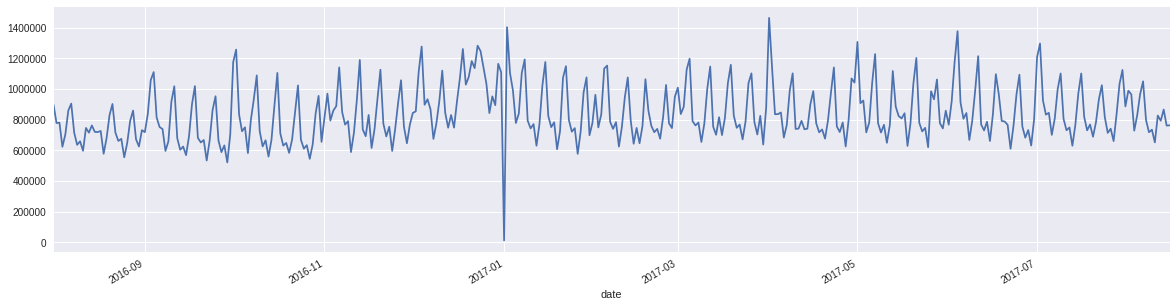

In [19]:
train.groupby(['date'])['unit_sales'].sum().plot(figsize=(20,5))

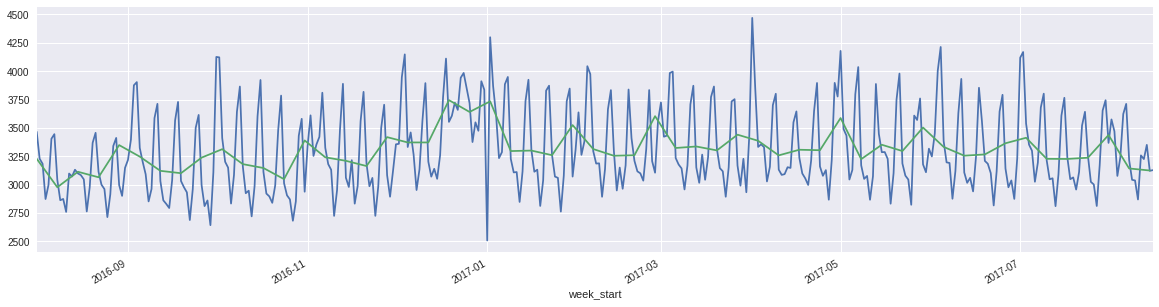

In [28]:
#from datetime import timedelta
#train['week_start']=train['date'].map(lambda x: x-timedelta(days=x.dayofweek))
#train=train[train['unit_sales']>0]
#train['log_unit_sales']=np.log(1+train['unit_sales'])
#store_sales=train.groupby(['store_nbr','date','week_start'])['log_unit_sales'].sum().reset_index()
store_sales.groupby(['date'])['log_unit_sales'].mean().plot(figsize=(20,5))
store_sales.groupby(['week_start'])['log_unit_sales'].mean().plot(figsize=(20,5))

In [33]:
from datetime import datetime
train['date'].head(10).map(lambda x: (x-datetime(1970,1,1)).days)

0    17014
1    17014
2    17014
3    17014
4    17014
5    17014
6    17014
7    17014
8    17014
9    17014
Name: date, dtype: int64

In [42]:
dtypes={'id':'category','store_nbr':'category','item_nbr':'category','unit_sales':np.float64,'onpromotion':np.bool}
train=pd.read_csv('01.RawData/train.csv',dtype=dtypes,parse_dates=['date'],nrows=100000)

In [42]:
#train['onpromotion']=(np.random.random(len(train))>0.5).astype(np.int64)+1

def get_store_sku_summary(x):
    counts=x['onpromotion'].value_counts()
    counts.index=['count_%d'%i for i in counts.index.tolist()]
    others=x['date'].describe()[['min','max']]
    if 'unit_sales' in x:
        sales=x.groupby(['onpromotion'])['unit_sales'].sum()
        sales.index=['sales_%d'%i for i in sales.index.tolist()]
        return pd.concat([counts,sales,others])
    return pd.concat([counts,others])

summary_train=train.head(1000).groupby(['store_nbr','item_nbr']).apply(get_store_sku_summary).unstack()
summary_test=test.head(1000).groupby(['store_nbr','item_nbr']).apply(get_store_sku_summary).unstack()
pd.merge(summary_train,summary_test,left_index=True,right_index=True,suffixes=['_train','_test'],how='outer')

count_1  count_2train  maxtrain  mintrain  sales_1  \
store_nbr item_nbr                                                       
1         103501        NaN           NaN       NaN       NaN      NaN   
          103520        NaN           NaN       NaN       NaN      NaN   
          103665        NaN           NaN       NaN       NaN      NaN   
          105574        NaN           NaN       NaN       NaN      NaN   
          105575        NaN           NaN       NaN       NaN      NaN   
          105576        NaN           NaN       NaN       NaN      NaN   
          105577        NaN           NaN       NaN       NaN      NaN   
          105693        NaN           NaN       NaN       NaN      NaN   
          105737        NaN           NaN       NaN       NaN      NaN   
          105857        NaN           NaN       NaN       NaN      NaN   
          106716        NaN           NaN       NaN       NaN      NaN   
          108079        NaN           NaN       NaN       NaN      NaN   
          108634        NaN           NaN       NaN       NaN      NaN   
          108696        NaN           NaN       NaN       NaN      NaN   
          108698        NaN           NaN       NaN       NaN      NaN   
          108701        NaN           NaN       NaN       NaN      NaN   
          108786        NaN           NaN       NaN       NaN      NaN   
          108797        NaN           NaN       NaN       NaN      NaN   
          108831        NaN           NaN       NaN       NaN      NaN   
          108833        NaN           NaN       NaN       NaN      NaN   
          108862        NaN           NaN       NaN       NaN      NaN   
          108952        NaN           NaN       NaN       NaN      NaN   
          111223        NaN           NaN       NaN       NaN      NaN   
          111397        NaN           NaN       NaN       NaN      NaN   
          112830        NaN           NaN       NaN       NaN      NaN   
          114778        NaN           NaN       NaN       NaN      NaN   
          114790        NaN           NaN       NaN       NaN      NaN   
          114799        NaN           NaN       NaN       NaN      NaN   
          114800        NaN           NaN       NaN       NaN      NaN   
          115267        NaN           NaN       NaN       NaN      NaN   
...                     ...           ...       ...       ...      ...   
25        956013        1.0           NaN   16801.0   16801.0    1.609   
          956014        1.0           NaN   16801.0   16801.0    1.099   
          957096        1.0           NaN   16801.0   16801.0    1.386   
          957098        1.0           NaN   16801.0   16801.0    1.792   
          958015        1.0           NaN   16801.0   16801.0    2.197   
          958016        1.0           NaN   16801.0   16801.0    2.996   
          958514        1.0           NaN   16801.0   16801.0    1.792   
          959437        1.0           NaN   16801.0   16801.0    5.182   
          964752        1.0           NaN   16801.0   16801.0    2.197   
          968432        1.0           NaN   16801.0   16801.0    3.951   
          968935        1.0           NaN   16801.0   16801.0    1.946   
          968936        1.0           NaN   16801.0   16801.0    1.099   
          968937        1.0           NaN   16801.0   16801.0    2.565   
          979195        1.0           NaN   16801.0   16801.0    1.792   
          979197        1.0           NaN   16801.0   16801.0    1.609   
          979554        1.0           NaN   16801.0   16801.0    1.099   
          983310        1.0           NaN   16801.0   16801.0    0.693   
          986193        1.0           NaN   16801.0   16801.0    2.890   
          987308        1.0           NaN   16801.0   16801.0    3.638   
          988408        1.0           NaN   16801.0   16801.0    2.639   
          988459        NaN           1.0   16801.0   16801.0      NaN   
          989092        

In [43]:
train['onpromotion'].value_counts()

1    52770028
2     6264225
Name: onpromotion, dtype: int64

In [44]:
test['onpromotion'].value_counts()

2    3171867
0     198597
Name: onpromotion, dtype: int64

In [14]:
train[['store_nbr','item_nbr','date']].drop_duplicates().shape

(59034253, 3)

1    486
2     17
Name: onpromotion, dtype: int64
2    32
Name: onpromotion, dtype: int64


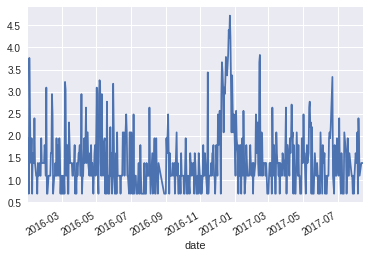

In [75]:
from datetime import datetime,timedelta

to_plot=[('8','417835')]

for point in to_plot:
    sample=train[((train['store_nbr']==point[0])&(train['item_nbr']==point[1]))]
    sample.index=sample.date.map(lambda x: datetime(1970,1,1)+timedelta(days=x))
    sample['unit_sales'].plot()
    
    print (train[((train['store_nbr']==point[0])&(train['item_nbr']==point[1]))]['onpromotion'].value_counts())
    print (test[((test['store_nbr']==point[0])&(test['item_nbr']==point[1]))]['onpromotion'].value_counts())

In [76]:
sample[sample['onpromotion']==2]

,date,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2016-12-08,17143,8,417835,2.944,2
2016-12-09,17144,8,417835,3.664,2
2016-12-10,17145,8,417835,3.466,2
2016-12-11,17146,8,417835,3.091,2
2016-12-12,17147,8,417835,2.079,2
2016-12-13,17148,8,417835,3.091,2
2016-12-14,17149,8,417835,2.944,2
2016-12-15,17150,8,417835,3.219,2
2016-12-16,17151,8,417835,3.784,2


In [59]:
fill_missing_vals=0
os.chdir('/data/arpit.goel/33_GrocerySales/')

train=pd.read_pickle('02.ParsedData/train_2016.pkl')
test=pd.read_pickle('02.ParsedData/test.pkl')

product_means=train.groupby(['item_nbr','store_nbr'])['unit_sales'].apply(lambda x: pd.Series({'count':x.shape,'mean':x.mean()})).reset_index()
test=pd.merge(test,product_means,on=['item_nbr','store_nbr'],how='left')
test['unit_sales']=np.exp(test['mean']-1).fillna(fill_missing_vals)
test[['id','unit_sales']].to_csv('04.Submissions/01.Baseline_Missing_%d.csv.gz'%fill_missing_vals,compression='gzip')


KeyError: 'mean'

In [67]:
product_means=train.groupby(['item_nbr','store_nbr'])['unit_sales'].apply(lambda x: {'count':x.shape[0],'mean':x.mean()}).unstack()
product_means.head()

count      mean
item_nbr store_nbr                 
1000866  1           36.0  0.734806
         2           92.0  0.786207
         23          48.0  0.707438
         25          22.0  0.821500
         27          29.0  0.800897

In [68]:
product_means=train.groupby(['item_nbr'])['unit_sales'].apply(lambda x: {'count':x.shape[0],'mean':x.mean()}).unstack().reset_index()
store_means=train.groupby(['store_nbr'])['unit_sales'].apply(lambda x: {'count':x.shape[0],'mean':x.mean()}).unstack().reset_index()


In [229]:
a=train[train['store_nbr']=='1']
a=a[a['item_nbr'].isin(set(['514445','522941']))]
#for name,group in a.groupby(['item_nbr']):
a.shape





(375, 5)

In [122]:
a

,date,store_nbr,item_nbr,unit_sales,onpromotion
1718,16802,1,103520,0.693,2
1720,16802,1,105575,2.398,1
102544,16803,1,105575,1.946,1
202907,16804,1,103520,1.386,1
202909,16804,1,105575,2.773,1
299464,16805,1,105575,2.773,1
393916,16806,1,103520,0.693,1
393919,16806,1,105575,3.091,1
487545,16807,1,103520,1.099,1
487548,16807,1,105575,2.303,1


In [239]:
from itertools import product

START_DATE=datetime(2017,8,1)
START_DATE_KEY=(START_DATE-datetime(1970,1,1)).days
END_DATE_KEY=START_DATE_KEY+15
G_ALPHA=16
L_ALPHA=3

output_index=np.arange(START_DATE_KEY,END_DATE_KEY+1)

def get_features(x,func,y=None,window=None):
    if func=='target':
        return (pd.DataFrame(x.loc[START_DATE_KEY:END_DATE_KEY]))

    x1=x.loc[START_DATE_KEY-window:START_DATE_KEY-1]
    y1=y.loc[START_DATE_KEY-window:START_DATE_KEY-1]
    y2=x1.index%7
    if len(x1)==0:
        return None
    
    if func=='gmean':
        means=x1.groupby(y1).mean()
        if len(means)>1:
            counts=x1.groupby(y1).count()
            mean=x1.mean()
            means=(means*counts+mean*G_ALPHA)/(counts+G_ALPHA)
        else:
            means=np.array([means.iloc[0],means.iloc[0]])
        return pd.DataFrame(np.tile((means),(len(output_index),1)),index=output_index,columns=['gmean_%d_0'%window,'gmean_%d_1'%window])

    if func=='lmean':
        means=x1.groupby([y2,y1]).mean().unstack()
        if means.shape[1]>1:
            diff=means.dropna()
            diff=(diff.iloc[:,1]-diff.iloc[:,0]).mean()
            means.iloc[:,0]=means.iloc[:,0].fillna(means.iloc[:,1]-diff)
            means.iloc[:,1]=means.iloc[:,1].fillna(means.iloc[:,0]+diff)
            counts=x1.groupby([y2,y1]).count().unstack()
            counts=counts.fillna(counts.mean())
            mean=x1.groupby([y2]).mean()
            means_reg=pd.DataFrame(((means*counts).T+mean*L_ALPHA)/(counts.T+L_ALPHA)).T
        else:
            means_reg=pd.DataFrame(np.hstack([means,means]))
        means=pd.DataFrame(output_index%7,index=output_index,columns=['day'])
        means['lmean_%d_0'%window]=means['day'].map(means_reg.loc[:,0])
        means['lmean_%d_1'%window]=means['day'].map(means_reg.loc[:,1])
        means.drop('day',axis=1,inplace=1)
        return means
            
output=[] 
counter=0
for name,group in a.groupby(['item_nbr','store_nbr']):
    counter+=1
    if counter%100==0:
        print (counter)
    if len(group)==0:
        continue
    group.index=group.date
    features=[]
    features.append(get_features(group['unit_sales'],'target'))
    for x,y in product([21,42],['lmean','gmean']):
        features.append(get_features(group['unit_sales'],y,group['onpromotion'],x))
    features=pd.concat(features,axis=1)
    features['item_nbr']=name[0]
    features['store_nbr']=name[1]
    output.append(features)
                               
pd.concat(output)
                        

,gmean_21_0,gmean_21_1,gmean_42_0,gmean_42_1,item_nbr,lmean_21_0,lmean_21_1,lmean_42_0,lmean_42_1,store_nbr,unit_sales
17379,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,NaN,NaN,1,NaN
17380,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,NaN,NaN,1,1.099
17381,0.828333,0.828333,0.828333,0.828333,514445,1.099,1.099,1.099,1.099,1,NaN
17382,0.828333,0.828333,0.828333,0.828333,514445,0.693,0.693,0.693,0.693,1,NaN
17383,0.828333,0.828333,0.828333,0.828333,514445,0.693,0.693,0.896,0.896,1,NaN
17384,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,0.693,0.693,1,1.609
17385,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,NaN,NaN,1,NaN
17386,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,NaN,NaN,1,NaN
17387,0.828333,0.828333,0.828333,0.828333,514445,NaN,NaN,NaN,NaN,1,NaN
17388,0.828333,0.828333,0.828333,0.828333,514445,1.099,1.099,1.099,1.099,1,NaN


In [159]:
x=pd.Series(range(10),index=range(20,30))
pd.Series(x.index).map({21:200})

0      NaN
1    200.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
dtype: float64

In [242]:
train['weekday']=train['date']%7
weekday_sales=train.head(10000).groupby(['onpromotion','weekday'])['unit_sales'].mean()
weekday_sales

onpromotion  weekday
1            1          1.740072
             2          1.873646
2            1          1.967969
             2          1.874481
Name: unit_sales, dtype: float64

In [333]:
from itertools import product

window=365
START_DATE=datetime(2017,8,1)
START_DATE_KEY=(START_DATE-datetime(1970,1,1)).days
END_DATE_KEY=START_DATE_KEY-30

a=a[((a['date']>=END_DATE_KEY)&(a['date']<START_DATE_KEY))]
a['weekday']=(a['date']-4)%7

list_onpromotion=['no_promo','promo']
list_weekday=['mon','tue','wed','thur','fri','sat','sun']
dim_onpromotion=dict(zip(range(1,3),list_onpromotion))
dim_weekday=dict(zip(range(7),list_weekday))
stats_0=a.groupby(['store_nbr','item_nbr','weekday','onpromotion'])['unit_sales'].apply(lambda x: {'sum':x.sum(),'count':x.size}).unstack().reset_index()
stats_1=stats_0.groupby(['store_nbr','item_nbr']).apply(lambda x: pd.Series({'avg':x['sum'].sum()/x['count'].sum(),'count':x['count'].sum()}))
stats_2=stats_0.groupby(['store_nbr','item_nbr','onpromotion']).apply(lambda x: pd.Series({'avg':x['sum'].sum()/x['count'].sum(),'count':x['count'].sum()})).unstack()
stats_3=stats_0.groupby(['store_nbr','item_nbr','weekday']).apply(lambda x: pd.Series({'avg':x['sum'].sum()/x['count'].sum(),'count':x['count'].sum()})).unstack()
stats_4=stats_0.groupby(['store_nbr','item_nbr','weekday','onpromotion']).apply(lambda x: pd.Series({'avg':x['sum'].sum()/x['count'].sum(),'count':x['count'].sum()})).unstack([3,2])

stats_2.columns=['_'.join([x,dim_onpromotion[y]]) for x,y in stats_2.columns.get_values()]
stats_3.columns=['_'.join([x,dim_weekday[y]]) for x,y in stats_3.columns.get_values()]
stats_4.columns=['_'.join([x,dim_weekday[z],dim_onpromotion[y]]) for x,y,z in stats_4.columns.get_values()]
stats=pd.concat([stats_1,stats_2,stats_3,stats_4],axis=1)
output_cols=['']
output_cols+=['_%s'%x for x in list_onpromotion]
output_cols+=['_%s'%x for x in list_weekday]
output_cols+=['_%s_%s'%(x,y) for y in list_onpromotion for x in list_weekday]
output_cols=[x+y for x in ['avg','count'] for y in output_cols]
stats=stats[[x for x in output_cols if x in stats.columns]]
stats

,,avg,avg_no_promo,avg_mon,avg_wed,avg_thur,avg_mon_no_promo,avg_wed_no_promo,avg_thur_no_promo,count,count_no_promo,count_mon,count_wed,count_thur,count_mon_no_promo,count_wed_no_promo,count_thur_no_promo
store_nbr,item_nbr,,,,,,,,,,,,,,,,
1,514445,0.828333,0.828333,0.693,0.693,1.099,0.693,0.693,1.099,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
import os
import pandas as pd
os.chdir('/data/arpit.goel/33_GrocerySales/')
train=pd.read_pickle('02.ParsedData/train_2016.pkl')

In [22]:
min_date=train.groupby(['store_nbr','item_nbr'])['date'].min()
min_date.name='first_date'

u_dates = train.date.unique()
u_stores = train.store_nbr.unique()
u_items = train.item_nbr.unique()
train.set_index(["date", "store_nbr", "item_nbr"], inplace=True)
train=train.reindex(pd.MultiIndex.from_product((u_dates, u_stores, u_items),names=["date", "store_nbr", "item_nbr"])).fillna(0).reset_index()
train=train.join(min_date,on=['store_nbr','item_nbr'],how='inner')
train=train[train['date']>=train['first_date']]


In [5]:
u_dates = train.date.unique()
u_stores = train.store_nbr.unique()
u_items = train.item_nbr.unique()

In [19]:
train['first_date'].value_counts()

16801    129022848
Name: first_date, dtype: int64

In [23]:
train.shape

(89710781, 6)

In [7]:
u_dates.shape[0]*u_stores.shape[0]*u_items.shape[0]

129022848

In [9]:
train.set_index(["date", "store_nbr", "item_nbr"], inplace=True)

In [10]:
train.shape

(59034253, 2)

In [11]:
train = train.reindex(pd.MultiIndex.from_product((u_dates, u_stores, u_items),names=["date", "store_nbr", "item_nbr"]))    

In [13]:
train

unit_sales  onpromotion
date  store_nbr item_nbr                         
16801 25        105574         2.565          1.0
                105575         2.303          1.0
                105857         1.386          1.0
                108634         1.386          1.0
                108701         1.099          2.0
                108786         1.099          1.0
                108797         0.693          1.0
                108952         2.565          1.0
                111397         1.792          1.0
                114790         1.609          1.0
                114799         1.099          1.0
                114800         0.693          1.0
                115267         1.386          1.0
                115611         1.946          1.0
                115693         1.386          1.0
                115720         2.398          1.0
                115850         1.386          1.0
                115891         2.833          1.0
                115892         2.398          1.0
                115894         2.197          1.0
                116017         2.303          1.0
                119023         1.792          1.0
                119024         0.693          1.0
                119026         2.708          1.0
                119141         1.792          1.0
                119624         3.178          1.0
                122425         0.693          1.0
                123347         3.434          1.0
                123927         0.693          1.0
                127534         0.693          1.0
...                              ...          ...
17393 52        2122676        0.693          1.0
                2120723          NaN          NaN
                2122947          NaN          NaN
                2116238        0.693          1.0
                2123468        0.693          1.0
                2123209          NaN          NaN
                2116132          NaN          NaN
                2121610          NaN          NaN
                2121690          NaN          NaN
                2122868          NaN          NaN
                2116139          NaN          NaN
                2123750          NaN          NaN
                2123711          NaN          NaN
                2123859          NaN          NaN
                2114752          NaN          NaN
                2123863          NaN          NaN
                2123790          NaN          NaN
                2123747          NaN          NaN
                2011437          NaN          NaN
                2011457          NaN          NaN
                2011470          NaN          NaN
                2123463          NaN          NaN
                2126842          NaN          NaN
                2011448          NaN          NaN
                2011468          NaN          NaN
                2122818          NaN          NaN
                2011459          NaN          NaN
                2126944          NaN          NaN
                2123839          NaN          NaN
                2011451          NaN          NaN

[129022848 rows x 2 columns]